# COVID-19 Exploratory Data Analysis and Visualizations

### Data Science Capstone Project

### Exploratory Data Analytics Report

### 10-27-2020


**Authors:**

---



---



---


Avani Jain


#### Load data and libraries

In [ ]:
!pip install missingpy
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from missingpy import MissForest
from IPython.display import Image
from scipy import stats
import plotly.express as px
from xgboost import XGBRegressor
%matplotlib inline
!wget https://raw.githubusercontent.com/MWesner3344/DSCI-591/main/owid-covid-data.csv
!wget https://raw.githubusercontent.com/MWesner3344/DSCI-591/main/Provisional_COVID-19_Death_Counts_by_Sex__Age__and_State.csv
!wget https://raw.githubusercontent.com/MWesner3344/DSCI-591/main/Dataset_gender.csv
!wget https://raw.githubusercontent.com/MWesner3344/DSCI-591/main/tableau/Screen%20Shot%202020-11-02%20at%209.49.18%20PM.png
!wget https://raw.githubusercontent.com/MWesner3344/DSCI-591/main/tableau/Screen%20Shot%202020-11-02%20at%209.45.51%20PM.png
!wget https://raw.githubusercontent.com/MWesner3344/DSCI-591/main/tableau/Screen%20Shot%202020-11-02%20at%209.46.14%20PM.png
!wget https://raw.githubusercontent.com/MWesner3344/DSCI-591/main/tableau/Screen%20Shot%202020-11-02%20at%209.47.21%20PM.png
!wget https://raw.githubusercontent.com/MWesner3344/DSCI-591/main/tableau/Screen%20Shot%202020-11-10%20at%2012.42.17%20AM.png
!wget https://raw.githubusercontent.com/MWesner3344/DSCI-591/main/tableau/Screen%20Shot%202020-11-10%20at%2012.43.59%20AM.png
!wget https://raw.githubusercontent.com/MWesner3344/DSCI-591/main/tableau/Screen%20Shot%202020-11-10%20at%2012.42.30%20AM.png
!wget https://raw.githubusercontent.com/MWesner3344/DSCI-591/main/tableau/Screen%20Shot%202020-11-10%20at%2012.44.19%20AM.png

     |████████████████████████████████| 51kB 3.9MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


--2020-11-25 00:42:49--  https://raw.githubusercontent.com/MWesner3344/DSCI-591/main/owid-covid-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11017681 (11M) [text/plain]
Saving to: ‘owid-covid-data.csv’

owid-covid-data.csv 100%[===================>]  10.51M  --.-KB/s    in 0.08s   

2020-11-25 00:42:49 (137 MB/s) - ‘owid-covid-data.csv’ saved [11017681/11017681]

--2020-11-25 00:42:50--  https://raw.githubusercontent.com/MWesner3344/DSCI-591/main/Provisional_COVID-19_Death_Counts_by_Sex__Age__and_State.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting r

## Analyze the basic metrics of variables


In [ ]:
data = pd.read_csv('/content/owid-covid-data.csv')
data

iso_code      continent  ... life_expectancy human_development_index
0          ABW  North America  ...           76.29                     NaN
1          ABW  North America  ...           76.29                     NaN
2          ABW  North America  ...           76.29                     NaN
3          ABW  North America  ...           76.29                     NaN
4          ABW  North America  ...           76.29                     NaN
...        ...            ...  ...             ...                     ...
49873      NaN            NaN  ...             NaN                     NaN
49874      NaN            NaN  ...             NaN                     NaN
49875      NaN            NaN  ...             NaN                     NaN
49876      NaN            NaN  ...             NaN                     NaN
49877      NaN            NaN  ...             NaN                     NaN

[49878 rows x 41 columns]

In [ ]:
#Data Type of each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49878 entries, 0 to 49877
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         49590 non-null  object 
 1   continent                        49302 non-null  object 
 2   location                         49878 non-null  object 
 3   date                             49878 non-null  object 
 4   total_cases                      49242 non-null  float64
 5   new_cases                        49018 non-null  float64
 6   new_cases_smoothed               48236 non-null  float64
 7   total_deaths                     49242 non-null  float64
 8   new_deaths                       49018 non-null  float64
 9   new_deaths_smoothed              48236 non-null  float64
 10  total_cases_per_million          48954 non-null  float64
 11  new_cases_per_million            48954 non-null  float64
 12  new_cases_smoothed

In [ ]:
# Descripitve Statistics of each variable
data.describe()

total_cases      new_cases  ...  life_expectancy  human_development_index
count  4.924200e+04   49018.000000  ...     48960.000000             42883.000000
mean   1.174887e+05    1545.367906  ...        73.998442                 0.724111
std    1.214398e+06   13943.457806  ...         7.382610                 0.152981
min    0.000000e+00   -8261.000000  ...        53.280000                 0.354000
25%    7.100000e+01       0.000000  ...        69.870000                 0.606000
50%    1.182000e+03      11.000000  ...        75.400000                 0.754000
75%    1.322250e+04     180.000000  ...        79.380000                 0.847000
max    3.787542e+07  387973.000000  ...        86.750000                 0.953000

[8 rows x 36 columns]

#### US age and sex data

In [ ]:
US_data = pd.read_csv('/content/Provisional_COVID-19_Death_Counts_by_Sex__Age__and_State.csv')
US_data

Data as of  Start week  ... Pneumonia, Influenza, or COVID-19 Deaths Footnote
0     10/21/2020  02/01/2020  ...                                 332245.0      NaN
1     10/21/2020  02/01/2020  ...                                    156.0      NaN
2     10/21/2020  02/01/2020  ...                                    562.0      NaN
3     10/21/2020  02/01/2020  ...                                    132.0      NaN
4     10/21/2020  02/01/2020  ...                                    193.0      NaN
...          ...         ...  ...                                      ...      ...
2656  10/21/2020  02/01/2020  ...                                      0.0      NaN
2657  10/21/2020  02/01/2020  ...                                      0.0      NaN
2658  10/21/2020  02/01/2020  ...                                      0.0      NaN
2659  10/21/2020  02/01/2020  ...                                      0.0      NaN
2660  10/21/2020  02/01/2020  ...                                      0.0      NaN

[2661 rows x 13 columns]

In [ ]:
US_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2661 entries, 0 to 2660
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Data as of                                2661 non-null   object 
 1   Start week                                2661 non-null   object 
 2   End Week                                  2661 non-null   object 
 3   State                                     2661 non-null   object 
 4   Sex                                       2661 non-null   object 
 5   Age group                                 2661 non-null   object 
 6   COVID-19 Deaths                           2257 non-null   float64
 7   Total Deaths                              2480 non-null   float64
 8   Pneumonia Deaths                          2185 non-null   float64
 9   Pneumonia and COVID-19 Deaths             2282 non-null   float64
 10  Influenza Deaths                    

In [ ]:
US_data.describe()

COVID-19 Deaths  ...  Pneumonia, Influenza, or COVID-19 Deaths
count      2257.000000  ...                               2171.000000
mean        703.505981  ...                               1171.632888
std        6115.607197  ...                               9932.993202
min           0.000000  ...                                  0.000000
25%           0.000000  ...                                  0.000000
50%           0.000000  ...                                 15.000000
75%         111.000000  ...                                251.500000
max      207882.000000  ...                             332245.000000

[8 rows x 6 columns]

Gender Related Data

In [ ]:
data_gender = pd.read_csv('/content/Dataset_gender.csv')
data_gender

Country code  ...                                             Source
0             AF  ...                        http://covid.moph-dw.org/#/
1             AL  ...                 https://coronavirus.al/statistika/
2             DZ  ...  https://covid19.cdta.dz/dashboard/production/i...
3             AD  ...                  https://www.govern.ad/coronavirus
4             AO  ...                  https://www.cisp.gov.ao:10443/en/
..           ...  ...                                                ...
178           VN  ...  https://www.who.int/docs/default-source/wpro--...
179          NaN  ...  https://public.tableau.com/profile/public.heal...
180           YE  ...  https://app.powerbi.com/view?r=eyJrIjoiZjE2NzJ...
181           ZM  ...  https://web.facebook.com/mohzambia/photos/a.77...
182           ZW  ...  https://twitter.com/MoHCCZim/status/1316122062...

[183 rows x 16 columns]

In [ ]:
data_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 16 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Country code                                                 176 non-null    object 
 1   Country                                                      183 non-null    object 
 2   Case & death data by sex?                                    183 non-null    object 
 3   Cases date                                                   126 non-null    object 
 4   Cases where sex-disaggregated data is available              126 non-null    float64
 5   Cases (% male)                                               126 non-null    object 
 6   Cases (% female)                                             126 non-null    object 
 7   Deaths date                                                  92 non-null     obj

In [ ]:
data_gender.describe()

Cases where sex-disaggregated data is available  ...  Proportion of deaths in confirmed cases (Male:female ratio)
count                                     1.260000e+02  ...                                          79.000000          
mean                                      1.684753e+05  ...                                           1.438481          
std                                       5.894524e+05  ...                                           0.479444          
min                                       4.800000e+01  ...                                           0.570000          
25%                                       4.647000e+03  ...                                           1.170000          
50%                                       1.638350e+04  ...                                           1.400000          
75%                                       9.070050e+04  ...                                           1.660000          
max                                       5.706415e+06  ...                                           3.840000          

[8 rows x 3 columns]

## **Non-graphical and graphical univariate analysis**

#### World data

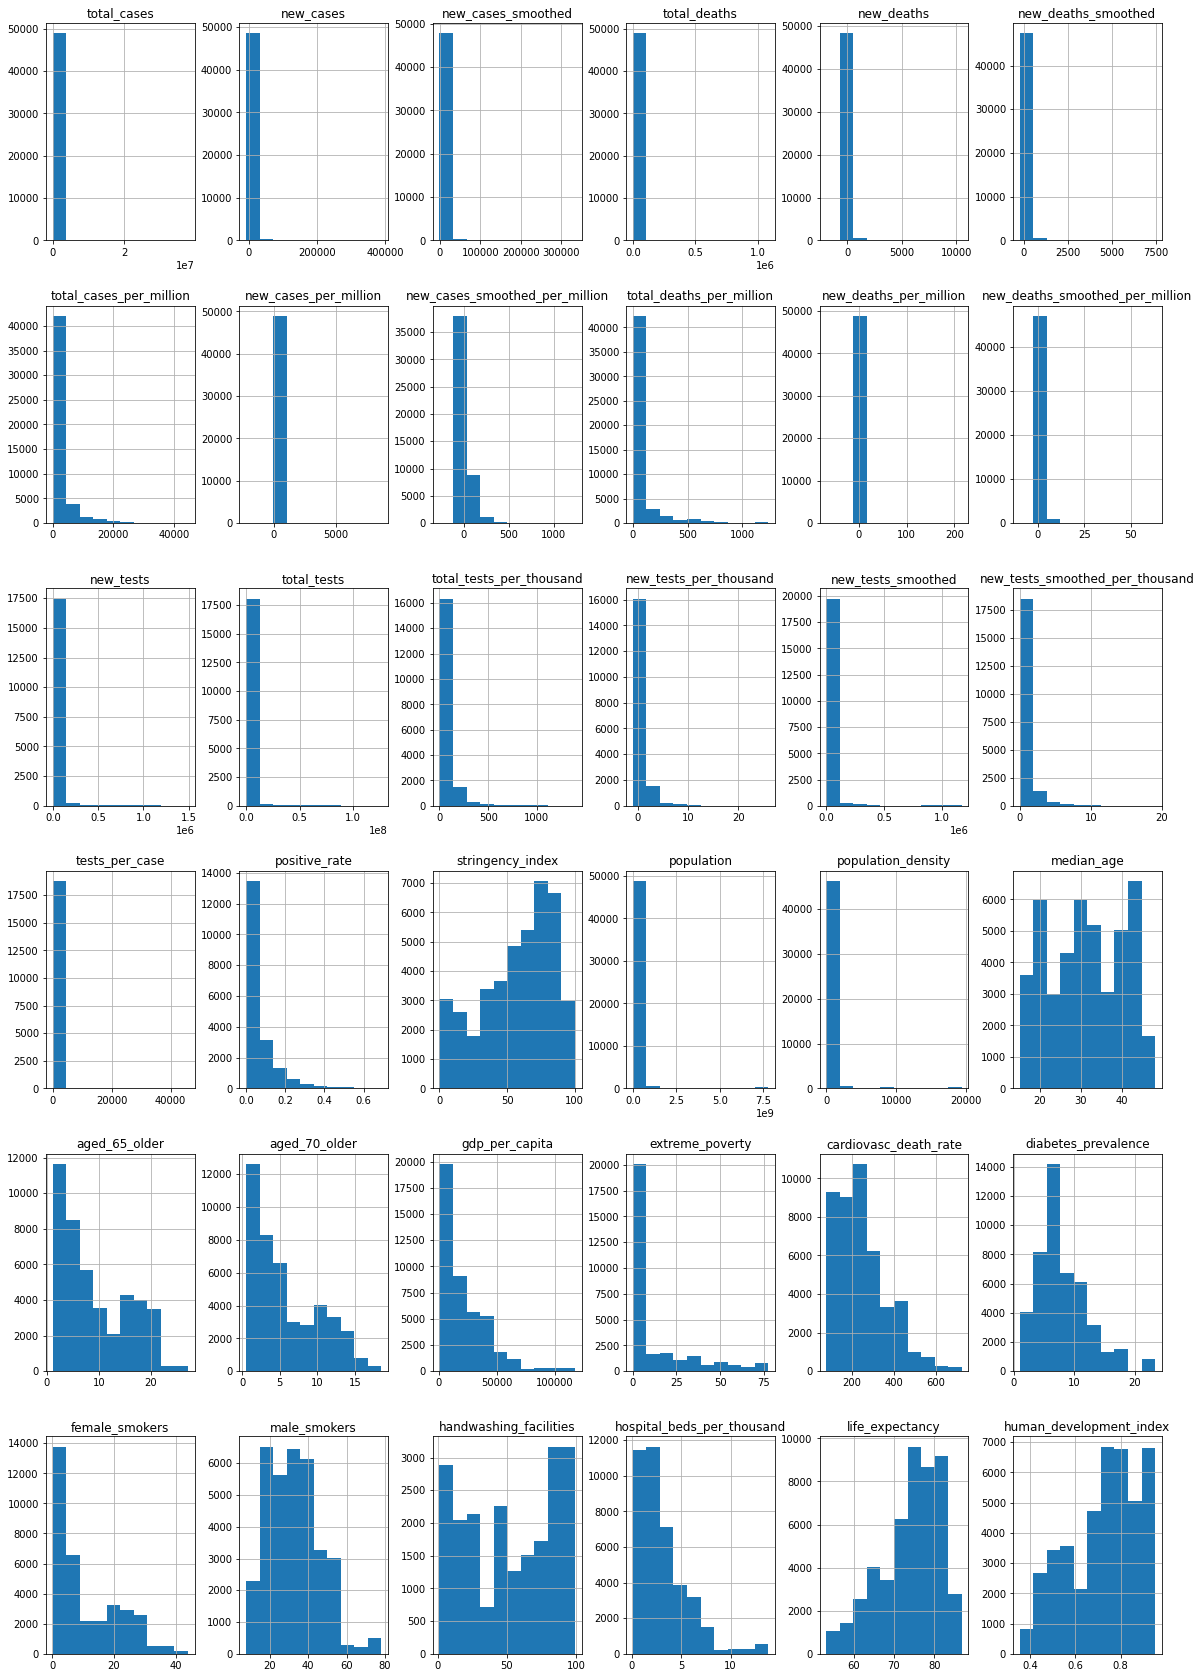

In [ ]:
data.hist(figsize=(20,30))
plt.show()

#### US data

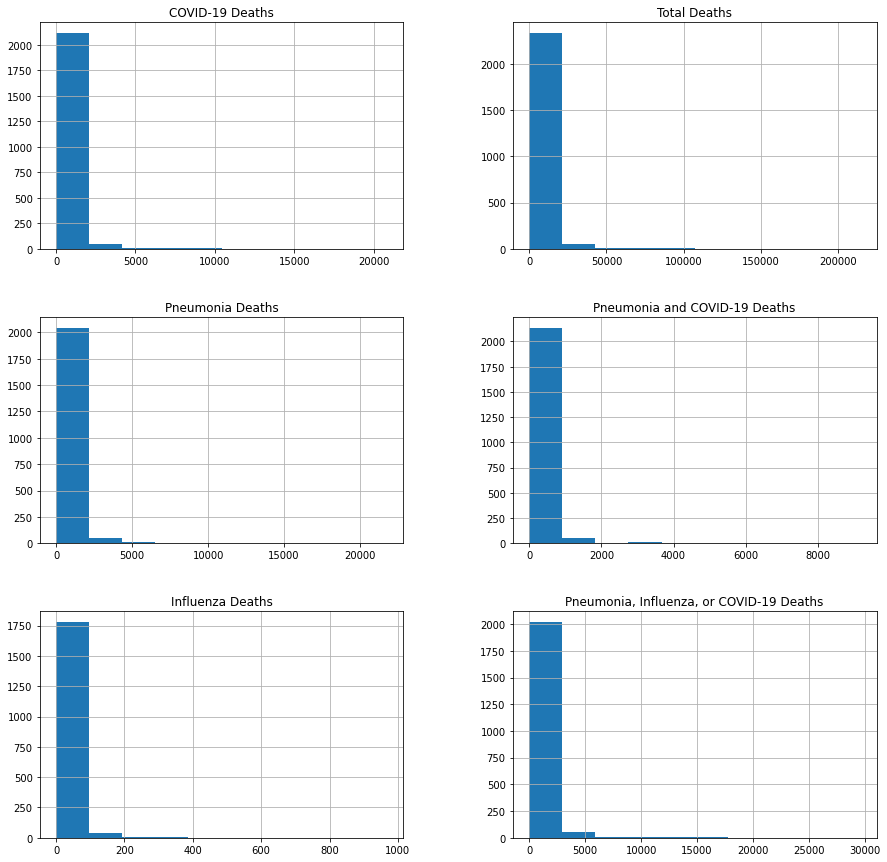

In [ ]:
US_data[US_data['State'] != 'United States'].hist(figsize=(15,15))
plt.show()

Gender Related Data

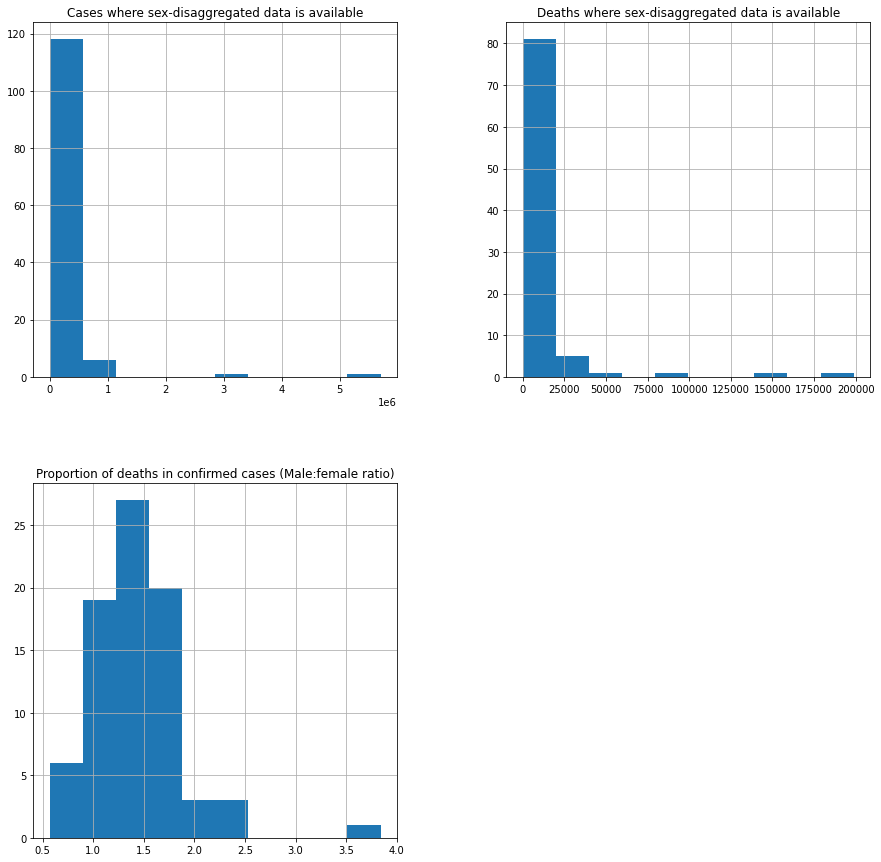

In [ ]:
data_gender.hist(figsize=(15,15))
plt.show()

## **Missing value analysis and outlier analysis**

**I. Ambiguous Variables**

In [ ]:
#Output unique locations
num_loc = data.location.unique()
print(num_loc)

#Count of all unique locations
print('\nThere are', len(num_loc), 'unique locations in this dataset.')

['Aruba' 'Afghanistan' 'Angola' 'Anguilla' 'Albania' 'Andorra'
 'United Arab Emirates' 'Argentina' 'Armenia' 'Antigua and Barbuda'
 'Australia' 'Austria' 'Azerbaijan' 'Burundi' 'Belgium' 'Benin'
 'Bonaire Sint Eustatius and Saba' 'Burkina Faso' 'Bangladesh' 'Bulgaria'
 'Bahrain' 'Bahamas' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda'
 'Bolivia' 'Brazil' 'Barbados' 'Brunei' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Switzerland' 'Chile' 'China'
 "Cote d'Ivoire" 'Cameroon' 'Democratic Republic of Congo' 'Congo'
 'Colombia' 'Comoros' 'Cape Verde' 'Costa Rica' 'Cuba' 'Curacao'
 'Cayman Islands' 'Cyprus' 'Czech Republic' 'Germany' 'Djibouti'
 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria' 'Ecuador' 'Egypt'
 'Eritrea' 'Western Sahara' 'Spain' 'Estonia' 'Ethiopia' 'Finland' 'Fiji'
 'Falkland Islands' 'France' 'Faeroe Islands' 'Gabon' 'United Kingdom'
 'Georgia' 'Guernsey' 'Ghana' 'Gibraltar' 'Guinea' 'Gambia'
 'Guinea-Bissau' 'Equatorial Guinea' 'Greece' 'Grenada' 

In [ ]:
#No information about International, will remove from dataset
#Take the indexes of International
inter = data[data['location'] == 'International'].index
inter

Int64Index([49590, 49591, 49592, 49593, 49594, 49595, 49596, 49597, 49598,
            49599,
            ...
            49868, 49869, 49870, 49871, 49872, 49873, 49874, 49875, 49876,
            49877],
           dtype='int64', length=288)

In [ ]:
#Remove 278 rows with International as location
data.drop(inter, inplace=True)
data

iso_code      continent  ... life_expectancy human_development_index
0           ABW  North America  ...           76.29                     NaN
1           ABW  North America  ...           76.29                     NaN
2           ABW  North America  ...           76.29                     NaN
3           ABW  North America  ...           76.29                     NaN
4           ABW  North America  ...           76.29                     NaN
...         ...            ...  ...             ...                     ...
49585  OWID_WRL            NaN  ...           72.58                     NaN
49586  OWID_WRL            NaN  ...           72.58                     NaN
49587  OWID_WRL            NaN  ...           72.58                     NaN
49588  OWID_WRL            NaN  ...           72.58                     NaN
49589  OWID_WRL            NaN  ...           72.58                     NaN

[49590 rows x 41 columns]

In [ ]:
#Output the names of all columns
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

### Observations:
- What is the difference betwen total cases smoothed_per_million vs new_cases_per_million?
      -7-day smoothing
- What is tests_units, stringency_index?
      - test_units: units used by location to report data and stringency_index: government response indicators
- How is human_development_index measured?
      - human_development_index: average achievement in human development
       

In [ ]:
#Decide to drop smoothed columns

new = data.drop(columns=['new_cases_smoothed', 'new_deaths_smoothed', 'new_cases_smoothed_per_million', \
                 'new_deaths_smoothed_per_million', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand'])
new.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand', 'tests_per_case',
       'positive_rate', 'tests_units', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [ ]:
#Remove tests_unit and stringency_index

new = new.drop(columns=['tests_units', 'stringency_index'])
new.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand', 'tests_per_case',
       'positive_rate', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [ ]:
#Output the number of remaining columns
len(new.columns)

33

**II. Missing Dates**

In [ ]:
#Number of days for each location
print(len(new['date'].unique()))
new['date'].unique()

288


array(['2020-03-13', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
       '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
       '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
       '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
       '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
       '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18',
       '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22',
       '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26',
       '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
       '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
       '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
       '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
       '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
       '2020-05-17', '2020-05-18', '2020-05-19', '2020-

In [ ]:
#Examine how many null values in total_cases
new['total_cases'].isnull().sum()

636

In [ ]:
new['new_cases'].isnull().sum()

636

In [ ]:
#Figure out why
why = new[new['total_cases'].isnull()]
why

iso_code      continent  ... life_expectancy human_development_index
1          ABW  North America  ...           76.29                     NaN
3          ABW  North America  ...           76.29                     NaN
4          ABW  North America  ...           76.29                     NaN
5          ABW  North America  ...           76.29                     NaN
13         ABW  North America  ...           76.29                     NaN
...        ...            ...  ...             ...                     ...
48661      ZAF         Africa  ...           64.13                   0.699
48662      ZAF         Africa  ...           64.13                   0.699
48663      ZAF         Africa  ...           64.13                   0.699
48665      ZAF         Africa  ...           64.13                   0.699
48669      ZAF         Africa  ...           64.13                   0.699

[636 rows x 33 columns]

### Observation: 

Seems that some locations have omitted to add dates within the dataset.

In [ ]:
#Get all unique locations
location = new['location'].unique()
#Only examine locations with all dates
new_loc = []
delete = []

for x in location:
    if (len(new[new['location'] == x]) < 278):
        delete.append(x)
    else:
        new_loc.append(x)

In [ ]:
#Contains all locations that does not have all dates
delete

['Aruba',
 'Angola',
 'Anguilla',
 'Albania',
 'Andorra',
 'Argentina',
 'Antigua and Barbuda',
 'Burundi',
 'Benin',
 'Bonaire Sint Eustatius and Saba',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahamas',
 'Bosnia and Herzegovina',
 'Belize',
 'Bermuda',
 'Bolivia',
 'Barbados',
 'Brunei',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Chile',
 "Cote d'Ivoire",
 'Cameroon',
 'Democratic Republic of Congo',
 'Congo',
 'Colombia',
 'Comoros',
 'Cape Verde',
 'Costa Rica',
 'Cuba',
 'Curacao',
 'Cayman Islands',
 'Cyprus',
 'Djibouti',
 'Dominica',
 'Eritrea',
 'Western Sahara',
 'Ethiopia',
 'Fiji',
 'Falkland Islands',
 'Faeroe Islands',
 'Gabon',
 'Guernsey',
 'Ghana',
 'Gibraltar',
 'Guinea',
 'Gambia',
 'Guinea-Bissau',
 'Equatorial Guinea',
 'Grenada',
 'Greenland',
 'Guatemala',
 'Guam',
 'Guyana',
 'Hong Kong',
 'Honduras',
 'Haiti',
 'Hungary',
 'Isle of Man',
 'Jamaica',
 'Jersey',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kyrgyzstan',
 'Saint Kitts and Nevis',
 'Laos'

In [ ]:
##Contains locations with all dates 
print('\nThere are', len(new_loc), 'locations with all dates.')

new_loc



There are 67 locations with all dates.


['Afghanistan',
 'United Arab Emirates',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Belgium',
 'Bahrain',
 'Belarus',
 'Brazil',
 'Canada',
 'Switzerland',
 'China',
 'Czech Republic',
 'Germany',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'Ecuador',
 'Egypt',
 'Spain',
 'Estonia',
 'Finland',
 'France',
 'United Kingdom',
 'Georgia',
 'Greece',
 'Croatia',
 'Indonesia',
 'India',
 'Ireland',
 'Iran',
 'Iraq',
 'Iceland',
 'Israel',
 'Italy',
 'Japan',
 'Cambodia',
 'South Korea',
 'Kuwait',
 'Lebanon',
 'Sri Lanka',
 'Lithuania',
 'Luxembourg',
 'Monaco',
 'Mexico',
 'Macedonia',
 'Malaysia',
 'Nigeria',
 'Netherlands',
 'Norway',
 'Nepal',
 'New Zealand',
 'Oman',
 'Pakistan',
 'Philippines',
 'Qatar',
 'Romania',
 'Russia',
 'Singapore',
 'San Marino',
 'Sweden',
 'Thailand',
 'Taiwan',
 'United States',
 'Vietnam',
 'World']

In [ ]:
#Remove those locations within the delete list
for i in delete:
    new = new.drop(new[new['location'] == i].index)

In [ ]:
#Examine the remaining locations to be used for analysis
new['location'].unique()

array(['Afghanistan', 'United Arab Emirates', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Belgium', 'Bahrain', 'Belarus', 'Brazil',
       'Canada', 'Switzerland', 'China', 'Czech Republic', 'Germany',
       'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt',
       'Spain', 'Estonia', 'Finland', 'France', 'United Kingdom',
       'Georgia', 'Greece', 'Croatia', 'Indonesia', 'India', 'Ireland',
       'Iran', 'Iraq', 'Iceland', 'Israel', 'Italy', 'Japan', 'Cambodia',
       'South Korea', 'Kuwait', 'Lebanon', 'Sri Lanka', 'Lithuania',
       'Luxembourg', 'Monaco', 'Mexico', 'Macedonia', 'Malaysia',
       'Nigeria', 'Netherlands', 'Norway', 'Nepal', 'New Zealand', 'Oman',
       'Pakistan', 'Philippines', 'Qatar', 'Romania', 'Russia',
       'Singapore', 'San Marino', 'Sweden', 'Thailand', 'Taiwan',
       'United States', 'Vietnam', 'World'], dtype=object)

**III. Missing Values**

In [ ]:
#Print all columns from dataset
new.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand', 'tests_per_case',
       'positive_rate', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [ ]:
new.isnull().sum()

iso_code                          0
continent                       288
location                          0
date                              0
total_cases                     233
new_cases                       233
total_deaths                    233
new_deaths                      233
total_cases_per_million         233
new_cases_per_million           233
total_deaths_per_million        233
new_deaths_per_million          233
new_tests                     10225
total_tests                    9940
total_tests_per_thousand       9940
new_tests_per_thousand        10225
tests_per_case                 8972
positive_rate                  8700
population                        0
population_density              288
median_age                      576
aged_65_older                   864
aged_70_older                   576
gdp_per_capita                  576
extreme_poverty                6912
cardiovasc_death_rate           576
diabetes_prevalence             288
female_smokers              

In [ ]:
new[['new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'tests_per_case', 'positive_rate']]

new_tests  total_tests  ...  tests_per_case  positive_rate
210          NaN          NaN  ...             NaN            NaN
211          NaN          NaN  ...             NaN            NaN
212          NaN          NaN  ...             NaN            NaN
213          NaN          NaN  ...             NaN            NaN
214          NaN          NaN  ...             NaN            NaN
...          ...          ...  ...             ...            ...
49585        NaN          NaN  ...             NaN            NaN
49586        NaN          NaN  ...             NaN            NaN
49587        NaN          NaN  ...             NaN            NaN
49588        NaN          NaN  ...             NaN            NaN
49589        NaN          NaN  ...             NaN            NaN

[19291 rows x 6 columns]

In [ ]:
#Retrieve all columns that needs 0.0 at the start date instead of NA
col2 = new.columns[12:18]
print(col2)

Index(['new_tests', 'total_tests', 'total_tests_per_thousand',
       'new_tests_per_thousand', 'tests_per_case', 'positive_rate'],
      dtype='object')


### Observation:

It was noticed that columns 4 to 33 are variables related to a particular location but not all are about covid-19. Only variables about covid-19 are the most important data to analyzing coronavirus. The remaining columns with missing data such median_age, life_expectancy, etc. cannot be absentmindedly filled with arbitrary numbers such as zero to deal with these missing values. But frontfilling can help with fill missing numbers that are related to that location. 

In [ ]:
#Retrieve all columns 
col1 = new.columns[4:33]
col1

Index(['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'total_cases_per_million', 'new_cases_per_million',
       'total_deaths_per_million', 'new_deaths_per_million', 'new_tests',
       'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'tests_per_case', 'positive_rate', 'population', 'population_density',
       'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence',
       'female_smokers', 'male_smokers', 'handwashing_facilities',
       'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index'],
      dtype='object')

In [ ]:
#Front fill numbers within each location 
new.loc[new['date'] == '2019-12-31',col2] = 0.0

for x in new_loc:
    new.loc[new.location == x, col1] = new[new['location'] == x][col1].ffill(axis=0)

In [ ]:
#Overview of new dataset
new

iso_code continent  ... life_expectancy human_development_index
210         AFG      Asia  ...           64.83                   0.498
211         AFG      Asia  ...           64.83                   0.498
212         AFG      Asia  ...           64.83                   0.498
213         AFG      Asia  ...           64.83                   0.498
214         AFG      Asia  ...           64.83                   0.498
...         ...       ...  ...             ...                     ...
49585  OWID_WRL       NaN  ...           72.58                     NaN
49586  OWID_WRL       NaN  ...           72.58                     NaN
49587  OWID_WRL       NaN  ...           72.58                     NaN
49588  OWID_WRL       NaN  ...           72.58                     NaN
49589  OWID_WRL       NaN  ...           72.58                     NaN

[19291 rows x 33 columns]

In [ ]:
#Examine that the new dataset has no missing values with columns related to covid-19
new.isnull().sum()

iso_code                          0
continent                       288
location                          0
date                              0
total_cases                       0
new_cases                         0
total_deaths                      0
new_deaths                        0
total_cases_per_million           0
new_cases_per_million             0
total_deaths_per_million          0
new_deaths_per_million            0
new_tests                         0
total_tests                       0
total_tests_per_thousand          0
new_tests_per_thousand            0
tests_per_case                    0
positive_rate                     0
population                        0
population_density              288
median_age                      576
aged_65_older                   864
aged_70_older                   576
gdp_per_capita                  576
extreme_poverty                6912
cardiovasc_death_rate           576
diabetes_prevalence             288
female_smokers              

**IV. US Dataset**

In [ ]:
US_data.drop(["Data as of", "Start week", "End Week", "Footnote"], axis = 1, inplace = True)
US_data.isnull().sum()

State                                         0
Sex                                           0
Age group                                     0
COVID-19 Deaths                             404
Total Deaths                                181
Pneumonia Deaths                            476
Pneumonia and COVID-19 Deaths               379
Influenza Deaths                            769
Pneumonia, Influenza, or COVID-19 Deaths    490
dtype: int64

In [ ]:
display(US_data['Sex'].unique())
display(US_data['Age group'].unique())

array(['All Sexes', 'Male', 'Female', 'Unknown'], dtype=object)

array(['All Ages', 'Under 1 year', '0-17 years', '1-4 years',
       '5-14 years', '15-24 years', '18-29 years', '25-34 years',
       '30-49 years', '35-44 years', '45-54 years', '50-64 years',
       '55-64 years', '65-74 years', '75-84 years', '85 years and over'],
      dtype=object)

**V. Countries Gender Dataset**

In [ ]:
#Output unique locations
num_con = data_gender.Country.unique()
print(num_con)

#Count of all unique locations
print('\nThere are', len(num_con), 'unique country in this dataset.')

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Argentina'
 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curaçao' 'Cyprus'
 'Czech Republic' 'DRC' "Dem. People's Republic of Korea" 'Denmark'
 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'England'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Finland'
 'France' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Greenland' 'Guatemala' 'Guernsey' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jersey'
 'Jordan' 'Kazakh

In [ ]:
data_gender.isnull().sum()

Country code                                                     7
Country                                                          0
Case & death data by sex?                                        0
Cases date                                                      57
Cases where sex-disaggregated data is available                 57
Cases (% male)                                                  57
Cases (% female)                                                57
Deaths date                                                     91
Deaths where sex-disaggregated data is available                93
Deaths (% male)                                                 91
Deaths (% female)                                               91
Deaths in confirmed cases date                                 104
Proportion of deaths in confirmed cases (male)                 107
Proportion of deaths in confirmed cases (female)               107
Proportion of deaths in confirmed cases (Male:female ratio)   

In [ ]:
len(data_gender.columns)

16

In [ ]:
gender_data = data_gender.fillna(0)
gender_data

Country code  ...                                             Source
0             AF  ...                        http://covid.moph-dw.org/#/
1             AL  ...                 https://coronavirus.al/statistika/
2             DZ  ...  https://covid19.cdta.dz/dashboard/production/i...
3             AD  ...                  https://www.govern.ad/coronavirus
4             AO  ...                  https://www.cisp.gov.ao:10443/en/
..           ...  ...                                                ...
178           VN  ...  https://www.who.int/docs/default-source/wpro--...
179            0  ...  https://public.tableau.com/profile/public.heal...
180           YE  ...  https://app.powerbi.com/view?r=eyJrIjoiZjE2NzJ...
181           ZM  ...  https://web.facebook.com/mohzambia/photos/a.77...
182           ZW  ...  https://twitter.com/MoHCCZim/status/1316122062...

[183 rows x 16 columns]

In [ ]:
#Deleting the rows where cases date is 0
gender_data = gender_data[gender_data['Cases date'] != 0]
gender_data


Country code  ...                                             Source
0             AF  ...                        http://covid.moph-dw.org/#/
1             AL  ...                 https://coronavirus.al/statistika/
2             DZ  ...  https://covid19.cdta.dz/dashboard/production/i...
5             AR  ...  https://www.argentina.gob.ar/salud/coronavirus...
8             AU  ...  https://www.health.gov.au/news/health-alerts/n...
..           ...  ...                                                ...
174           UA  ...  https://phc.org.ua/kontrol-zakhvoryuvan/inshi-...
177           VE  ...  https://covid19.patria.org.ve/estadisticas-ven...
178           VN  ...  https://www.who.int/docs/default-source/wpro--...
179            0  ...  https://public.tableau.com/profile/public.heal...
180           YE  ...  https://app.powerbi.com/view?r=eyJrIjoiZjE2NzJ...

[126 rows x 16 columns]

## **Exploratory Data Analysis**

**I. Continent Analysis**

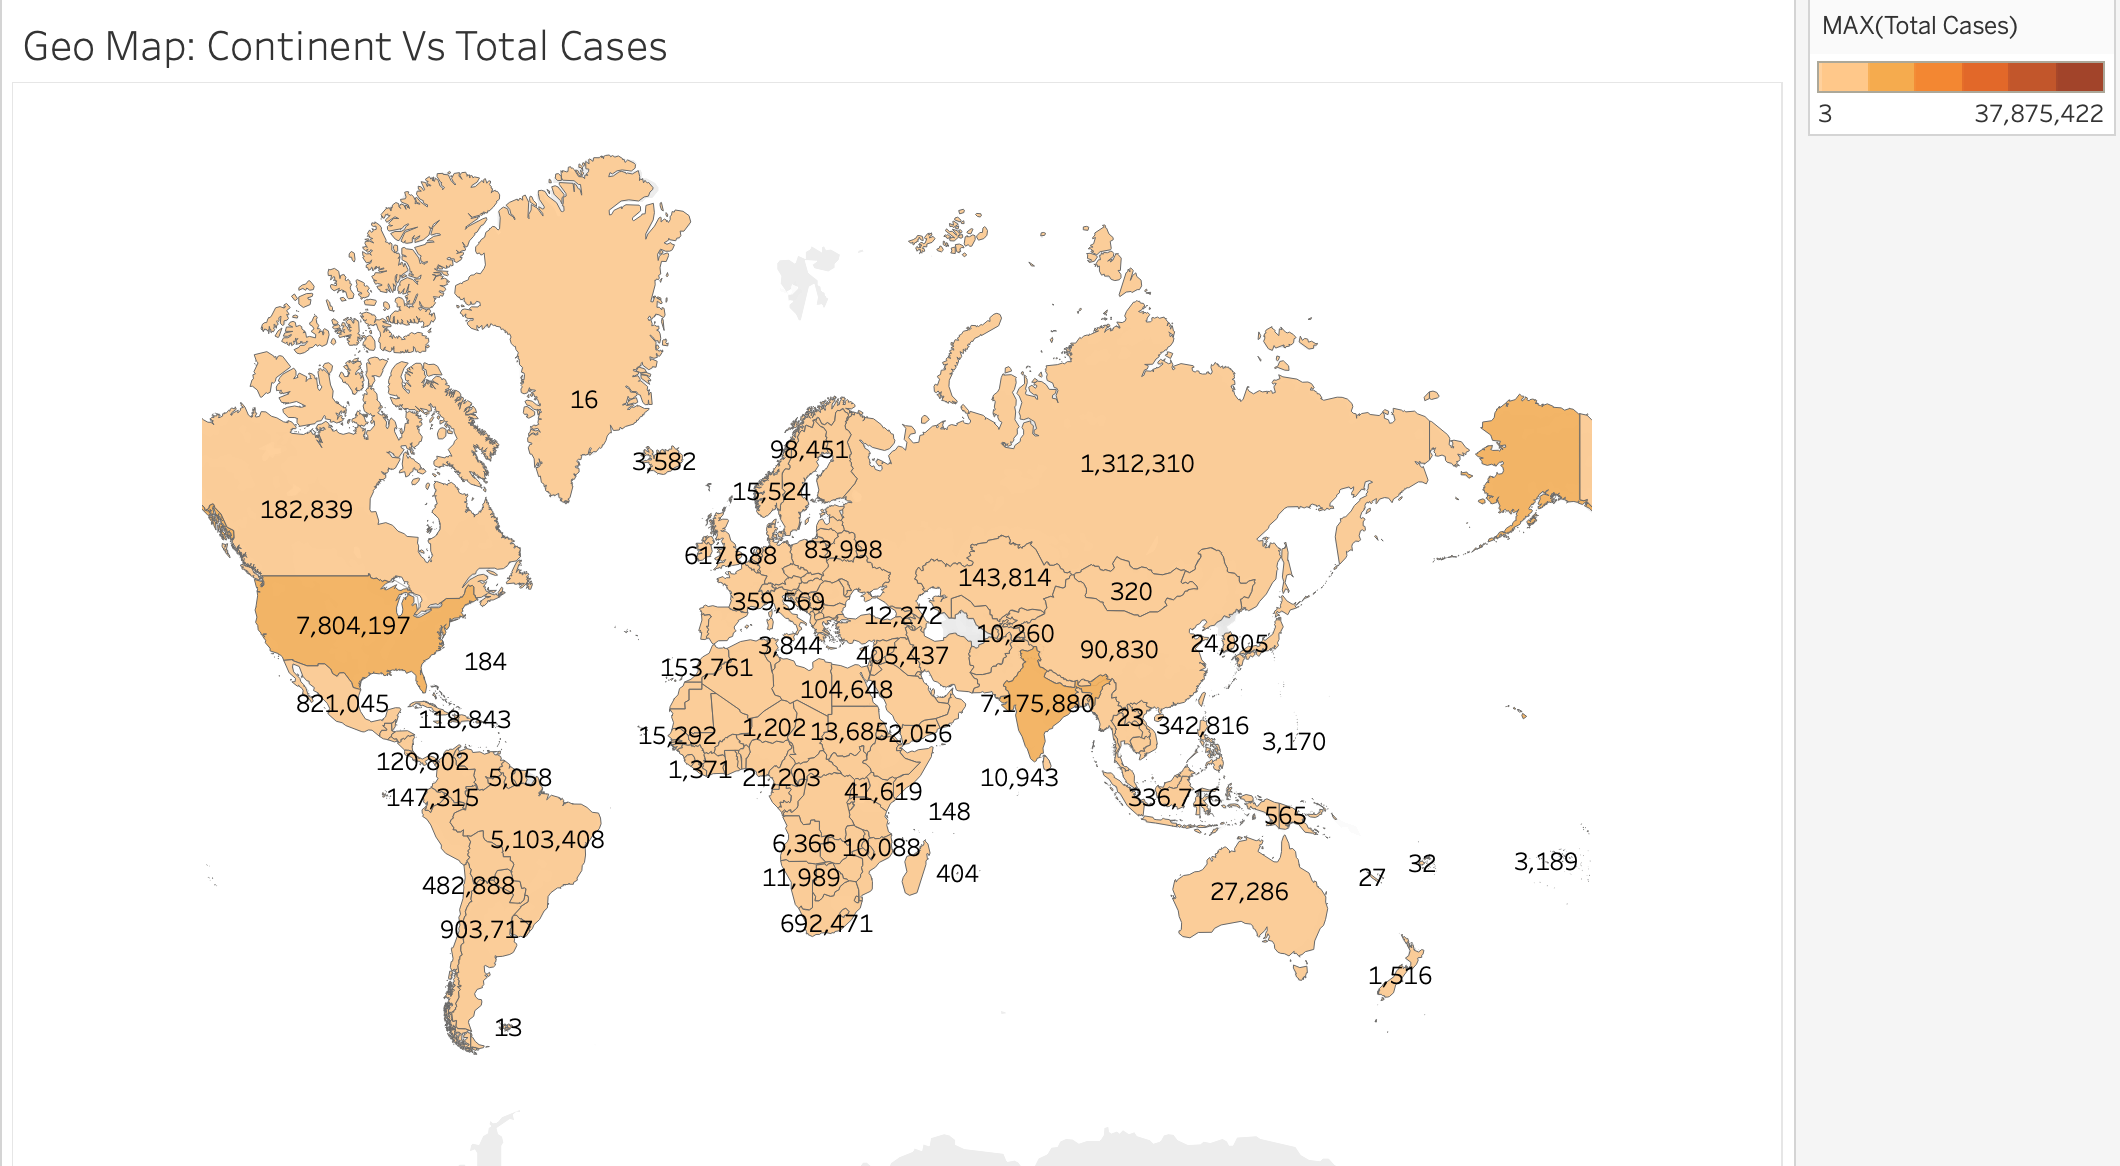

In [ ]:
display(Image("/content/Screen Shot 2020-11-02 at 9.49.18 PM.png", width=1500, height=500))

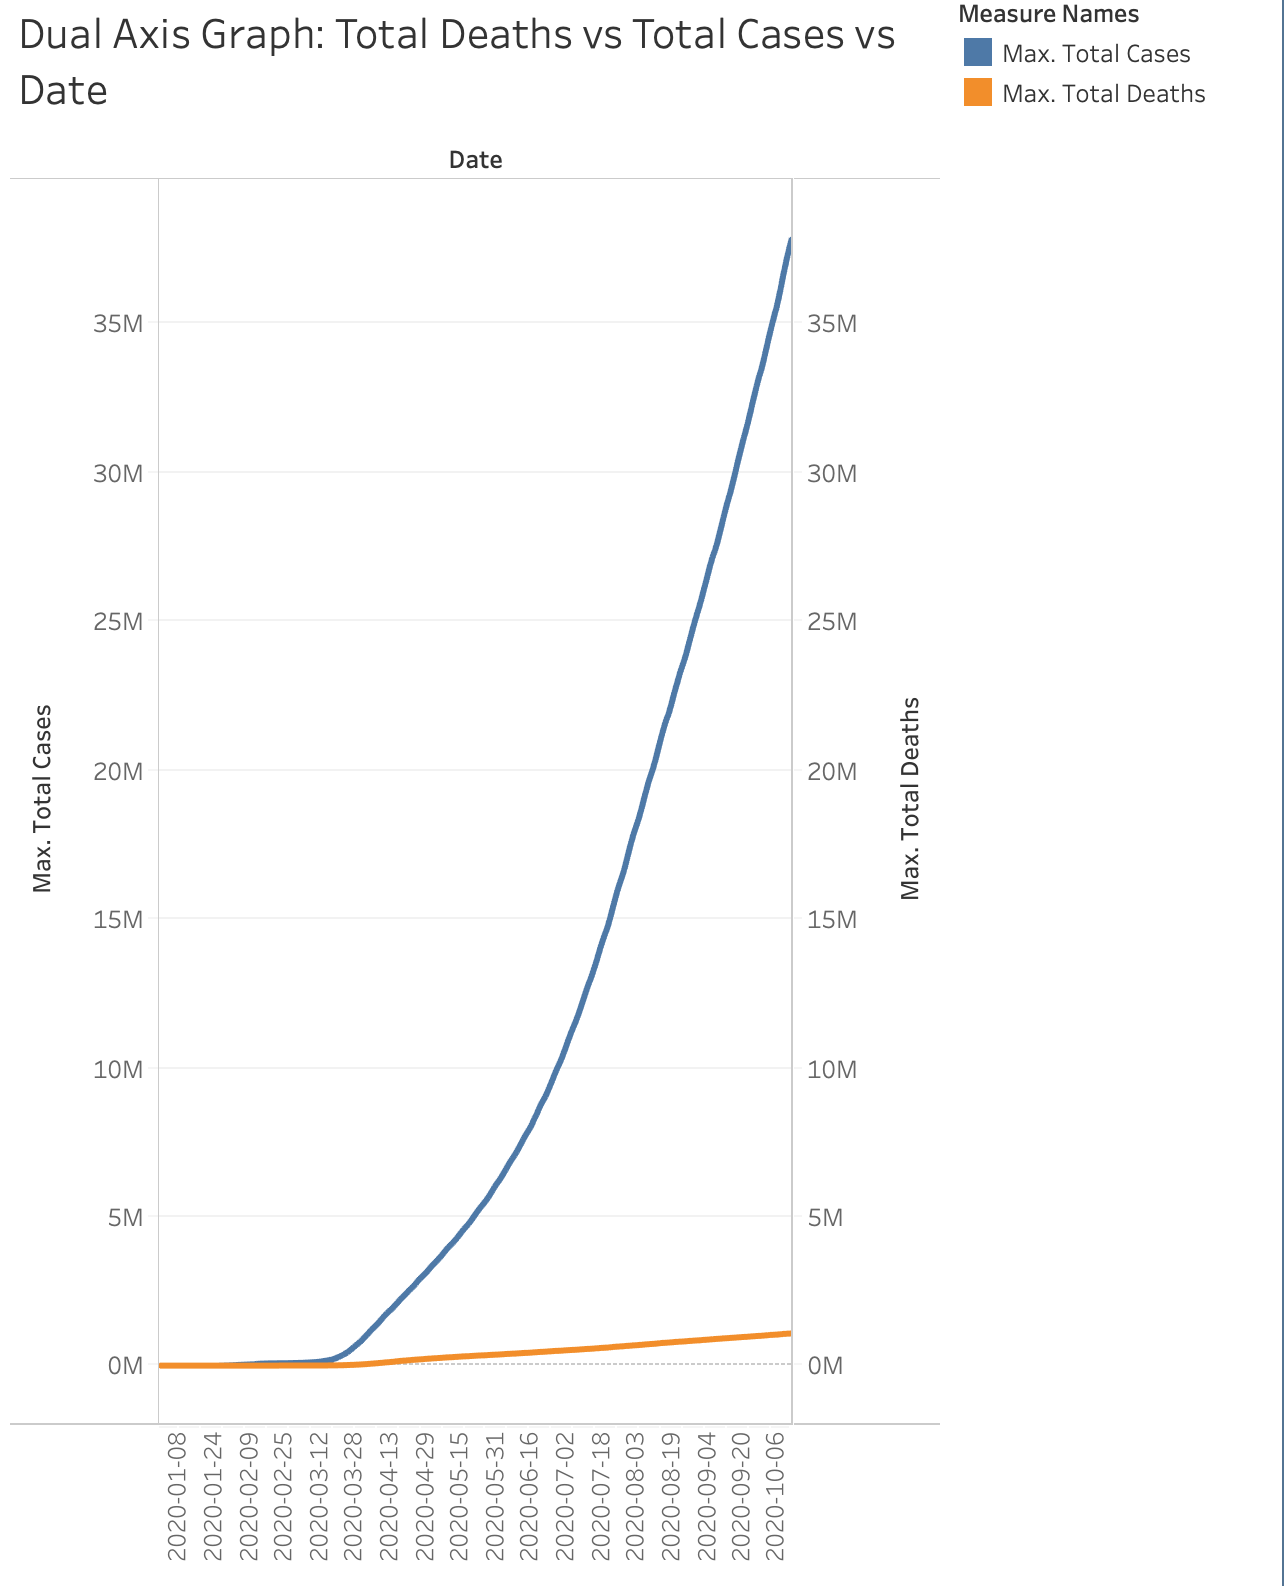

In [ ]:
display(Image('/content/Screen Shot 2020-11-02 at 9.46.14 PM.png', width = 1500, height = 500))

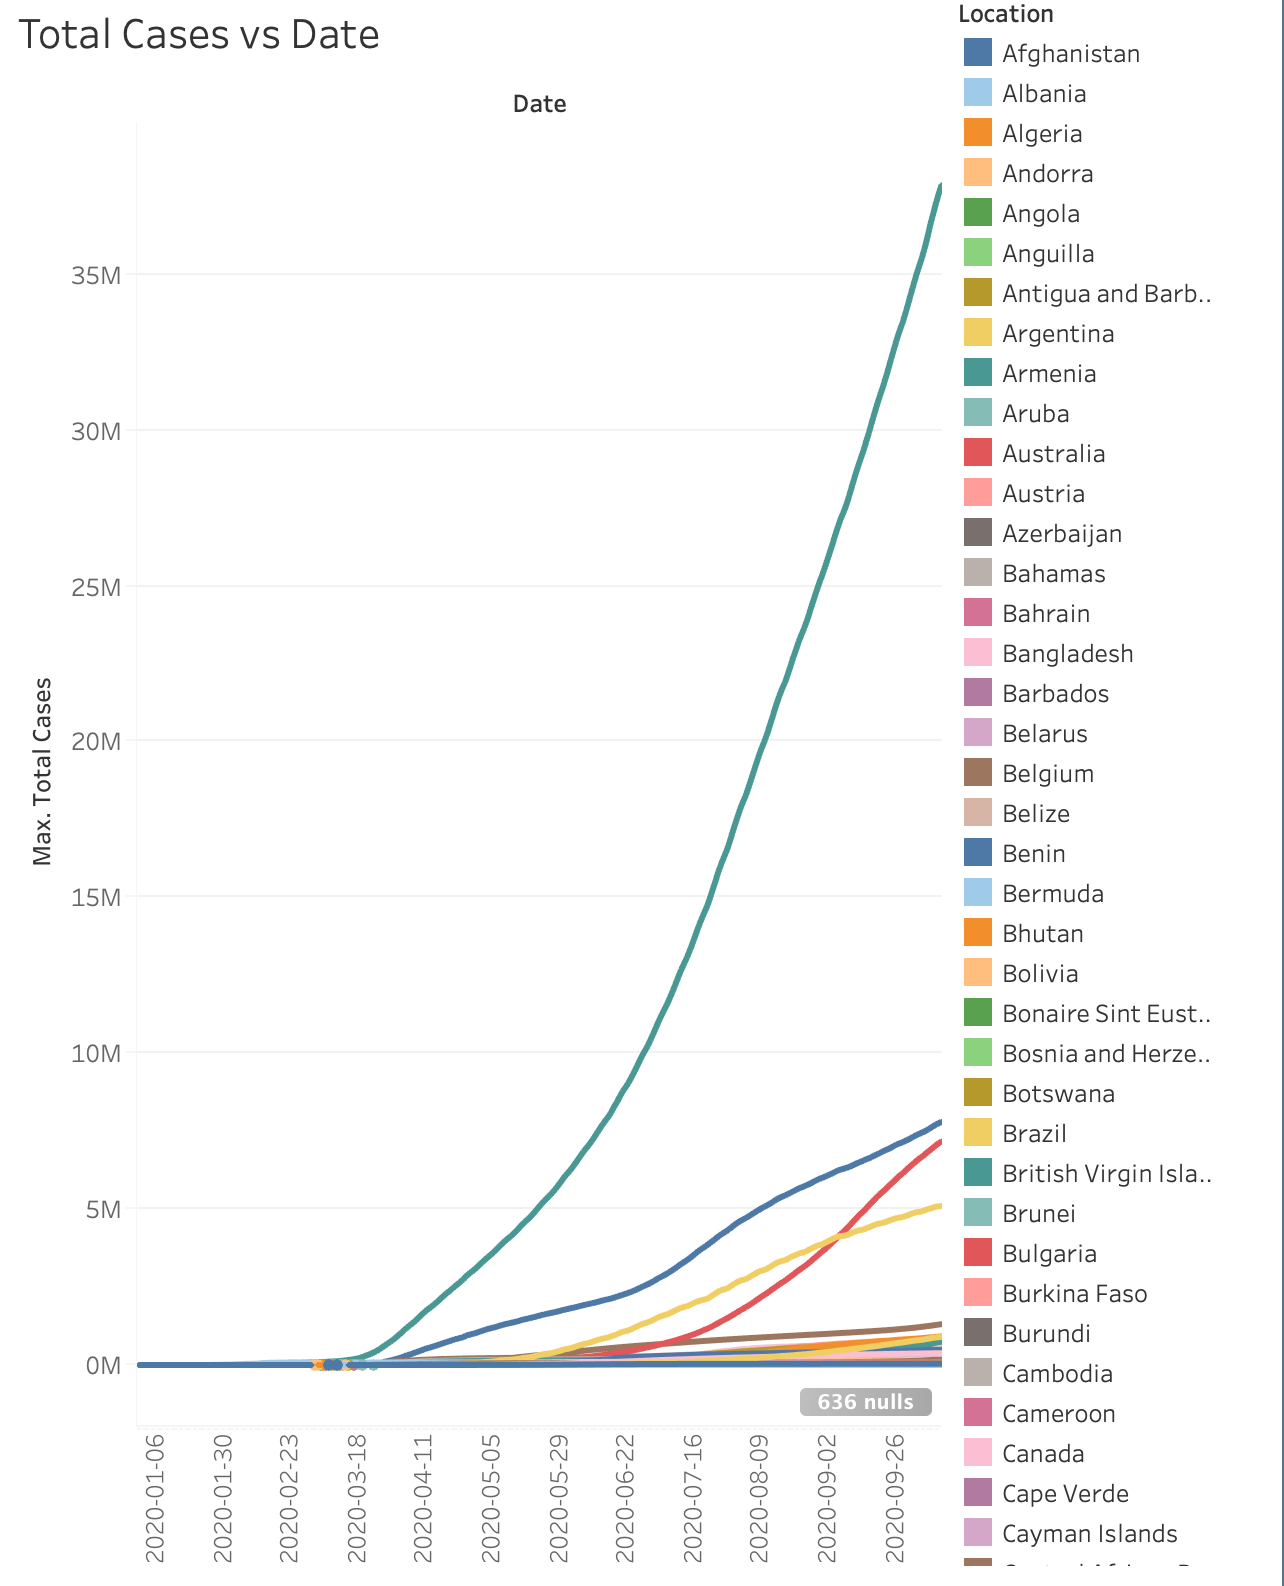

In [ ]:
display(Image('/content/Screen Shot 2020-11-02 at 9.45.51 PM.png', width = 1500, height = 500))

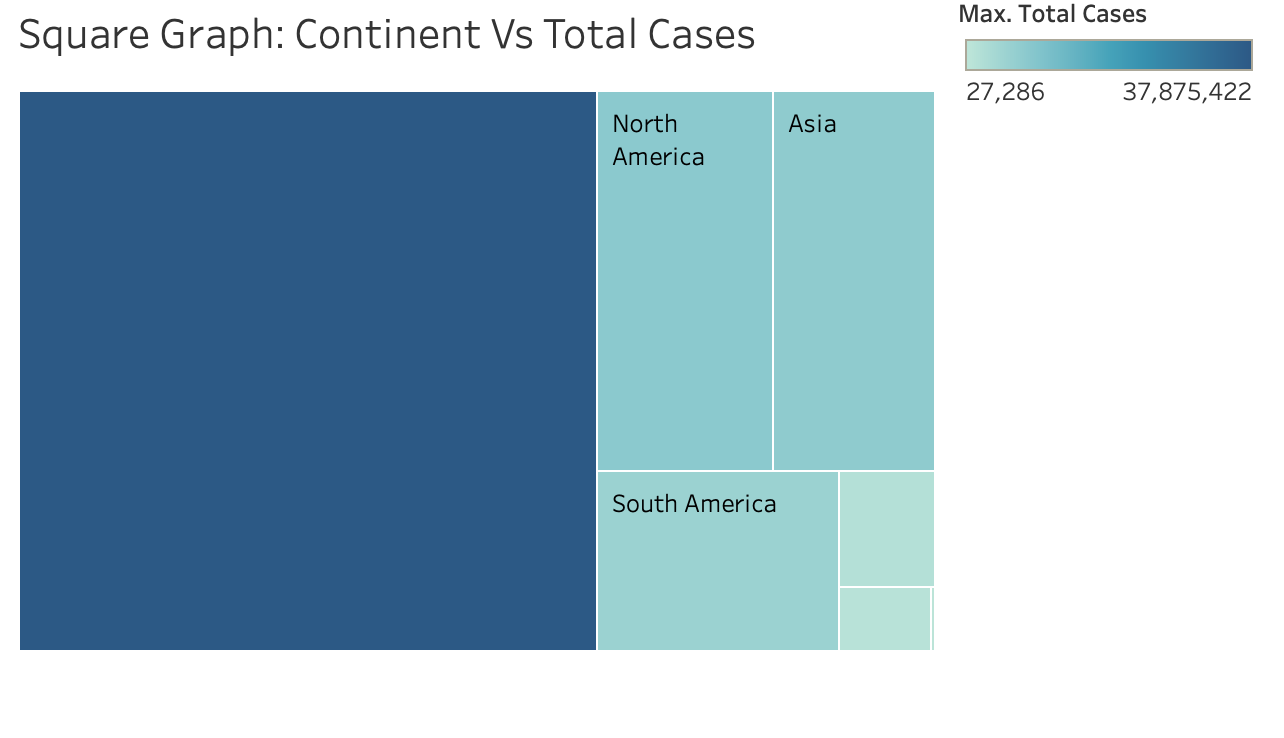

In [ ]:
display(Image('/content/Screen Shot 2020-11-02 at 9.47.21 PM.png', width = 750, height = 750))

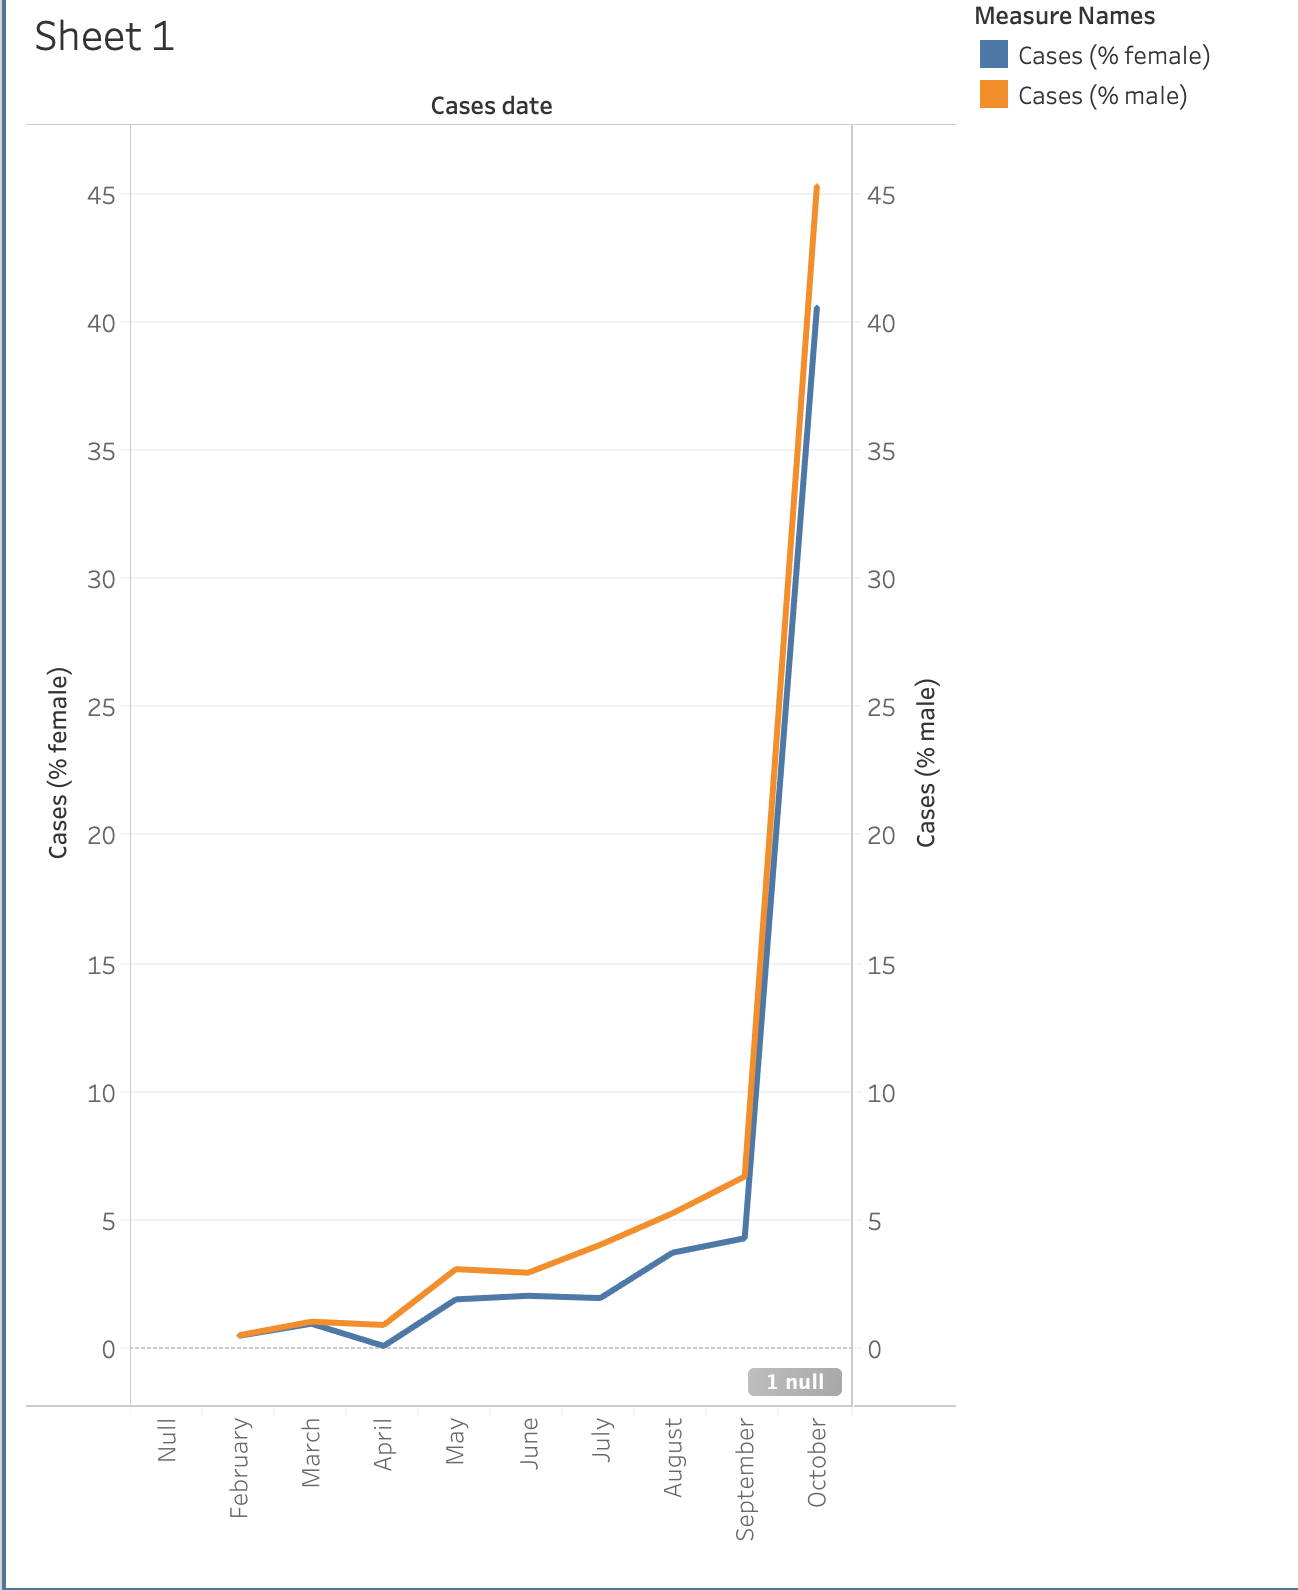

In [ ]:
display(Image('/content/Screen Shot 2020-11-10 at 12.42.17 AM.png', width = 1000, height = 500))

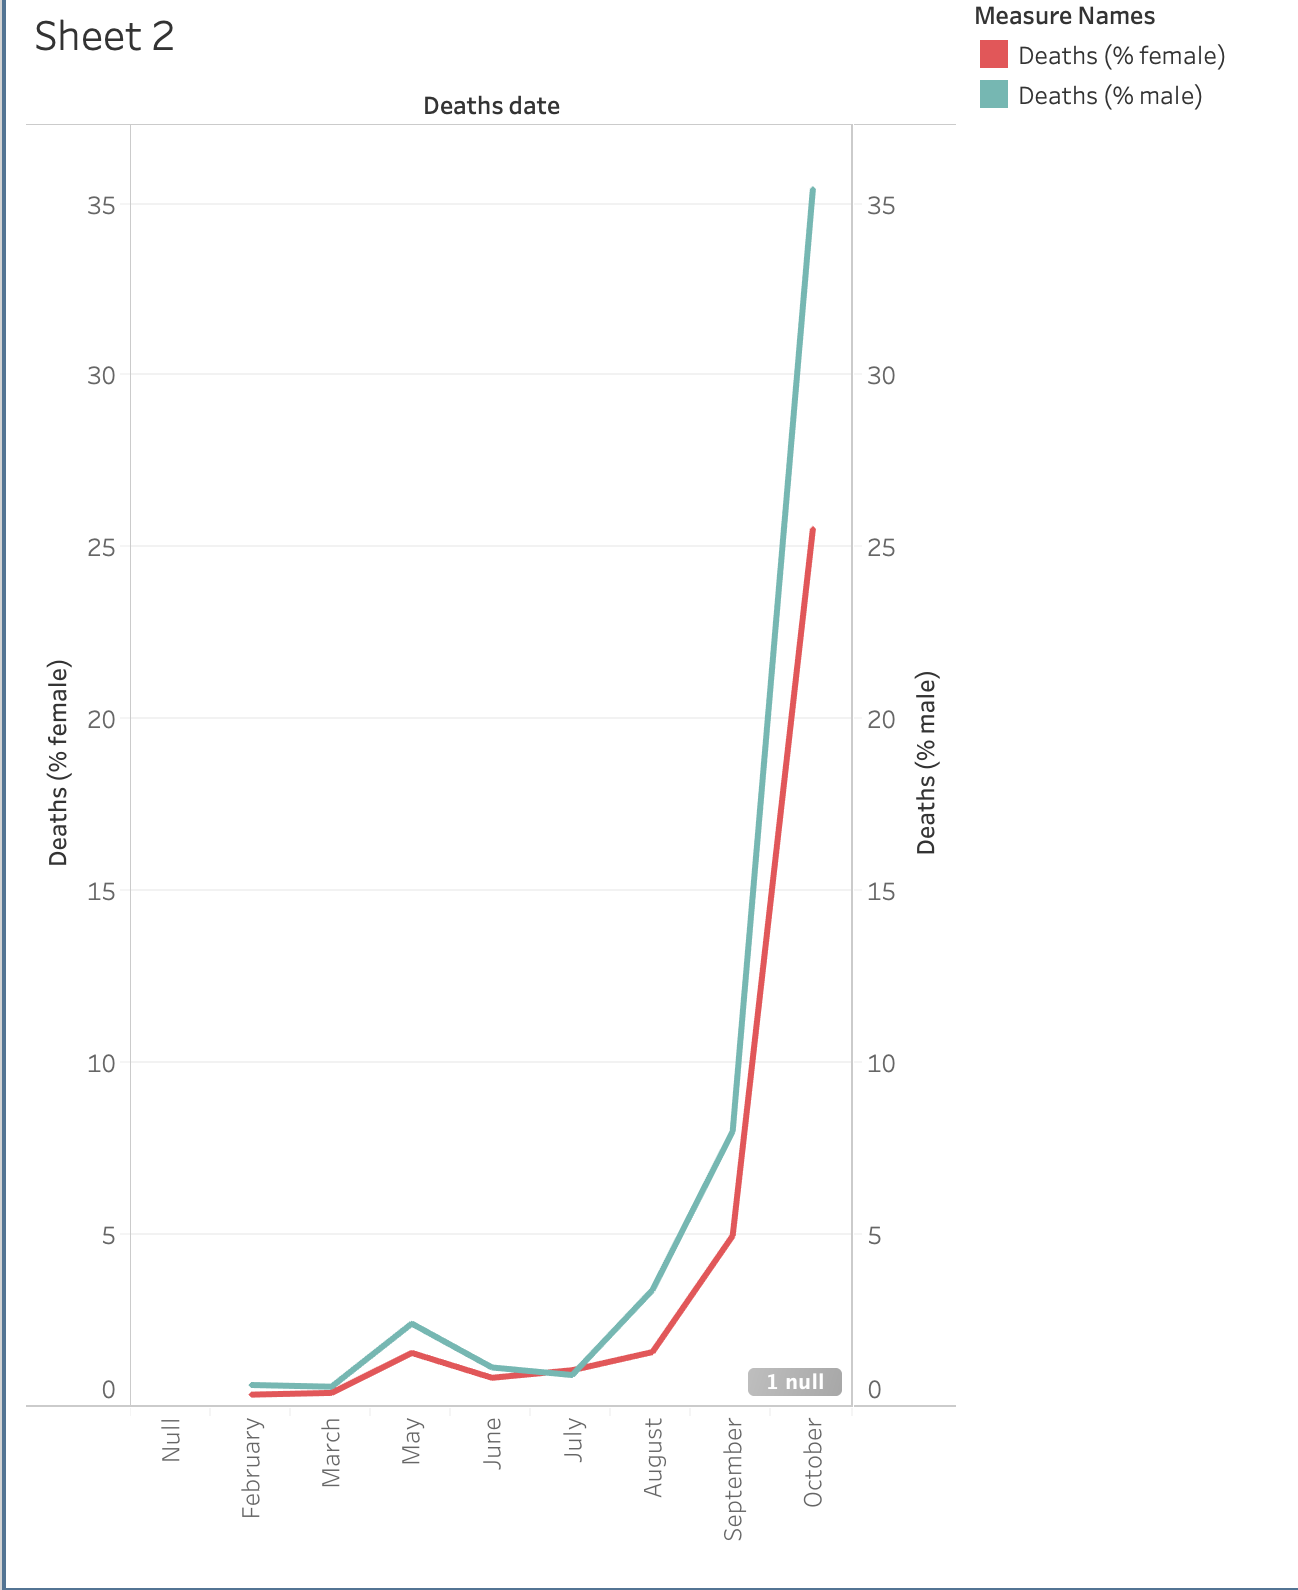

In [ ]:
display(Image('/content/Screen Shot 2020-11-10 at 12.42.30 AM.png', width = 600, height = 400))

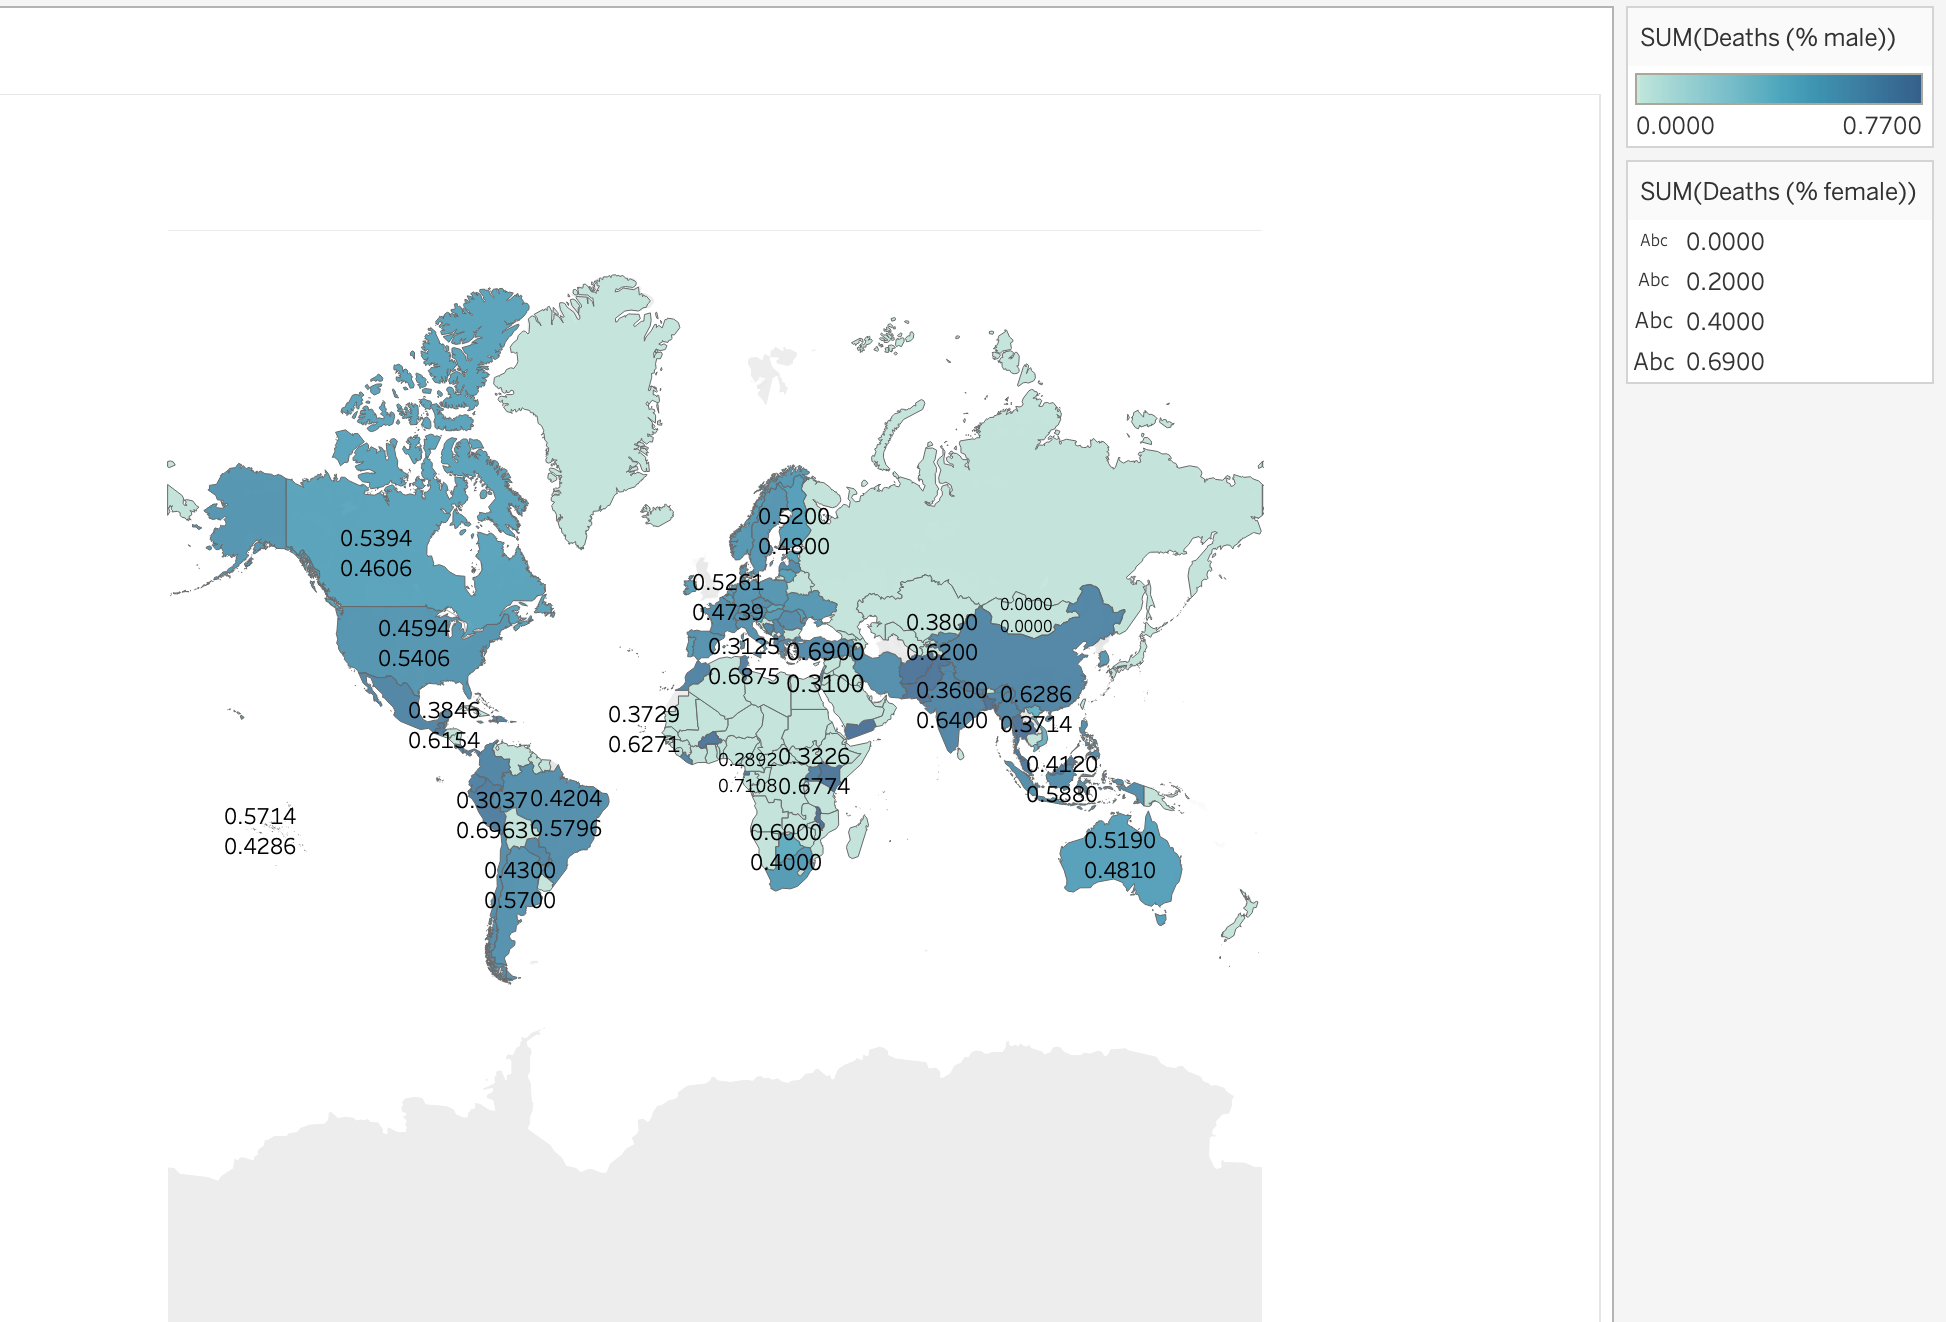

In [ ]:
display(Image('/content/Screen Shot 2020-11-10 at 12.43.59 AM.png', width = 1500, height = 500))

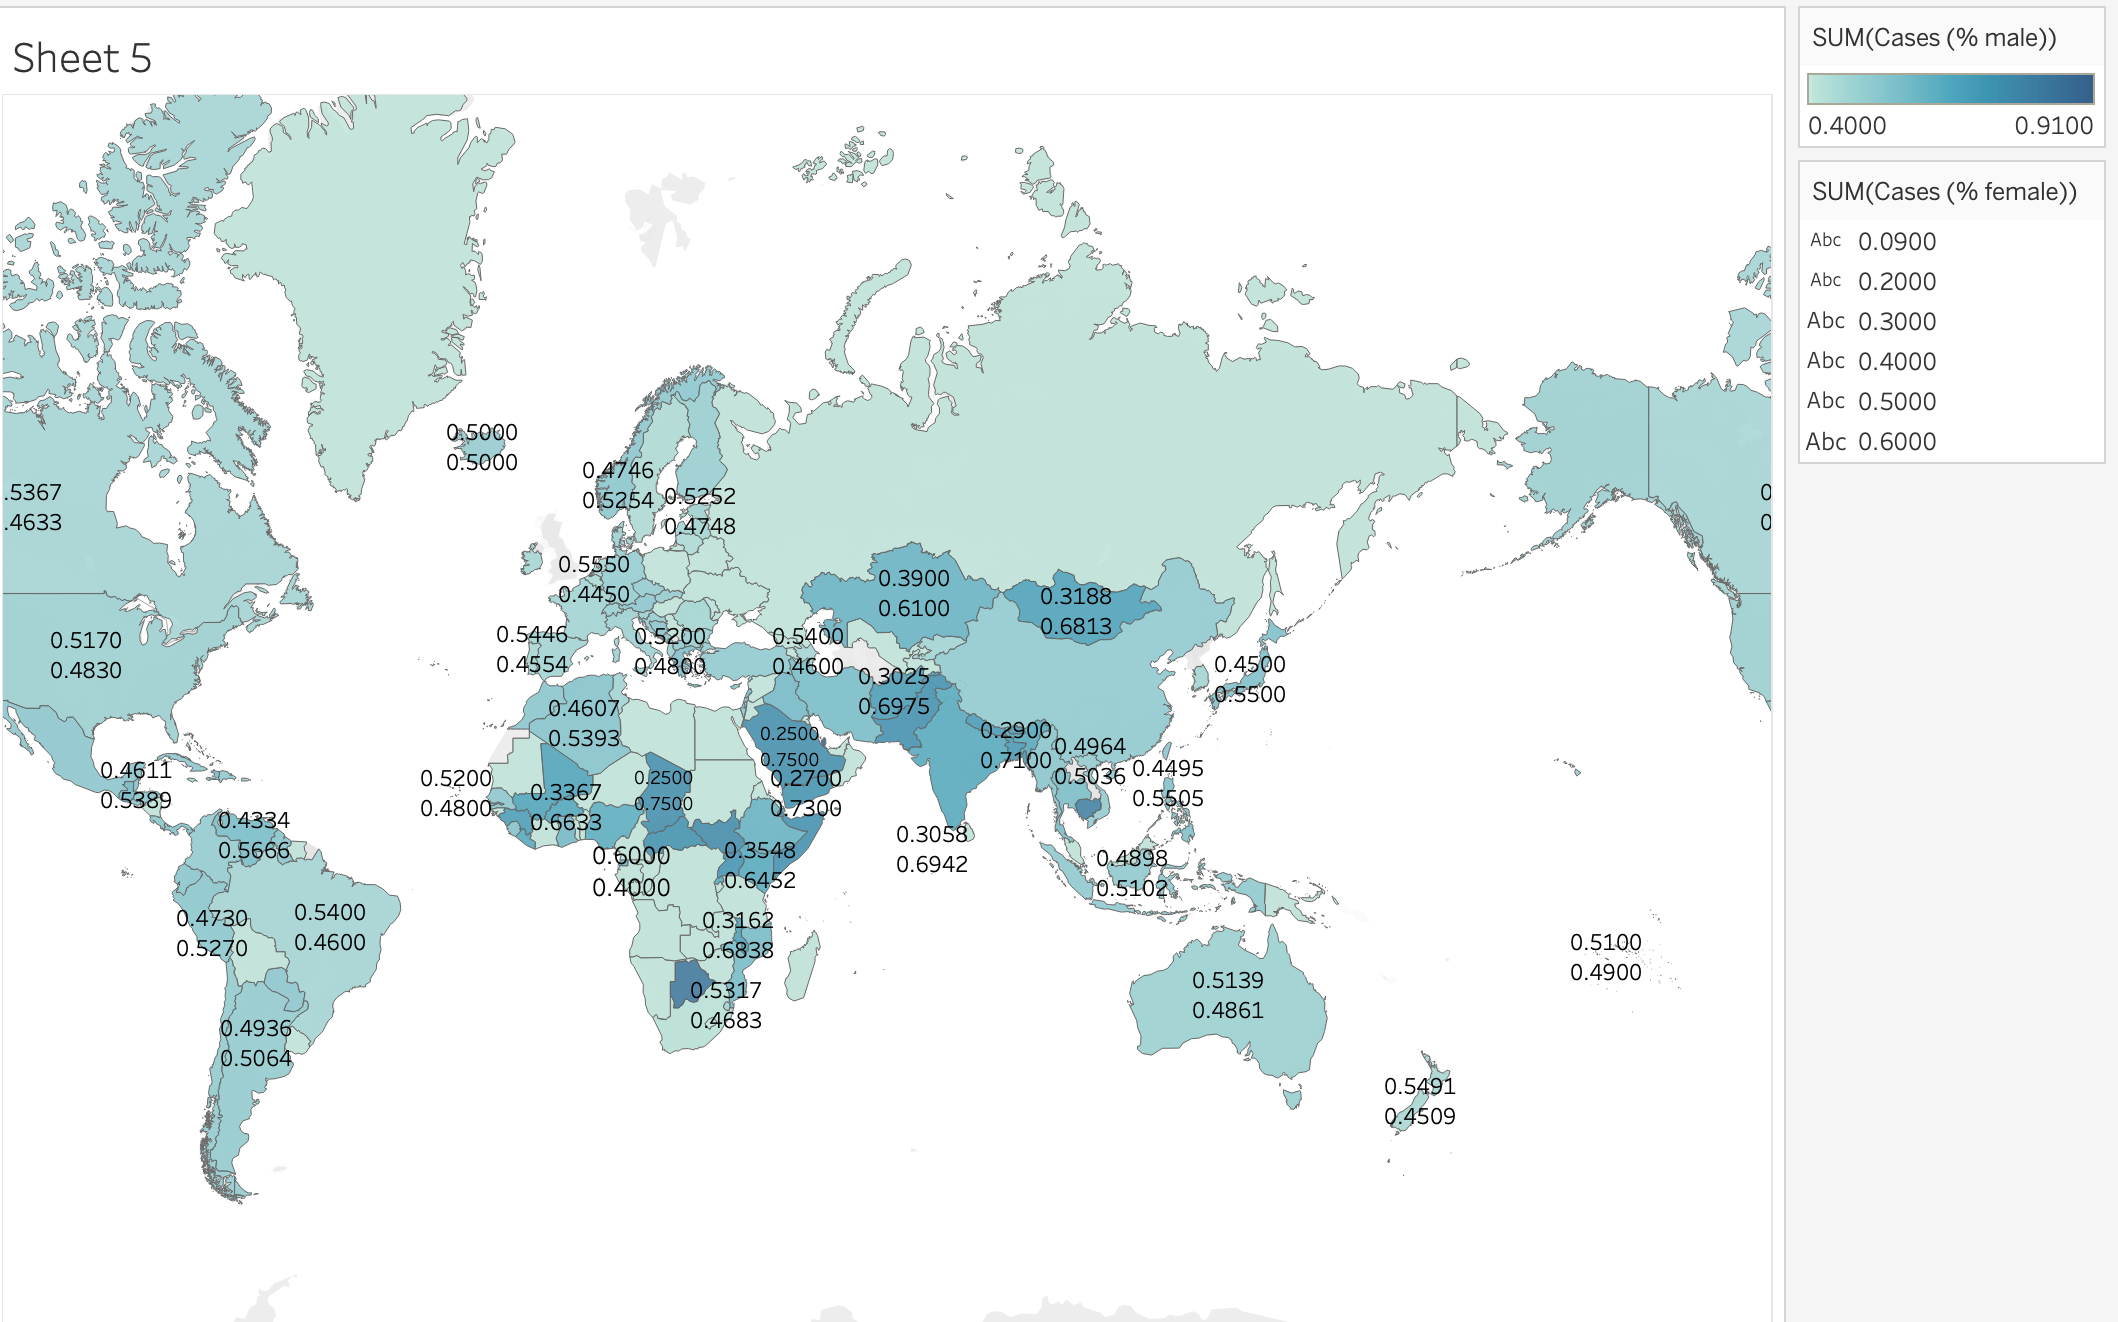

In [ ]:
display(Image('/content/Screen Shot 2020-11-10 at 12.44.19 AM.png', width = 1500, height = 500))

In [ ]:
#Increase size of plot
sns.set(rc={'figure.figsize':(30,10)})
#Change color palette
sns.set_palette('Set2')

In [ ]:
#Interactive line graph pf countries by date and total cases 
fig = px.line(new, x='date', y='total_cases',
              color="location",
              line_group="location", hover_name="location")
#fig.show()
fig.update_layout(title='Covid19_totalcases')

In [ ]:
##Interactive line graph of countries by date and total deaths
import plotly.express as px
fig = px.line(new, x='date', y='total_deaths',
              color="location",
              line_group="location", hover_name="location")
#fig.show()
fig.update_layout(title='Covid19_totaldeaths')

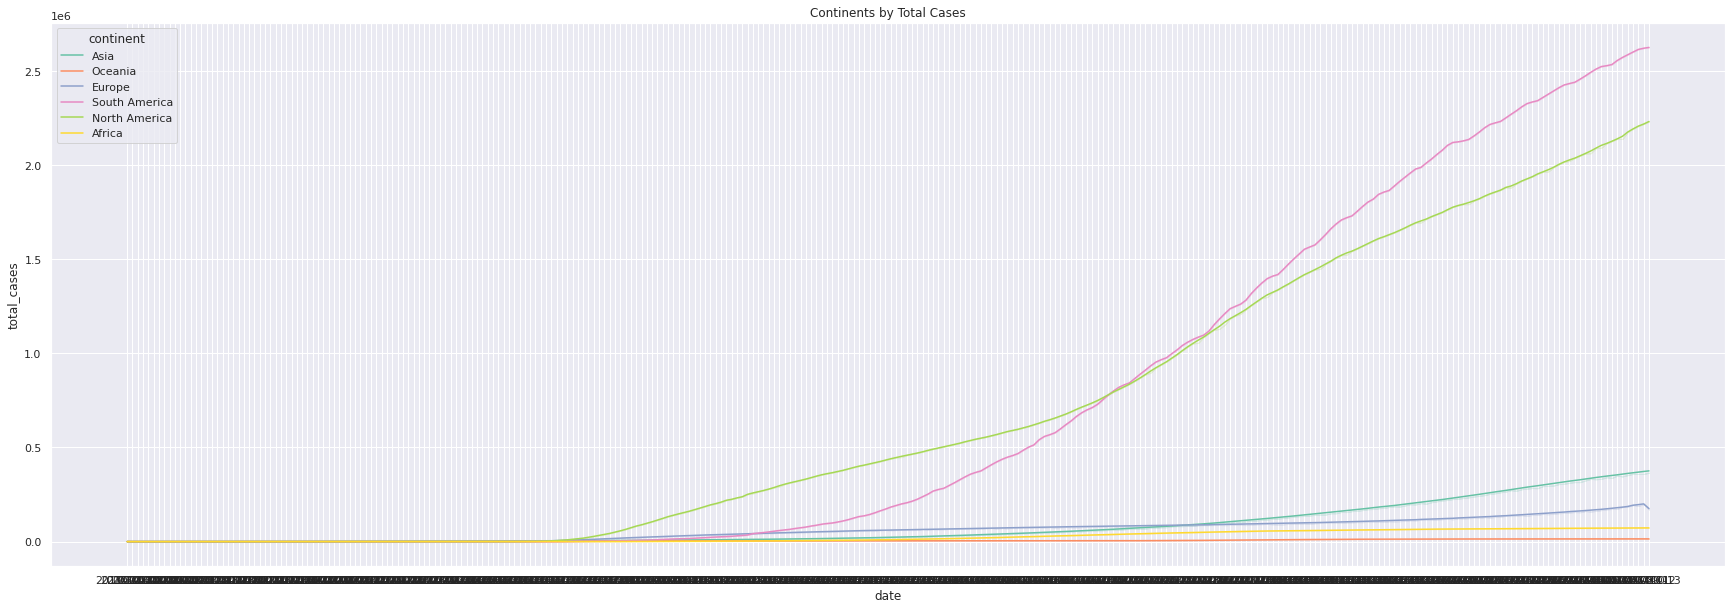

In [ ]:
#Output lineplot of Continents by Date and Total Cases
ax = sns.lineplot(x = 'date', y = 'total_cases', data = new, hue = 'continent', ci = False).set(title = 'Continents by Total Cases')

### Observation:
South America and North America are the two continents that have the largest increase overtime in total cases of covid-19.

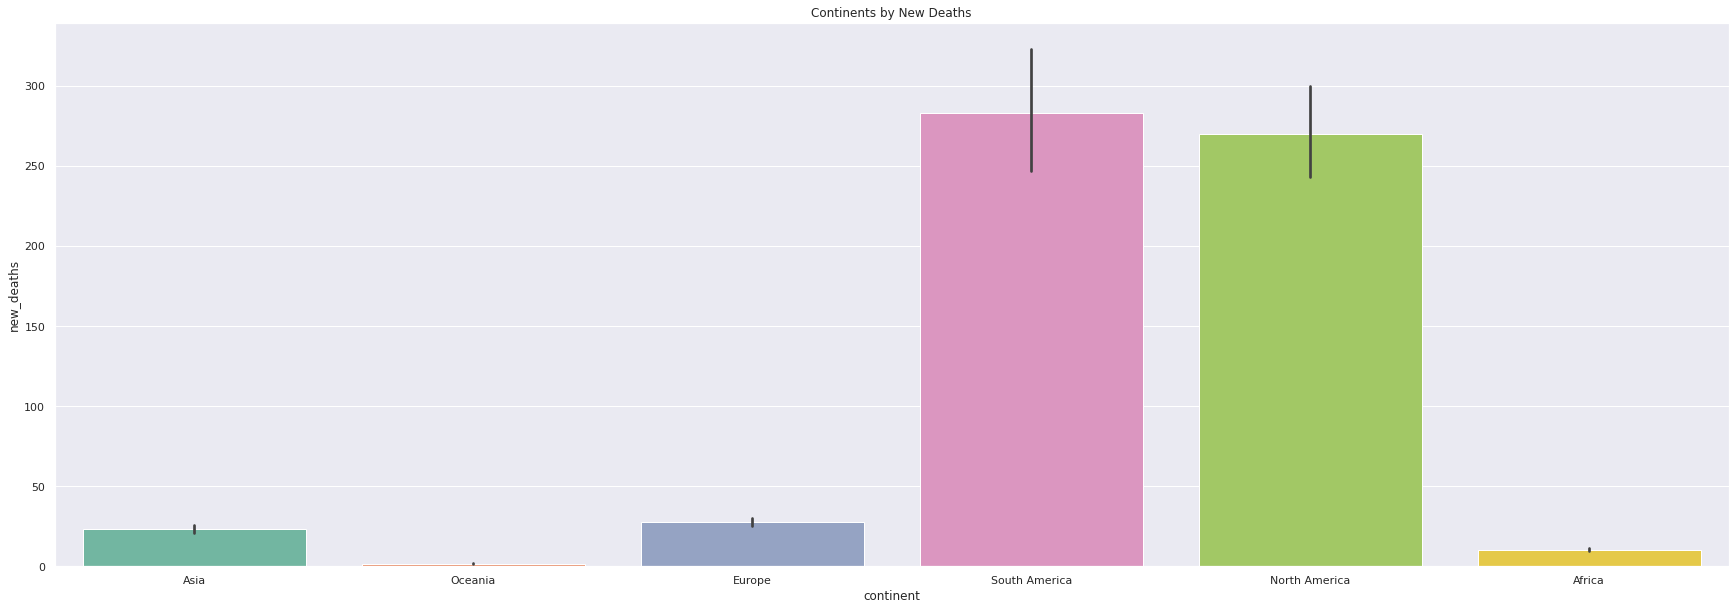

In [ ]:
#Output barplot by Continent and New Deaths
ax = sns.barplot(x = 'continent', y = 'new_deaths', data = new).set(title = 'Continents by New Deaths')

### Observation:

Similar to total cases, South America and North America is the continent with largest number in deaths.

In [ ]:
#Filter by North and South America data
south_and_north = new[(new['continent'] == 'South America') | (new['continent'] == 'North America')]
south_and_north

iso_code      continent  ... life_expectancy human_development_index
6417       BRA  South America  ...           75.88                   0.759
6418       BRA  South America  ...           75.88                   0.759
6419       BRA  South America  ...           75.88                   0.759
6420       BRA  South America  ...           75.88                   0.759
6421       BRA  South America  ...           75.88                   0.759
...        ...            ...  ...             ...                     ...
46686      USA  North America  ...           78.86                   0.924
46687      USA  North America  ...           78.86                   0.924
46688      USA  North America  ...           78.86                   0.924
46689      USA  North America  ...           78.86                   0.924
46690      USA  North America  ...           78.86                   0.924

[1728 rows x 33 columns]

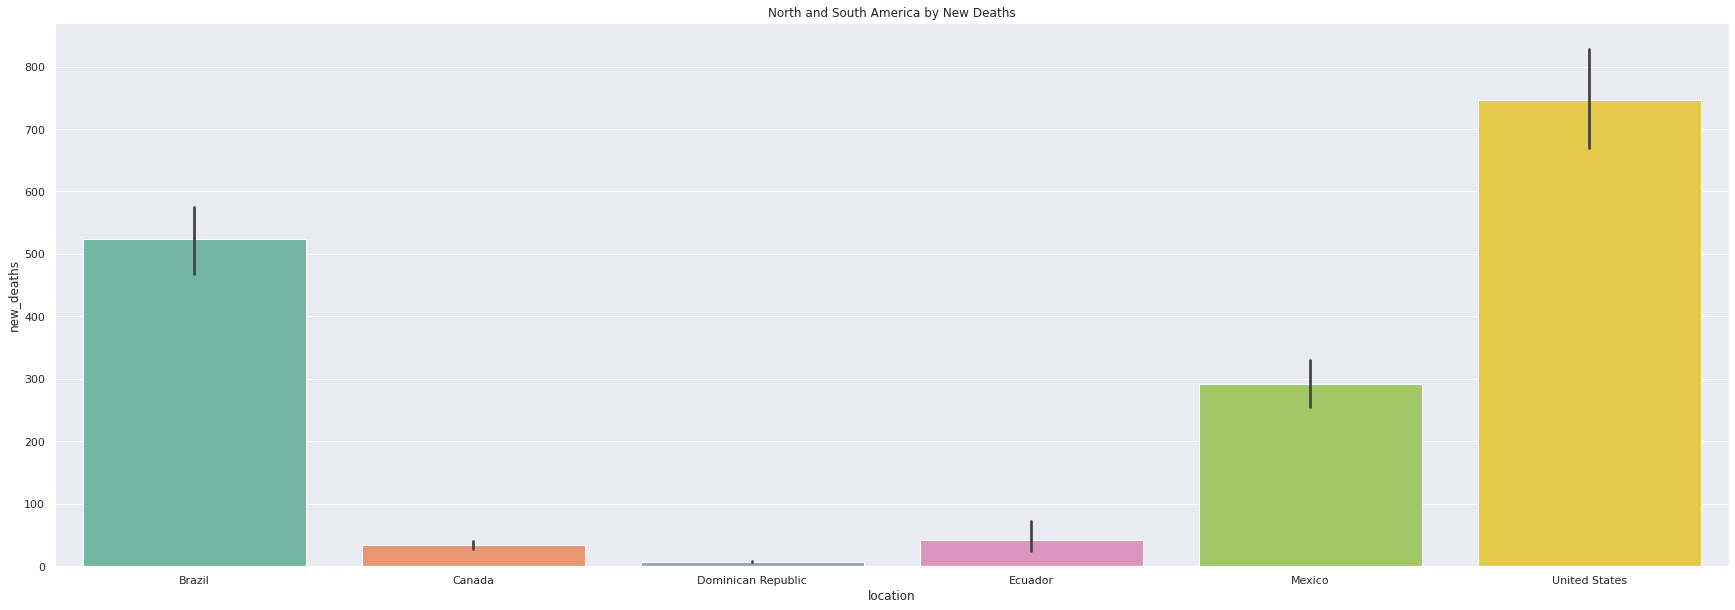

In [ ]:
#Output Barplot of North and South America locations
ax = sns.barplot(x = 'location', y = 'new_deaths', data = south_and_north).set(title = 'North and South America by New Deaths')

### Observation:

When examining countries in South America and North America, the United States has the most deaths and Brazil follows after. 
-US: 750 deaths per day
-Brazil: 510 deaths per day

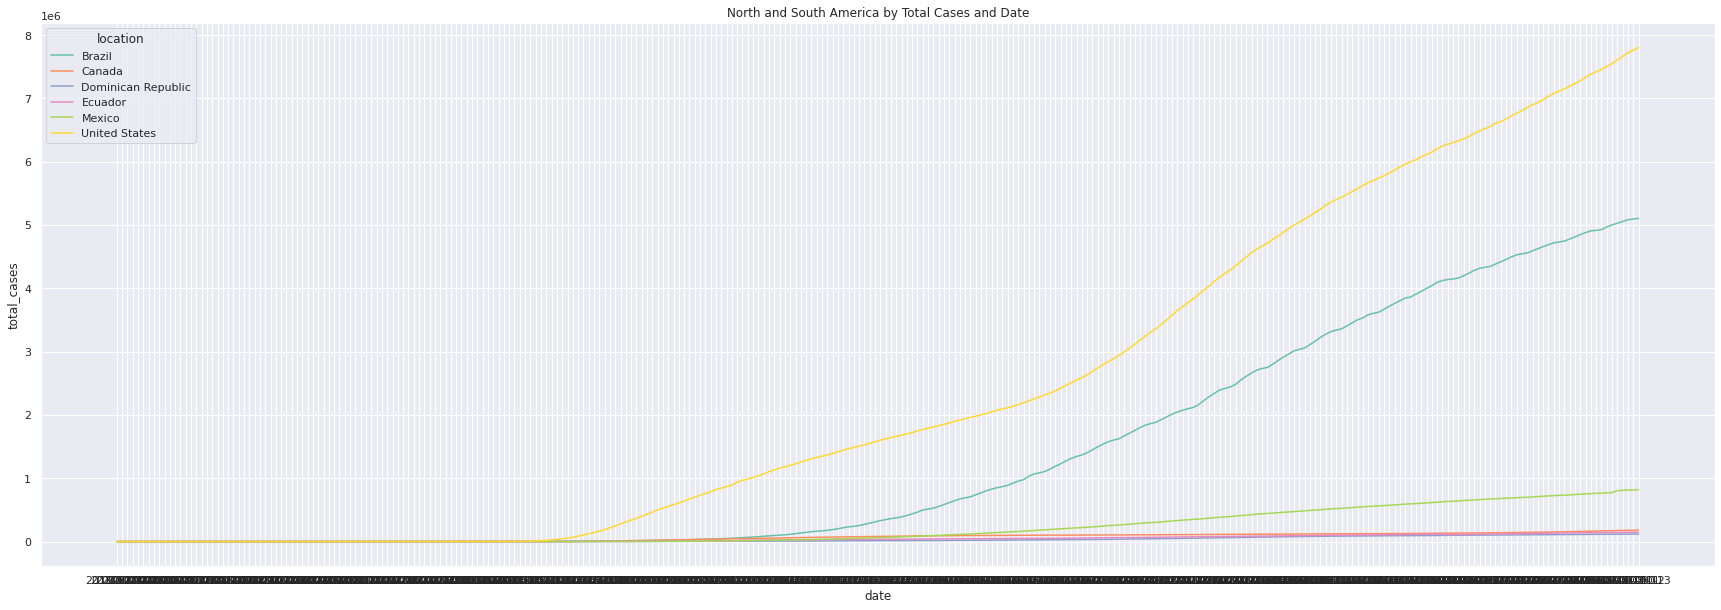

In [ ]:
#Output lineplot of North and South America by Total Cases and Date
ax = sns.lineplot(x = 'date', y = 'total_cases', data = south_and_north, hue = 'location').set(title = 'North and South America by Total Cases and Date')

### Observation:

The United States and Brazil's total cases of covid-19 both move upwards at a rapid pace. Canada and the Dominican Republic both are quite flat compared to the US and Brazil. 

In [ ]:
#Filter All Continents except for North and South America
all_other = new[(new['continent'] != 'South America') & (new['continent'] != 'North America')]
all_other

iso_code continent  ... life_expectancy human_development_index
210         AFG      Asia  ...           64.83                   0.498
211         AFG      Asia  ...           64.83                   0.498
212         AFG      Asia  ...           64.83                   0.498
213         AFG      Asia  ...           64.83                   0.498
214         AFG      Asia  ...           64.83                   0.498
...         ...       ...  ...             ...                     ...
49585  OWID_WRL       NaN  ...           72.58                     NaN
49586  OWID_WRL       NaN  ...           72.58                     NaN
49587  OWID_WRL       NaN  ...           72.58                     NaN
49588  OWID_WRL       NaN  ...           72.58                     NaN
49589  OWID_WRL       NaN  ...           72.58                     NaN

[17563 rows x 33 columns]

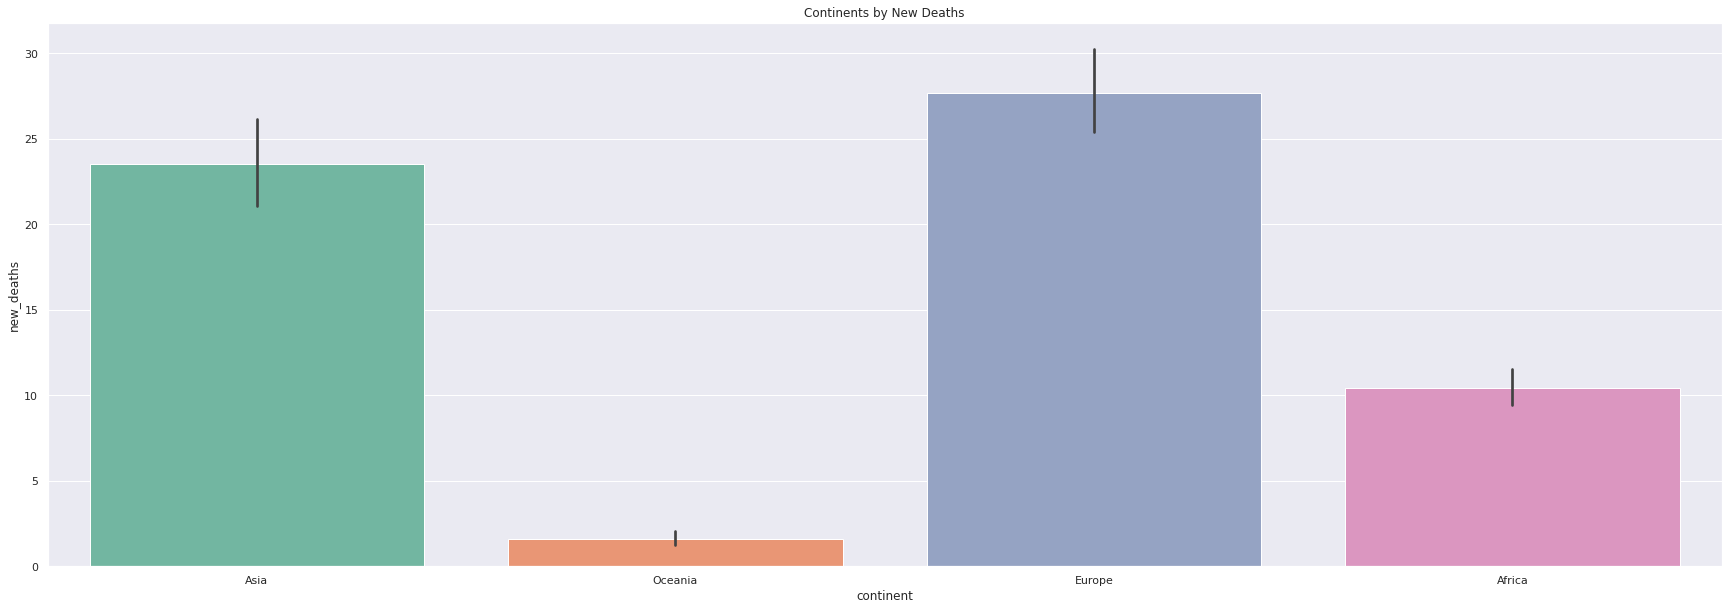

In [ ]:
ax = sns.barplot(x = 'continent', y = 'new_deaths', data = all_other).set(title = 'Continents by New Deaths')

### Observation:

We examined other continents besides North and South America. Europe and Asia and quite similar but the death counts per day is quite small and in the 20s range. The United States and Brazil are respectively in the 700 and 500 ranges. Oceania seems to be doing very well in the number of deaths from covid-19. 

In [ ]:
#Filter only asia, europe, africa, oceania
asia = new[(new['continent'] == 'Asia')]
europe = new[(new['continent'] == 'Europe')]
africa = new[(new['continent'] == 'Africa')]
oceania = new[(new['continent'] == 'Oceania')]

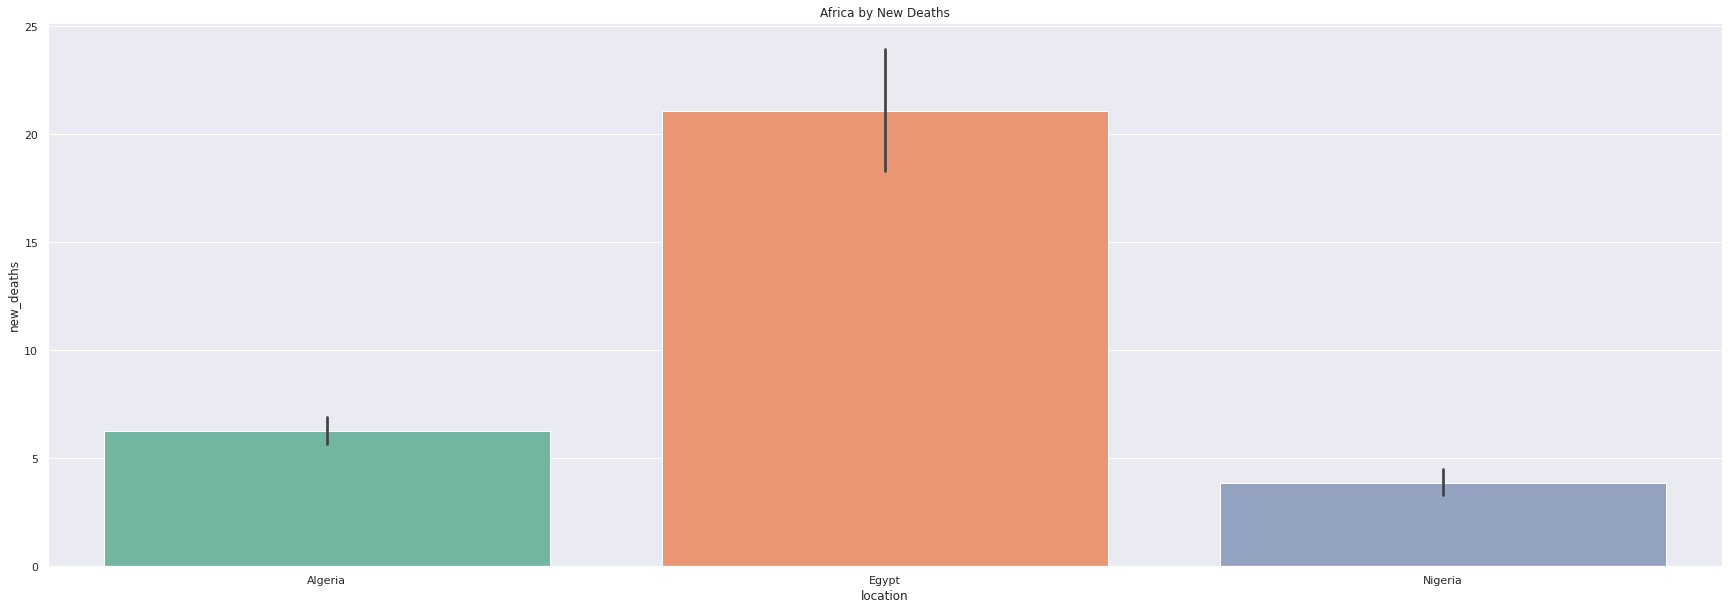

In [ ]:
ax = sns.barplot(x = 'location', y = 'new_deaths', data = africa).set(title = 'Africa by New Deaths')

### Observation:

By examining specific African locations, Egypt has the most deaths per day than Algeria and Nigeria. But it is only in the 20s range.

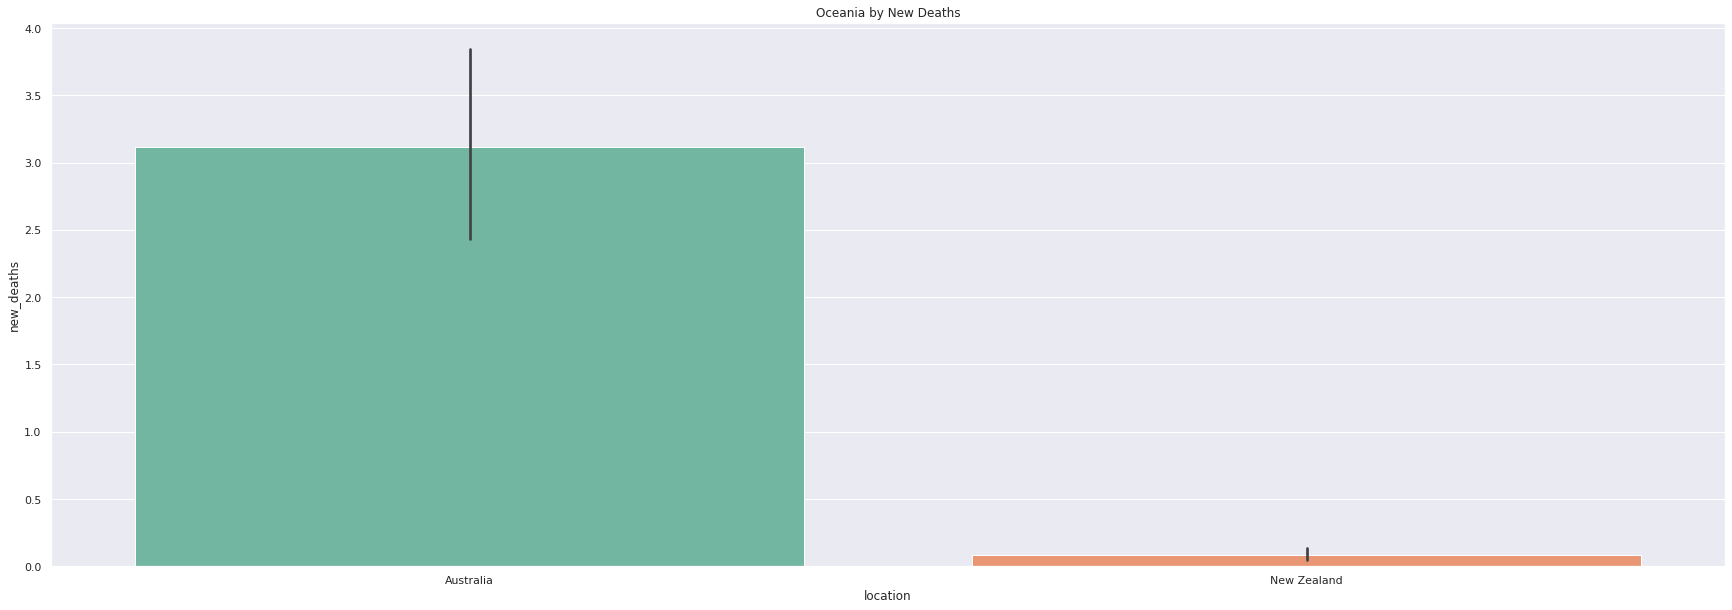

In [ ]:
ax = sns.barplot(x = 'location', y = 'new_deaths', data = oceania).set(title = 'Oceania by New Deaths')

### Observation:

In Oceania, Australia has much more covid-19 deaths per day than in New Zealand. It is known that New Zealand is very strict in their protocols in dealing with the pandemic. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

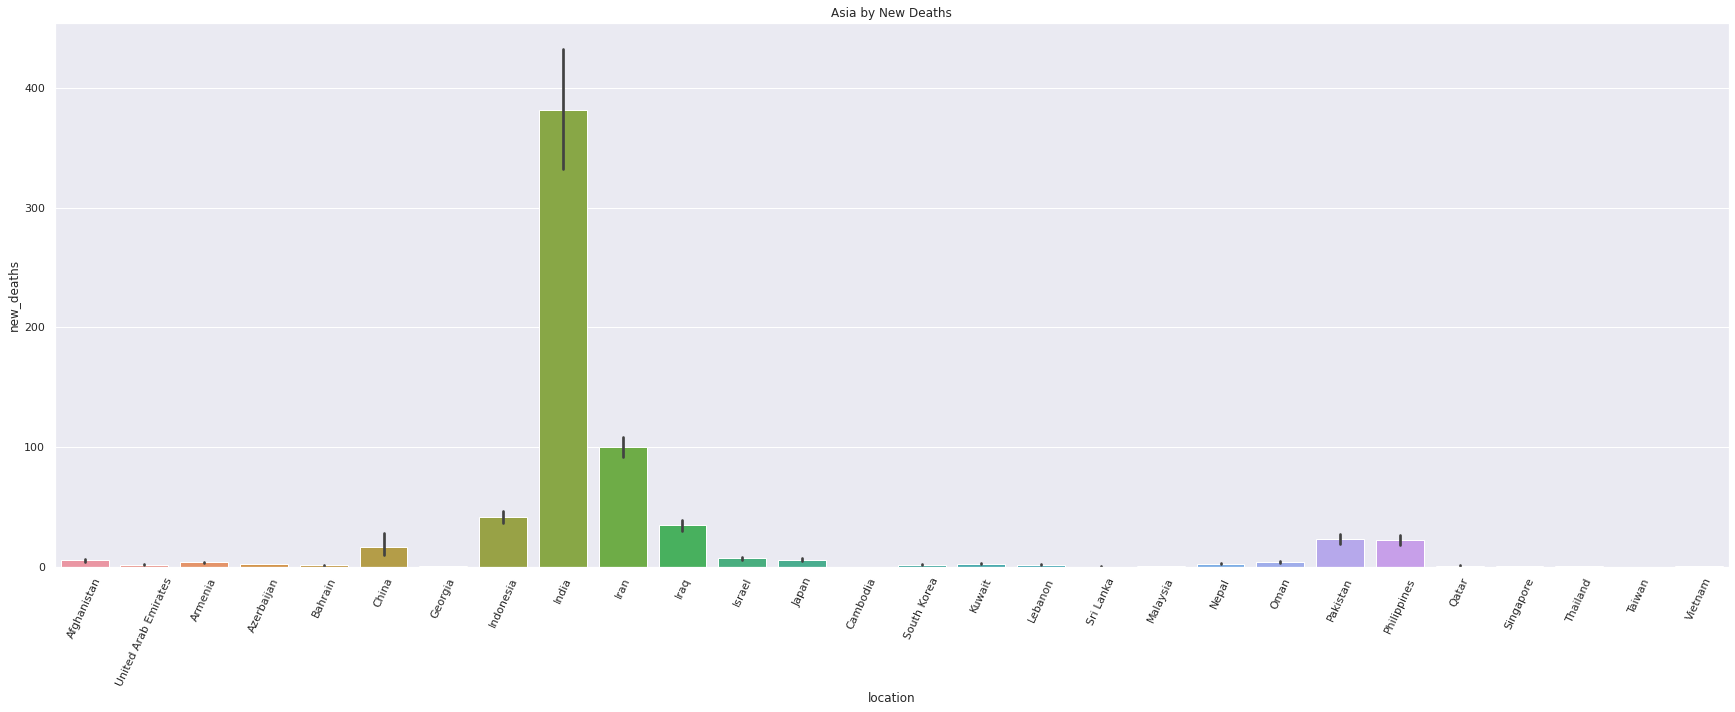

In [ ]:
ax = sns.barplot(x = 'location', y = 'new_deaths', data = asia).set(title = 'Asia by New Deaths')
plt.xticks(rotation = 65)

### Observation:

In Asia, India has the most covid-19 deaths per day, it is about 360 deaths per day. Iran is the second highest covid-19 deaths per day at about 100 dead per day. Even though covid-19 was originally from China, the deaths per day has decreased dramatically.  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

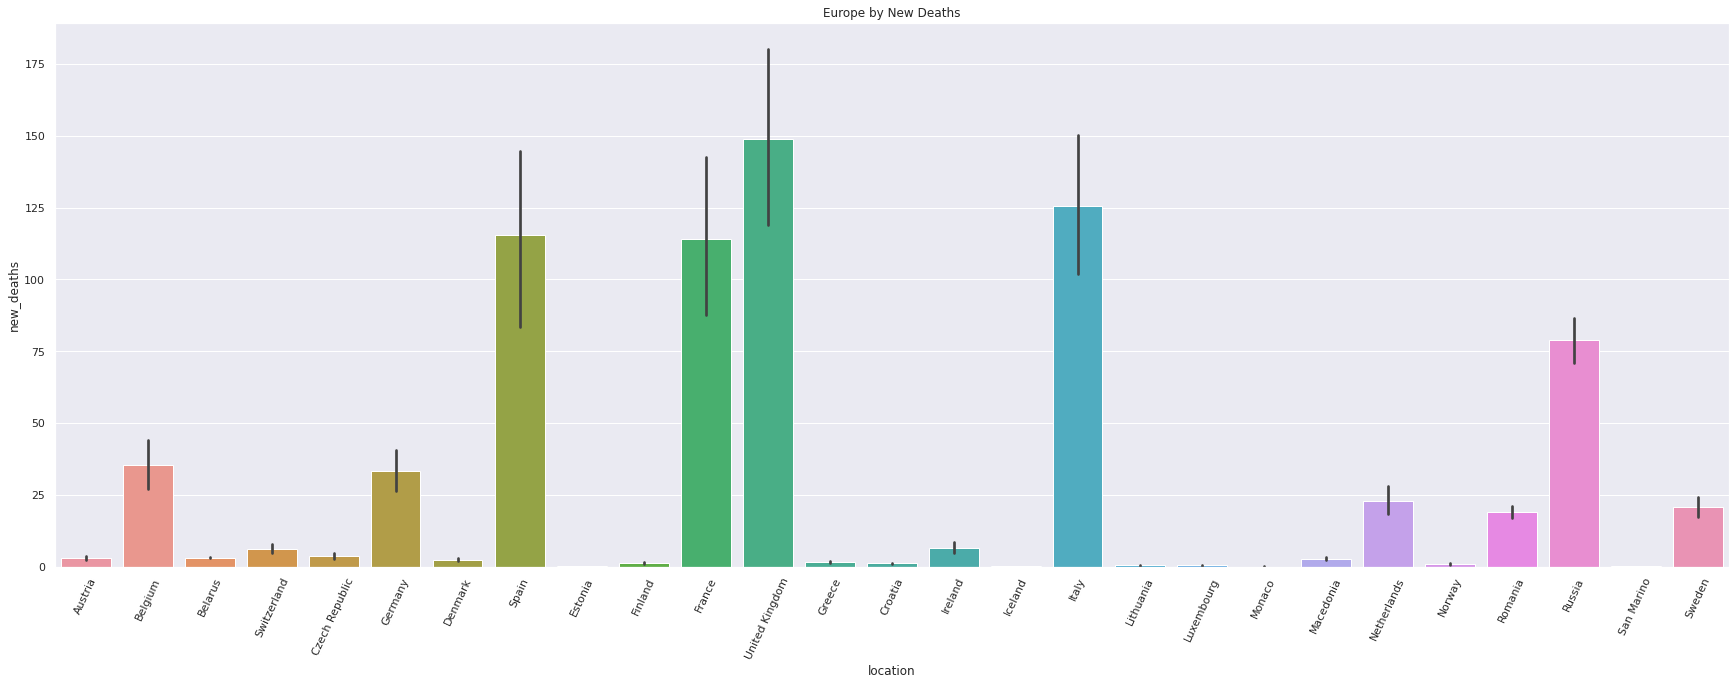

In [ ]:
ax = sns.barplot(x = 'location', y = 'new_deaths', data = europe).set(title = 'Europe by New Deaths')
plt.xticks(rotation = 65)

### Observation:

In Europe, the United Kingdom, Italy and France has the most deaths per day. The UK has 150 deaths per day, Italy has 125 deaths per day, France has 120 deaths per day. 

#### Box plots for top 10 countries by total cases


In [ ]:
top_total = new.groupby(['location'])[['total_cases']].mean()
top_total = top_total.reset_index()
top_total.sort_values(by = 'total_cases', inplace = True, ascending = False)

top_total = top_total[top_total['location'] != 'World']
top_total = top_total[:10]

top_total_list = list(top_total['location'].values)

top_10_total = new[new['location'].isin(top_total_list)]

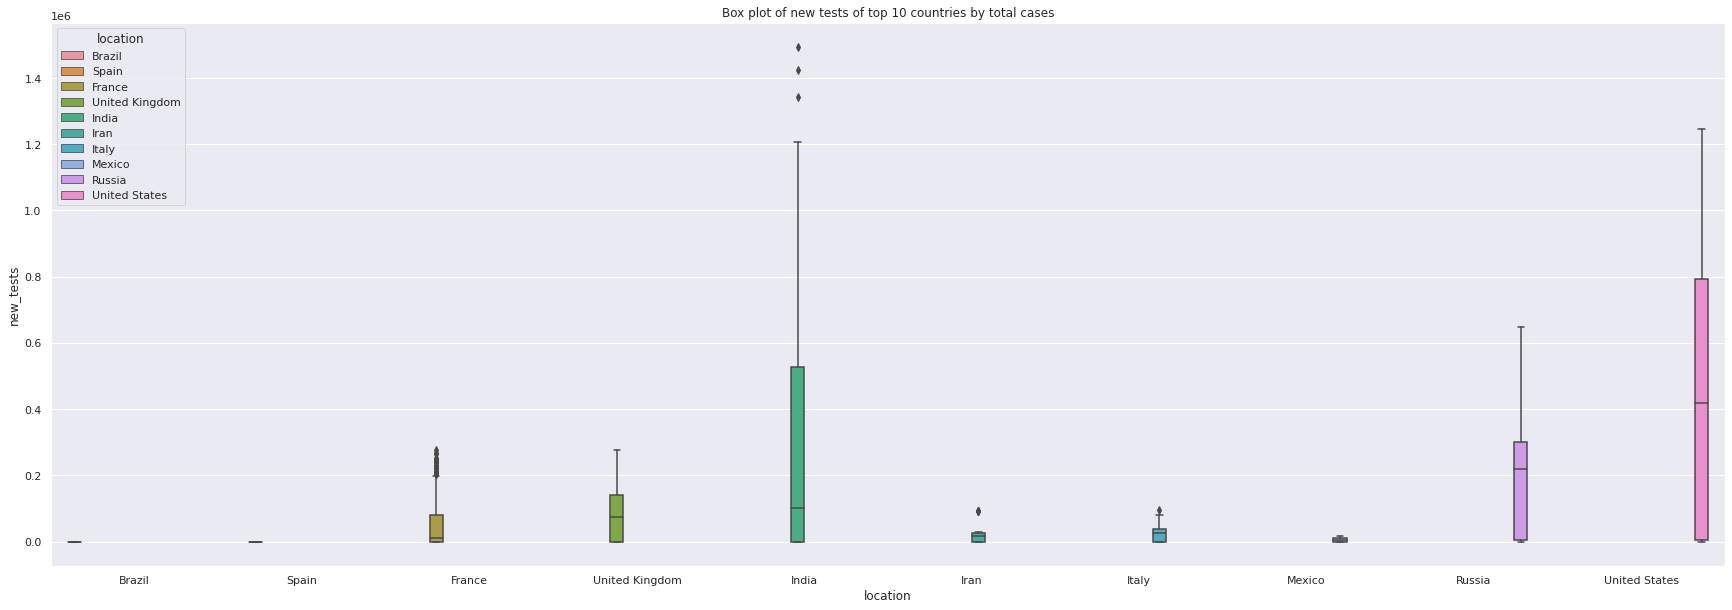

In [ ]:
sns.boxplot(x = "location", y = "new_tests", data = top_10_total, hue = 'location').set_title('Box plot of new tests of top 10 countries by total cases')
plt.show()

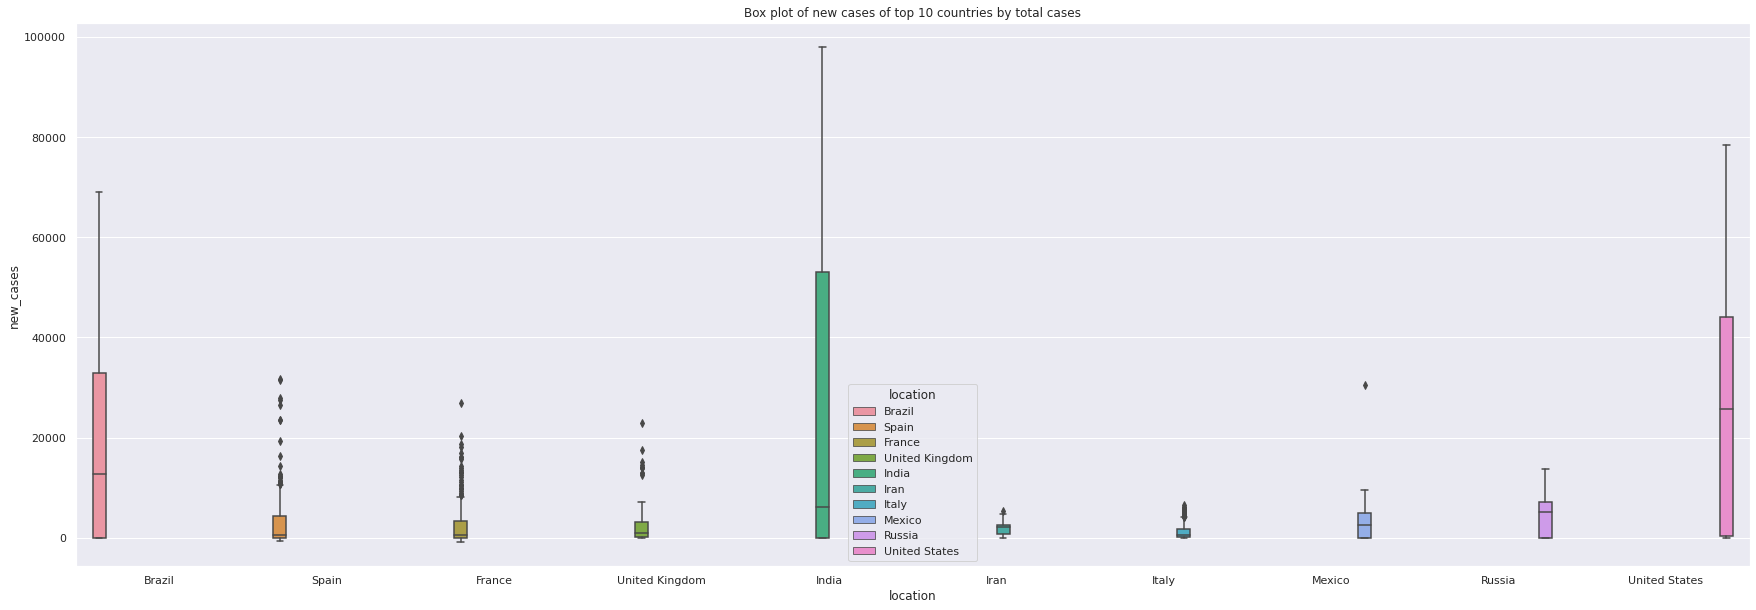

In [ ]:
sns.boxplot(x = "location", y = "new_cases", data = top_10_total, hue = 'location').set_title('Box plot of new cases of top 10 countries by total cases')
plt.show()

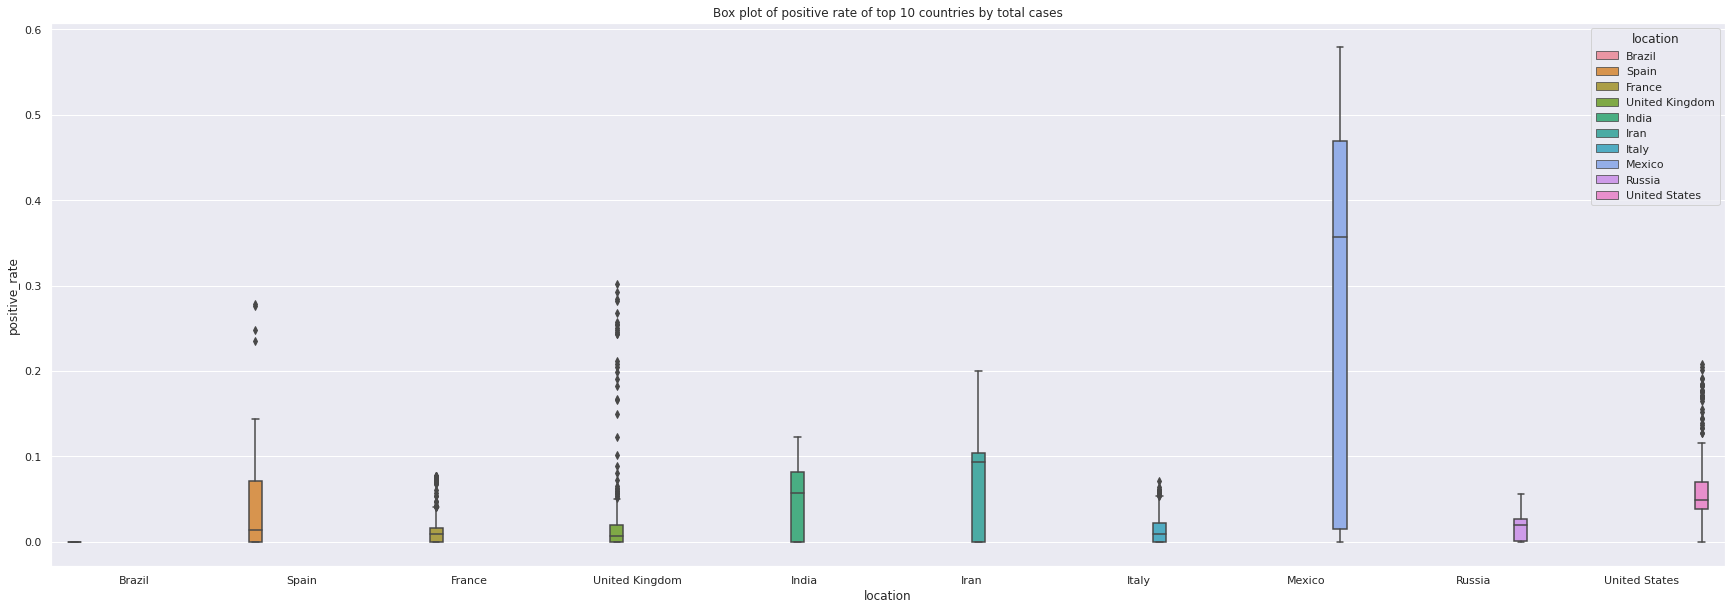

In [ ]:
sns.boxplot(x = "location", y = "positive_rate", data = top_10_total, hue = 'location').set_title('Box plot of positive rate of top 10 countries by total cases')
plt.show()

Text(0.5, 1.0, 'Box plot of new deaths of top 10 countries by total cases')

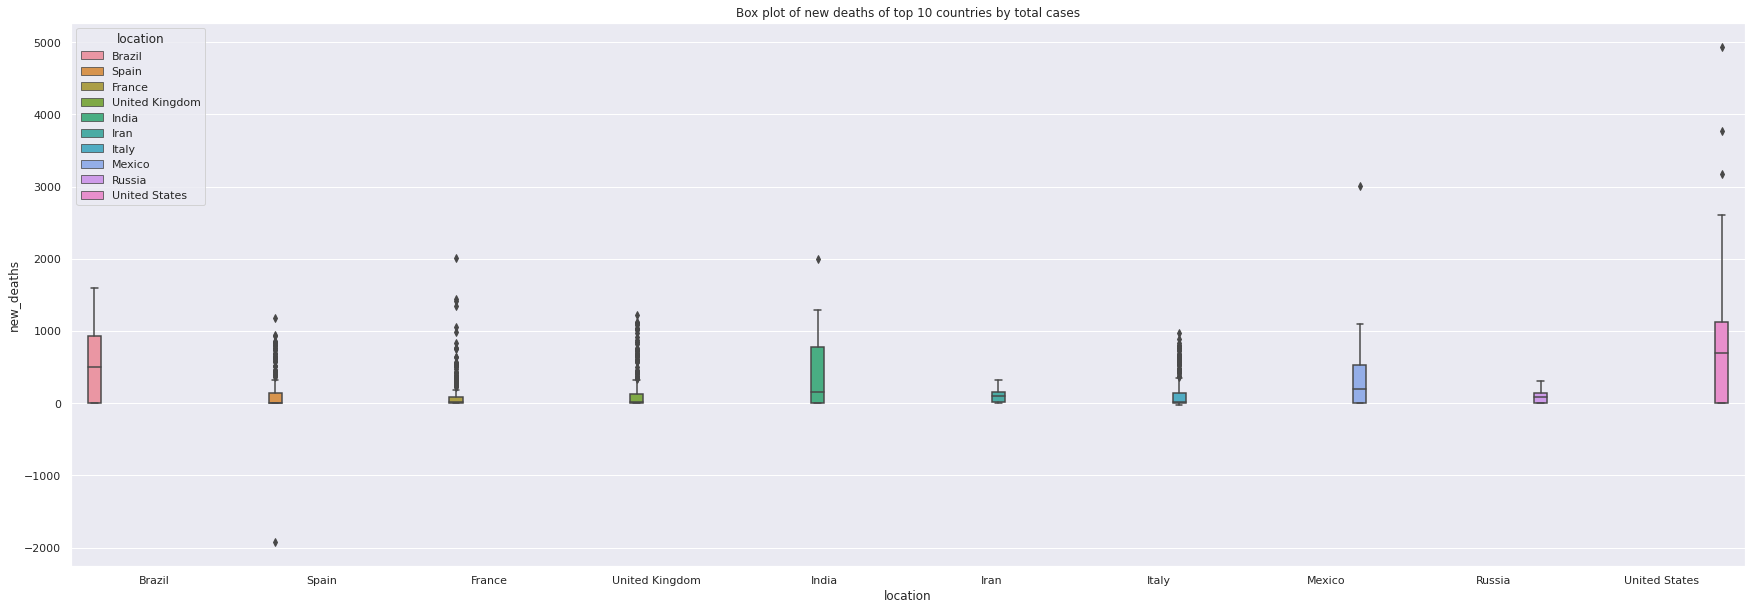

In [ ]:
sns.boxplot(x = "location", y = "new_deaths", data = top_10_total, hue = 'location').set_title('Box plot of new deaths of top 10 countries by total cases')


## **II. Mortality Rate**

In [ ]:
#all unique locations total_deaths / population by averaged of all days
new['mortality'] = new['total_deaths'] / new['population']
new[['total_deaths', 'population', 'mortality']].tail(5)

total_deaths    population  mortality
49585     1063243.0  7.794799e+09   0.000136
49586     1068963.0  7.794799e+09   0.000137
49587     1073683.0  7.794799e+09   0.000138
49588     1077720.0  7.794799e+09   0.000138
49589     1081632.0  7.794799e+09   0.000139

In [ ]:
mortality_data = new.groupby(['location'])[['mortality']].mean()
mortality_data = mortality_data.reset_index()

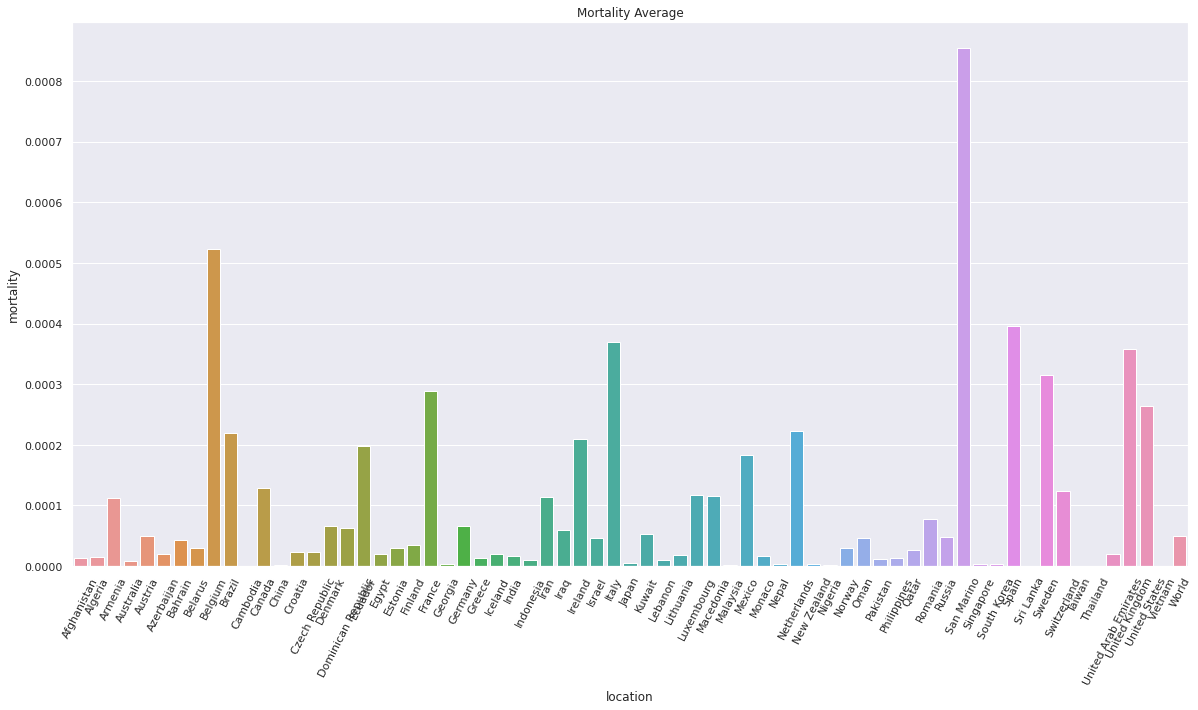

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x = 'location', y = 'mortality', data = mortality_data).set(title = 'Mortality Average')
plt.xticks(rotation = 63)
plt.show()

### Observation:

Based on the mortality rates, San Marino and Belgium has the highest rates. San Marino mortality rate is 0.00085 and Belgium's mortality rate is 0.00050. Both locations have quite a small population compared to United States, Brazil or India. 

In [ ]:
#Highest Mortality Rate Top 10
top_10 = mortality_data.sort_values('mortality', ascending = False).head(10)
top_10

location  mortality
53      San Marino   0.000854
8          Belgium   0.000523
56           Spain   0.000396
32           Italy   0.000370
63  United Kingdom   0.000357
58          Sweden   0.000316
21          France   0.000289
64   United States   0.000264
43     Netherlands   0.000223
9           Brazil   0.000219

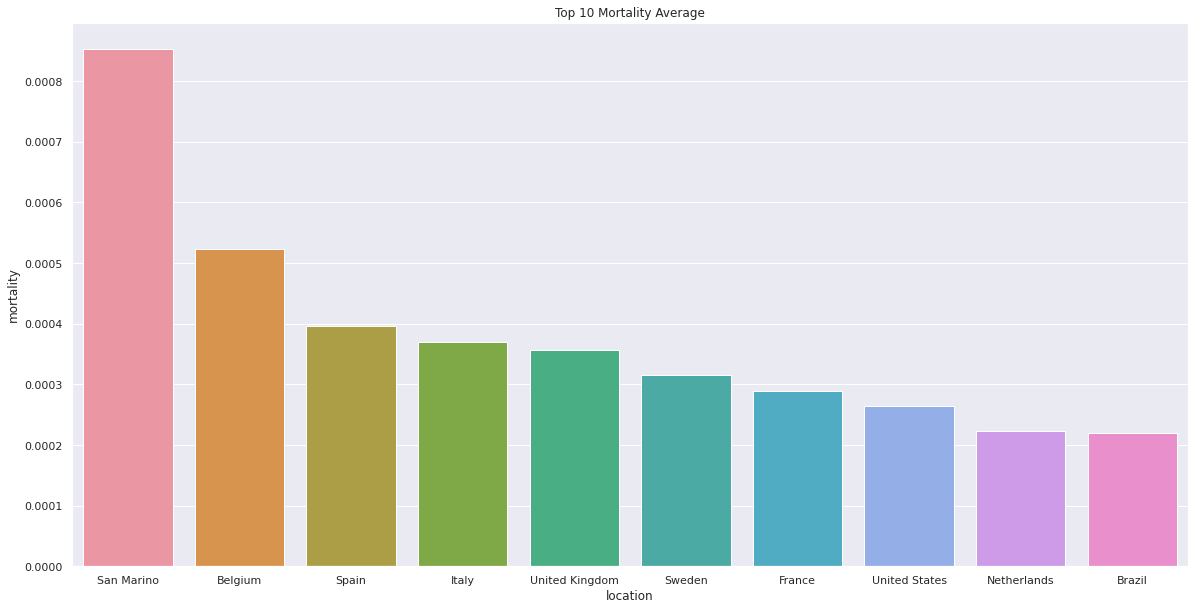

In [ ]:
sns.set_palette('Set2')
ax = sns.barplot(x = 'location', y = 'mortality', data = top_10).set(title = 'Top 10 Mortality Average')

### Observation:

Similar to above, this helps the viewer to easily visualize which locations has the highest mortality rates. After San Marino and Belgium, Italty and the United Kingdom are the locations with the highest mortality rate. 

In [ ]:
#Morality Rate Lowest 10 Countries
low_10 = mortality_data.sort_values('mortality', ascending = True).head(10)
low_10

location     mortality
10   Cambodia  0.000000e+00
65    Vietnam  7.519572e-08
60     Taiwan  2.013345e-07
57  Sri Lanka  3.291705e-07
61   Thailand  5.379956e-07
45    Nigeria  2.000364e-06
39   Malaysia  2.464113e-06
12      China  2.505288e-06
54  Singapore  2.684434e-06
42      Nepal  2.803346e-06

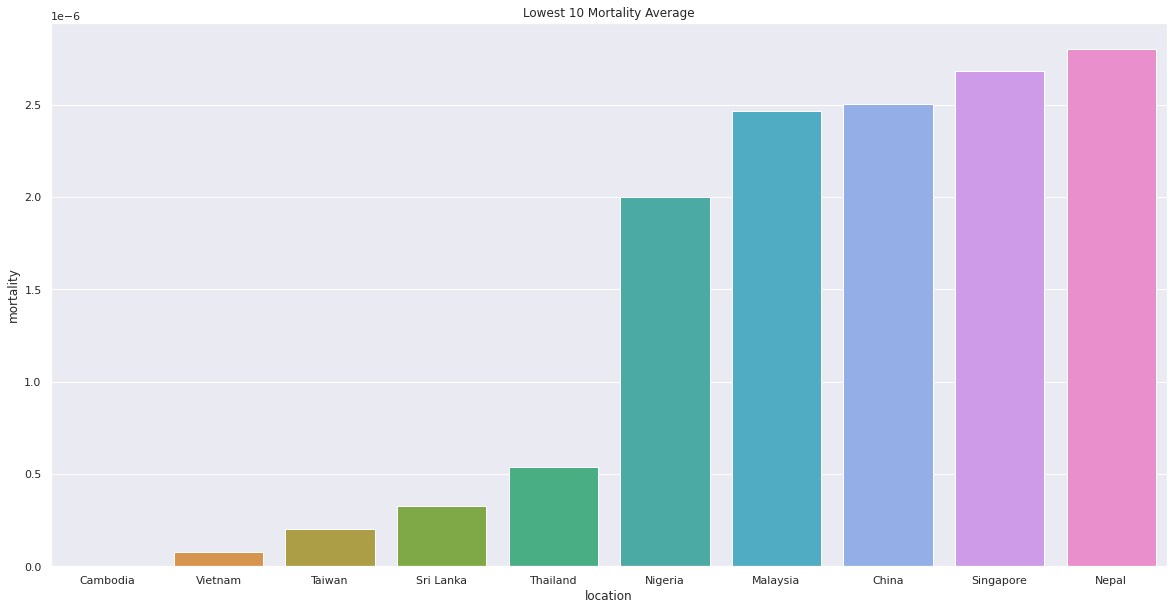

In [ ]:
ax = sns.barplot(x = 'location', y = 'mortality', data = low_10).set(title = 'Lowest 10 Mortality Average')

### Observation:

What is noticed about the smallest mortality rates is that most of these locations are in Asia. Is it because their previous experience with other pandemics such as Bird Flu?

In [ ]:
#Get 10 countries with highest mortality average
top_10_mortal = list(top_10.location.values)

#Retrive only those locations
top_10_day = new[new['location'].isin(top_10_mortal)]
top_10_day

iso_code      continent  ... human_development_index mortality
3434       BEL         Europe  ...                   0.916  0.000000
3435       BEL         Europe  ...                   0.916  0.000000
3436       BEL         Europe  ...                   0.916  0.000000
3437       BEL         Europe  ...                   0.916  0.000000
3438       BEL         Europe  ...                   0.916  0.000000
...        ...            ...  ...                     ...       ...
46686      USA  North America  ...                   0.924  0.000643
46687      USA  North America  ...                   0.924  0.000646
46688      USA  North America  ...                   0.924  0.000648
46689      USA  North America  ...                   0.924  0.000649
46690      USA  North America  ...                   0.924  0.000650

[2875 rows x 34 columns]

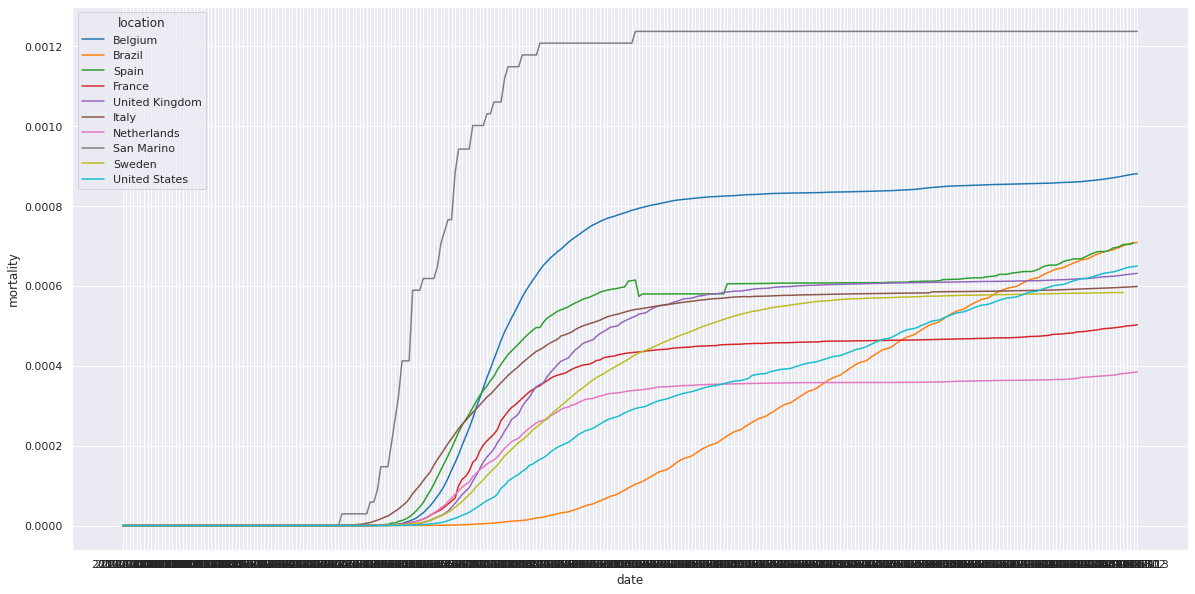

In [ ]:
#Line plot time series of top 10 of each day mortality rate
sns.set_palette('tab10')
ax = sns.lineplot(x = 'date', y = 'mortality', data = top_10_day, hue = 'location')

### Observation:

What is different compared to the barplot is that San Marino and Belgium may have high mortality rates but it does not seem like it is increasing. Brazil, United States, France seems to increase as days go by. 

In [ ]:
#Retrive increasing countries mortality rate

increase_top = ['Brazil', 'Spain', 'United States', 'France']
incr_top = new[new['location'].isin(increase_top)]
incr_top

iso_code      continent  ... human_development_index mortality
6417       BRA  South America  ...                   0.759  0.000000
6418       BRA  South America  ...                   0.759  0.000000
6419       BRA  South America  ...                   0.759  0.000000
6420       BRA  South America  ...                   0.759  0.000000
6421       BRA  South America  ...                   0.759  0.000000
...        ...            ...  ...                     ...       ...
46686      USA  North America  ...                   0.924  0.000643
46687      USA  North America  ...                   0.924  0.000646
46688      USA  North America  ...                   0.924  0.000648
46689      USA  North America  ...                   0.924  0.000649
46690      USA  North America  ...                   0.924  0.000650

[1151 rows x 34 columns]

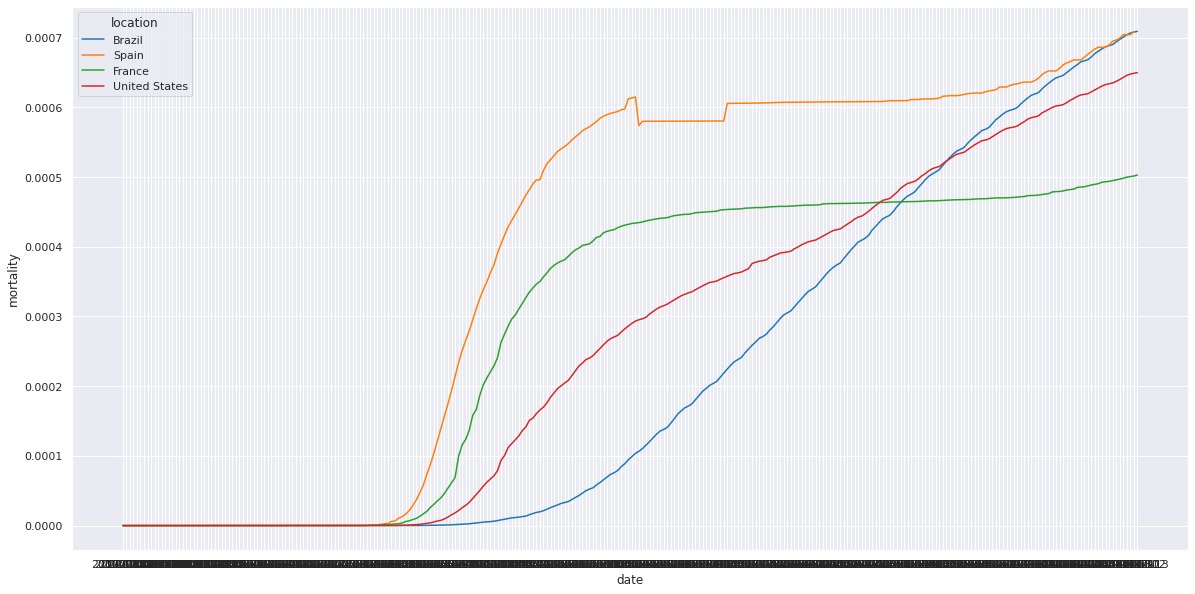

In [ ]:
#Output linegraph of increasing Countries Mortality Rates
ax = sns.lineplot(x = 'date', y = 'mortality', data = incr_top, hue = 'location')
plt.show()

### Observation:

Ecuador has the biggest jump in mortality rates. Brazil and the United States seem to increase linear. France on the other hand seemed to plateau but has recently experienced an increase in deaths. 

#### Box plots for top 10 countries by mortality rate

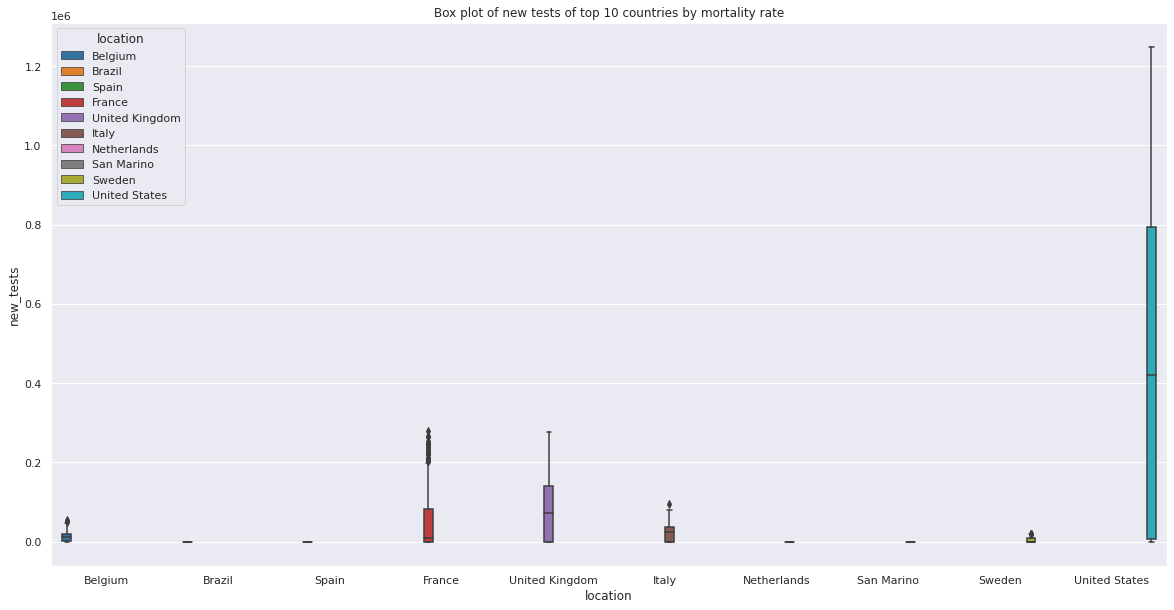

In [ ]:
sns.boxplot(x = "location", y = "new_tests", data = top_10_day, hue = 'location').set_title('Box plot of new tests of top 10 countries by mortality rate')
plt.show()

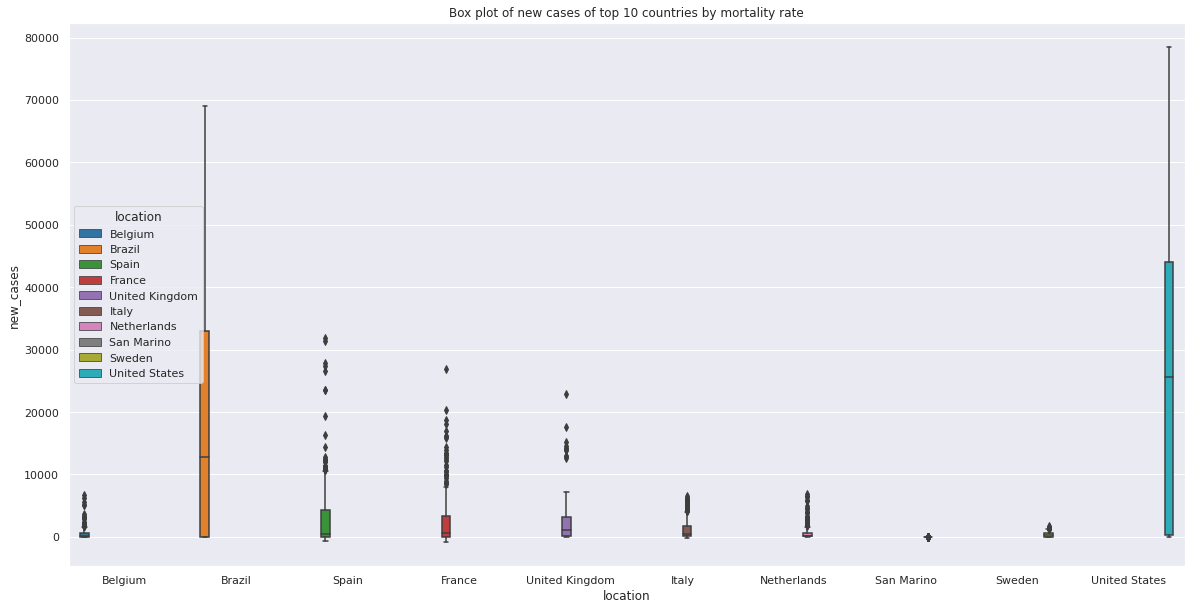

In [ ]:
sns.boxplot(x = "location", y = "new_cases", data = top_10_day, hue = 'location').set_title('Box plot of new cases of top 10 countries by mortality rate')
plt.show()

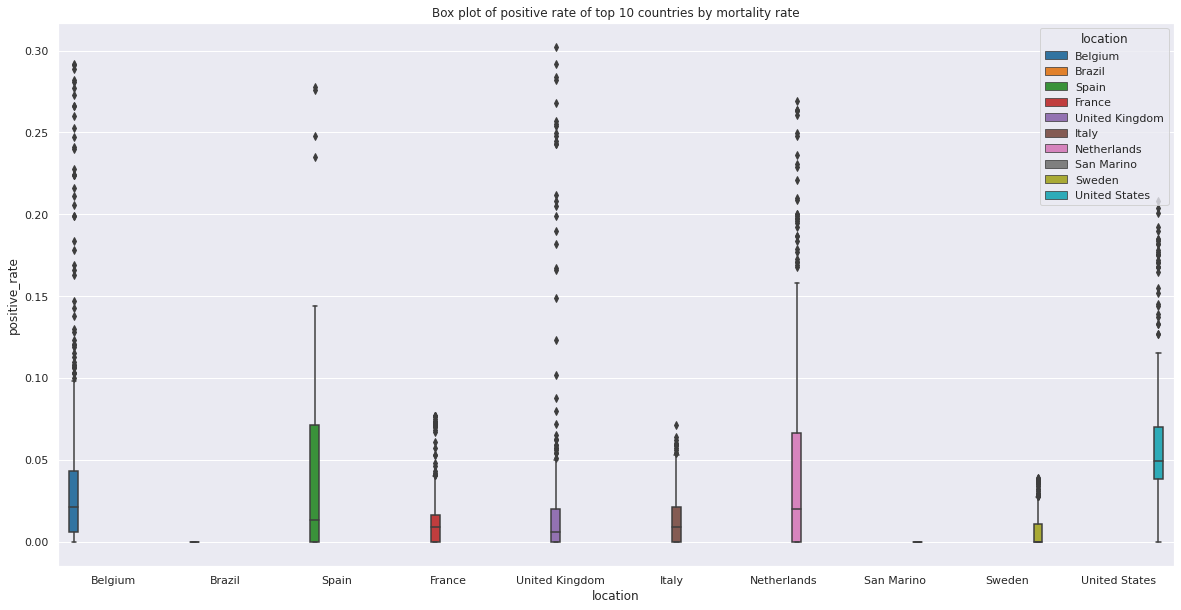

In [ ]:
sns.boxplot(x = "location", y = "positive_rate", data = top_10_day, hue = 'location').set_title('Box plot of positive rate of top 10 countries by mortality rate')
plt.show()

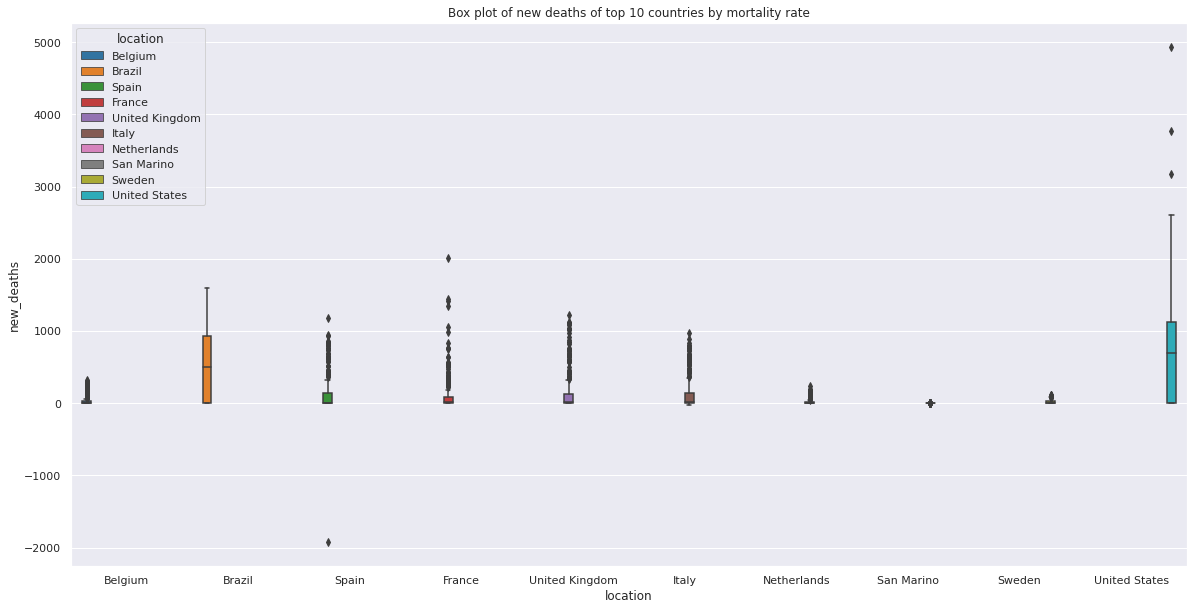

In [ ]:
sns.boxplot(x = "location", y = "new_deaths", data = top_10_day, hue = 'location').set_title('Box plot of new deaths of top 10 countries by mortality rate')
plt.show()

### **III. Case Fatality Rate**

In [ ]:
#all unique locations total_deaths / total cases by averaged of all days
new['fatality_cases'] = new['total_deaths'] / new['total_cases']

In [ ]:
case_fatality = new.groupby(['location'])[['fatality_cases']].mean()
case_fatality = case_fatality.reset_index()
case_fatality = case_fatality[case_fatality['location'] != 'World']
case_fatality.sort_values(['fatality_cases'], axis = 0, inplace = True, ascending = False)

In [ ]:
top10_fatality = case_fatality.iloc[:10]
top10_fatality

location  fatality_cases
21          France        0.117879
32           Italy        0.112046
8          Belgium        0.105586
63  United Kingdom        0.103196
43     Netherlands        0.093016
40          Mexico        0.089869
49     Philippines        0.081214
56           Spain        0.073114
58          Sweden        0.072591
53      San Marino        0.067583

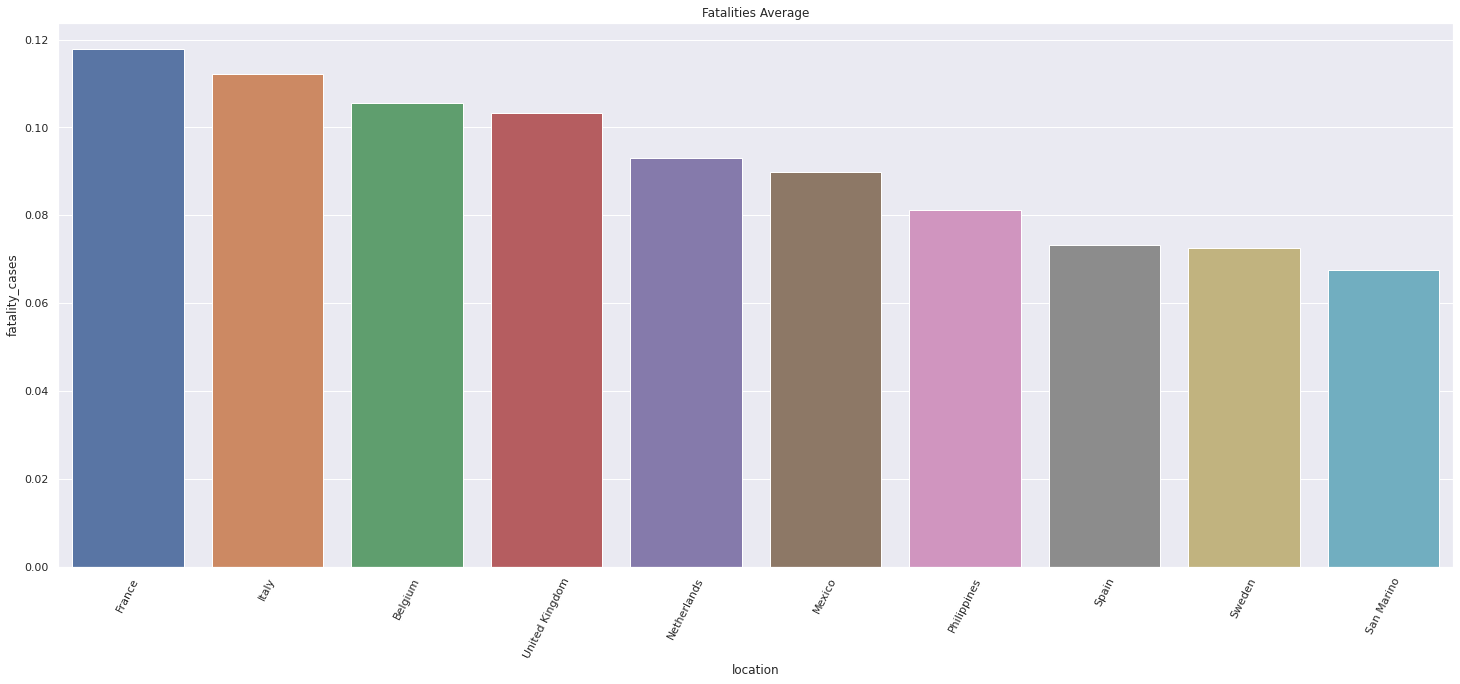

In [ ]:
sns.set(rc={'figure.figsize':(25,10)})
ax = sns.barplot(x = 'location', y = 'fatality_cases', data = top10_fatality).set(title = 'Fatalities Average')
plt.xticks(rotation = 63)
plt.show()

In [ ]:
#Get 10 countries with highest fatality average
top_10_fatality = list(top10_fatality['location'].values)

#Retrive only those locations
top_10_day_fatality = new[new['location'].isin(top_10_fatality)].copy()

In [ ]:
top_10_day_fatality.fillna(0, inplace = True)
top_10_day_fatality['fatality_cases'] = pd.to_numeric(top_10_day_fatality["fatality_cases"])
top_10_day_fatality.reset_index(inplace=True, drop = True)

In [ ]:
top_10_day_fatality

iso_code continent  ... mortality fatality_cases
0         BEL    Europe  ...  0.000000       0.000000
1         BEL    Europe  ...  0.000000       0.000000
2         BEL    Europe  ...  0.000000       0.000000
3         BEL    Europe  ...  0.000000       0.000000
4         BEL    Europe  ...  0.000000       0.000000
...       ...       ...  ...       ...            ...
2870      SWE    Europe  ...  0.000583       0.061491
2871      SWE    Europe  ...  0.000584       0.061272
2872      SWE    Europe  ...  0.000584       0.060786
2873      SWE    Europe  ...  0.000584       0.060270
2874      SWE    Europe  ...  0.000584       0.059867

[2875 rows x 35 columns]

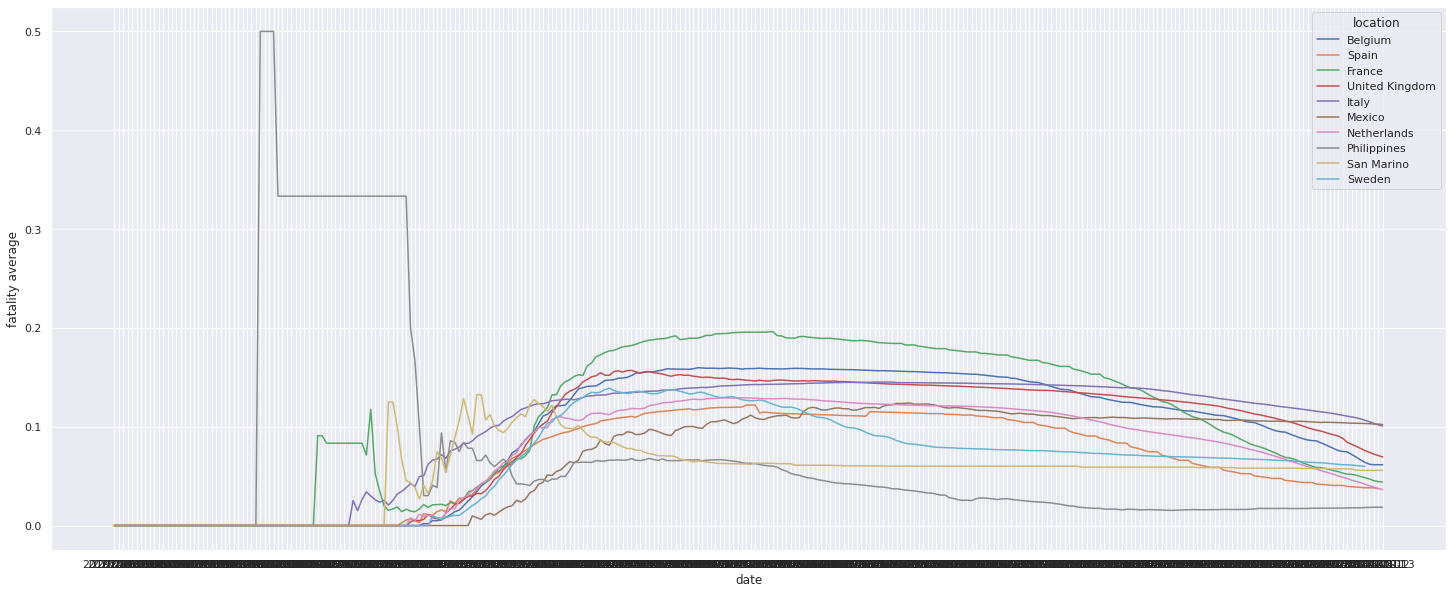

In [ ]:
#Line plot time series of top 10 of each day fatality case rate
ax = sns.lineplot(x = 'date', y = 'fatality_cases', data = top_10_day_fatality, hue = 'location')
ax.set(ylabel='fatality average')
plt.show()

In [ ]:
bottom10_fatality = case_fatality.iloc[-10:-1]
bottom10_fatality

location  fatality_cases
57             Sri Lanka        0.006336
34                Kuwait        0.005283
62  United Arab Emirates        0.005104
47                  Oman        0.005063
25               Iceland        0.004375
6                Bahrain        0.003124
42                 Nepal        0.002405
50                 Qatar        0.001216
54             Singapore        0.000807

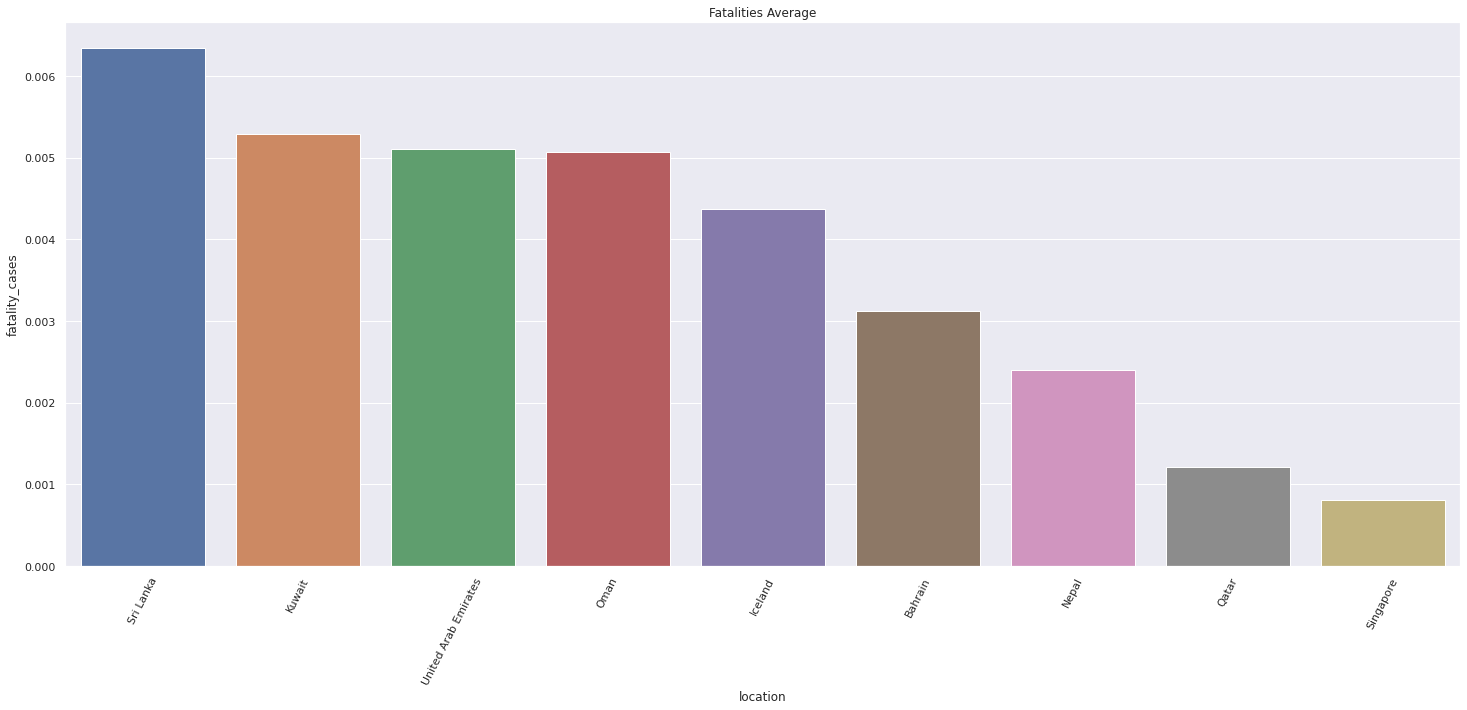

In [ ]:
sns.set(rc={'figure.figsize':(25,10)})
ax = sns.barplot(x = 'location', y = 'fatality_cases', data = bottom10_fatality).set(title = 'Fatalities Average')
plt.xticks(rotation = 63)
plt.show()

In [ ]:
#Get 10 countries with highest fatality average
bottom_10_fatality = list(bottom10_fatality['location'].values)

#Retrive only those locations
bottom_10_fatality = new[new['location'].isin(bottom_10_fatality)].copy()

In [ ]:
bottom_10_fatality.fillna(0, inplace = True)
bottom_10_fatality['fatality_cases'] = pd.to_numeric(bottom_10_fatality["fatality_cases"])
bottom_10_fatality.reset_index(inplace=True, drop = True)

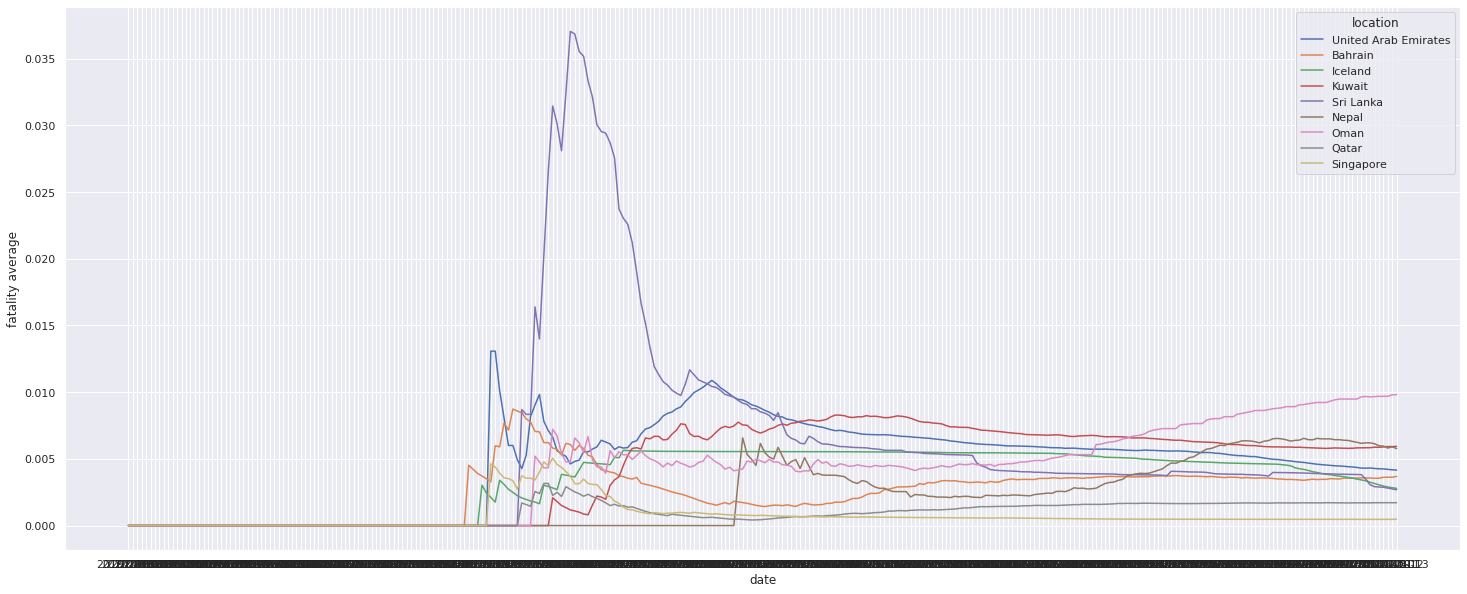

In [ ]:
#Line plot time series of bottom 10 of each day fatality case rate
ax = sns.lineplot(x = 'date', y = 'fatality_cases', data = bottom_10_fatality, hue = 'location')
ax.set(ylabel='fatality average')
plt.show()

### Observations:

France and Italy have a high average case fatality rate since most of the infections in those countries happened early in the pandemic before there was an understanding of how to treat the disease and the hospitals became overwhelmed with patients.

### **IV. Age Analysis**

In [ ]:
#Group by Age Groups
by_age = US_data.groupby('Age group').mean('Pneumonia and COVID-19 Deaths')
by_age = by_age.reset_index()

#Dropped All Ages Row
by_age = by_age[by_age['Age group'] != 'All Ages']
by_age

Age group  ...  Pneumonia, Influenza, or COVID-19 Deaths
0          0-17 years  ...                                 16.839506
1           1-4 years  ...                                  2.538462
2         15-24 years  ...                                 21.690722
3         18-29 years  ...                                 46.089286
4         25-34 years  ...                                 63.424242
5         30-49 years  ...                                287.370130
6         35-44 years  ...                                141.992806
7         45-54 years  ...                                335.384106
8          5-14 years  ...                                  4.440860
9         50-64 years  ...                               1003.371069
10        55-64 years  ...                                800.087500
11        65-74 years  ...                               1333.382716
12        75-84 years  ...                               1659.136646
13  85 years and over  ...                               1909.656250
15       Under 1 year  ...                                  3.316327

[15 rows x 7 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

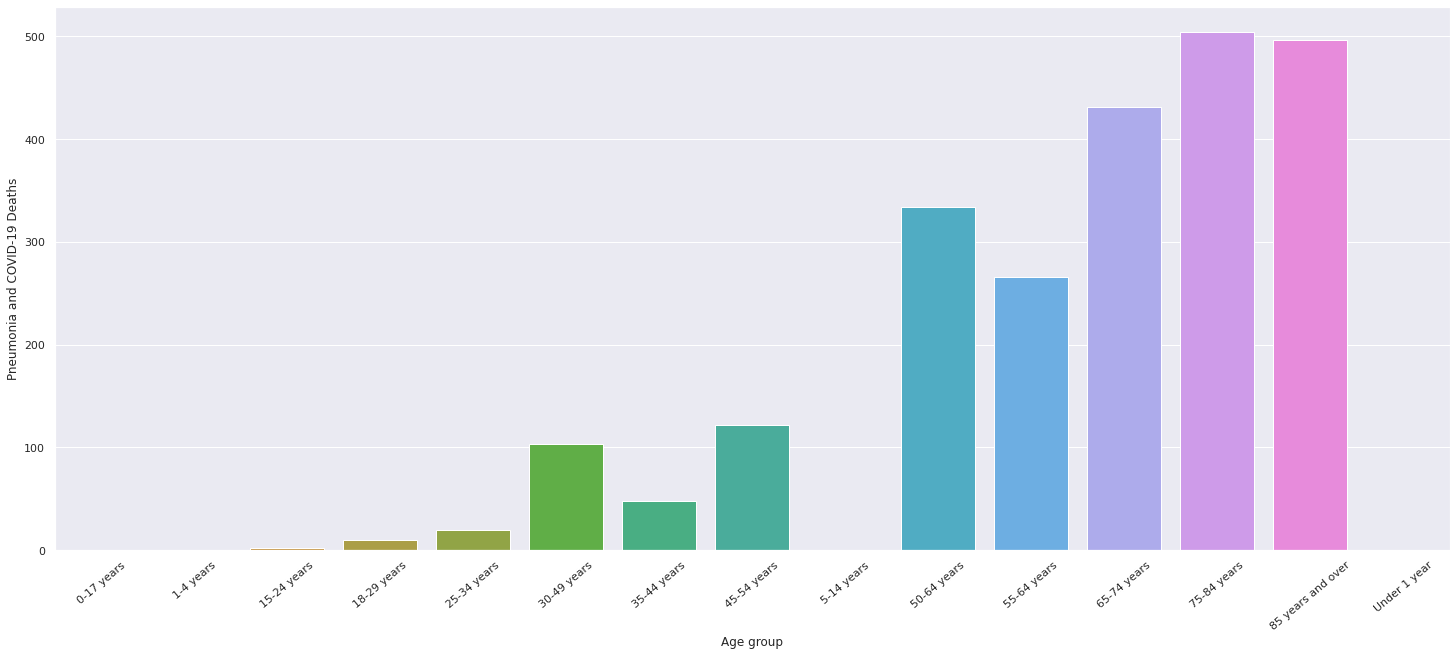

In [ ]:
ax = sns.barplot(x = 'Age group', y = 'Pneumonia and COVID-19 Deaths', data = by_age)
plt.xticks(rotation = 40)

### Observation:
Those in their 50s and older are the ones that are higher risk of dying from Pneumonia and/or Covid-19. Those that are younger than 50 have the lowest risk in dying from these two diseases.

In [ ]:
#Group by States
all_states = US_data.groupby('State').mean('Pneumonia and COVID-19 Deaths')
all_states = all_states.reset_index()

#Remove United States as Row
all_states = all_states[all_states['State'] != 'United States']

#Sort by Descending Value
all_states = all_states.sort_values('Pneumonia and COVID-19 Deaths', ascending = False)
all_states

State  ...  Pneumonia, Influenza, or COVID-19 Deaths
45                 Texas  ...                               2021.909091
4             California  ...                               2129.111111
9                Florida  ...                               1874.255814
33         New York City  ...                               2087.631579
30            New Jersey  ...                               1432.400000
32              New York  ...                               1353.195122
13              Illinois  ...                                991.880952
22              Michigan  ...                                888.289474
39          Pennsylvania  ...                               1063.925000
10               Georgia  ...                                738.534884
21         Massachusetts  ...                                814.880952
2                Arizona  ...                                598.651163
18             Louisiana  ...                                520.073171
36                  Ohio  ...                                699.634146
24           Mississippi  ...                                387.600000
20              Maryland  ...                                533.804878
14               Indiana  ...                                562.350000
42        South Carolina  ...                                450.975000
44             Tennessee  ...                                498.119048
49              Virginia  ...                                513.657143
28                Nevada  ...                                219.195122
0                Alabama  ...                                459.658537
34        North Carolina  ...                                497.666667
50            Washington  ...                                356.394737
5               Colorado  ...                                297.128205
6            Connecticut  ...                                467.756757
25              Missouri  ...                                411.384615
8   District of Columbia  ...                                 97.027778
17              Kentucky  ...                                316.024390
3               Arkansas  ...                                237.950000
23             Minnesota  ...                                350.000000
37              Oklahoma  ...                                287.225000
15                  Iowa  ...                                245.666667
40           Puerto Rico  ...                                218.547619
41          Rhode Island  ...                                122.054054
16                Kansas  ...                                161.743590
52             Wisconsin  ...                                260.560976
31            New Mexico  ...                                123.634146
7               Delaware  ...                                 73.947368
27              Nebraska  ...                                109.131579
47                  Utah  ...                                103.948718
12                 Idaho  ...                                 75.925000
38                Oregon  ...                                138.948718
43          South Dakota  ...                                 61.837838
35          North Dakota  ...                                 55.175000
29         New Hampshire  ...                                 68.560976
11                Hawaii  ...                                 64.117647
51         West Virginia  ...                                111.891892
26               Montana  ...                                 42.044444
19                 Maine  ...                                 63.560976
1                 Alaska  ...                                 13.702703
53               Wyoming  ...                                 19.125000
48               Vermont  ...                                 20.342105

[53 rows x 7 columns]

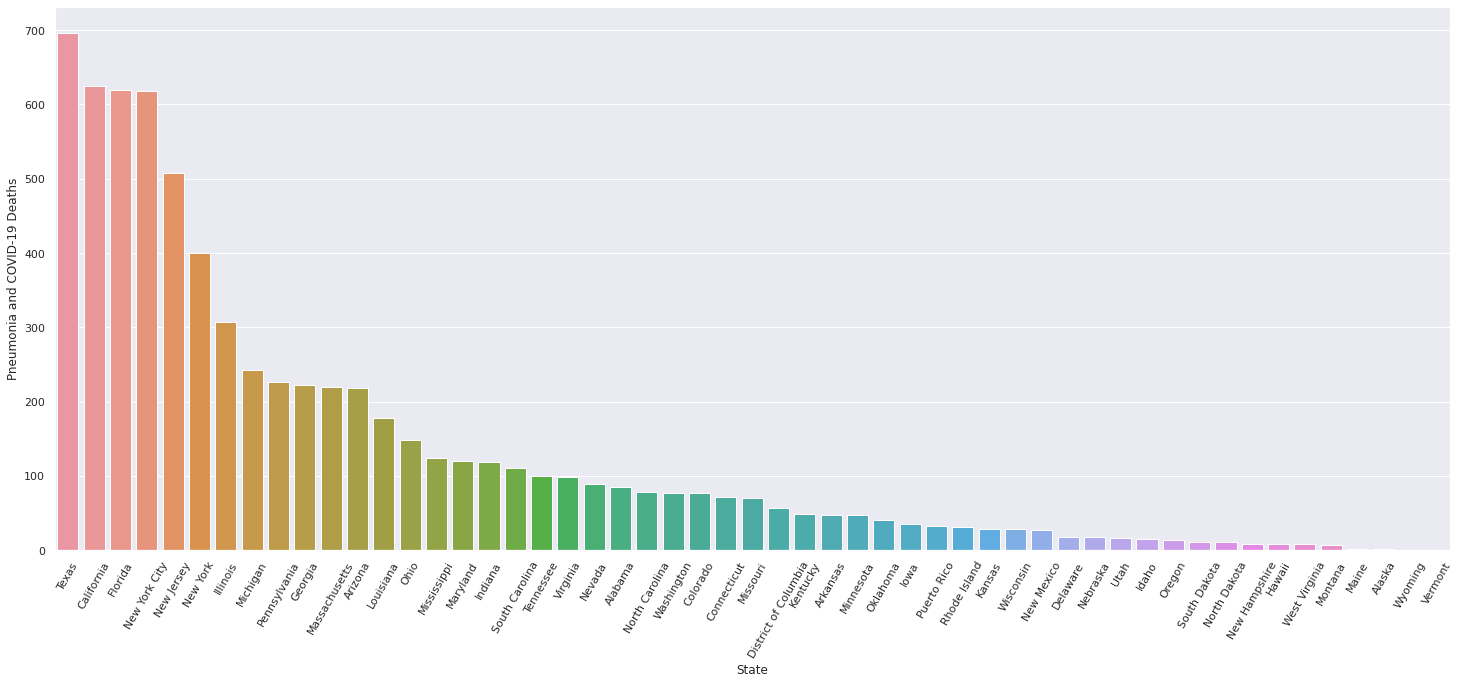

In [ ]:
ax = sns.barplot(x = 'State', y = 'Pneumonia and COVID-19 Deaths', data = all_states)
plt.xticks(rotation = 60)
plt.show()

### Observation:
Texas, California, Florida, New York and New Jersey are the five states with the most pneumonia and/or Covid-19 related deaths. Interestingly, New York City is separated into a different row but New York assuming it does not count NYC is still high in deaths. Vermont, Wyoming, Alaska, Maine and Montana have the least amount of deaths related to pneumonia and/or covid-19. 

### **V. Gender Analysis**

In [ ]:
#Output only Sex with Male and Female
all_gender1 = US_data[(US_data['Sex'] == 'Male') | (US_data['Sex'] == 'Female')]
all_gender1

State  ... Pneumonia, Influenza, or COVID-19 Deaths
16    United States  ...                                 178933.0
17    United States  ...                                     92.0
18    United States  ...                                    309.0
19    United States  ...                                     69.0
20    United States  ...                                     98.0
...             ...  ...                                      ...
2640    Puerto Rico  ...                                    152.0
2641    Puerto Rico  ...                                    118.0
2642    Puerto Rico  ...                                    220.0
2643    Puerto Rico  ...                                    393.0
2644    Puerto Rico  ...                                    518.0

[1728 rows x 9 columns]

In [ ]:
#Group by Male and Female
all_gender = all_gender1.groupby('Sex').mean('Pneumonia and COVID-19 Deaths')
all_gender = all_gender.reset_index()
all_gender

Sex  ...  Pneumonia, Influenza, or COVID-19 Deaths
0  Female  ...                               1090.563725
1    Male  ...                               1248.304954

[2 rows x 7 columns]

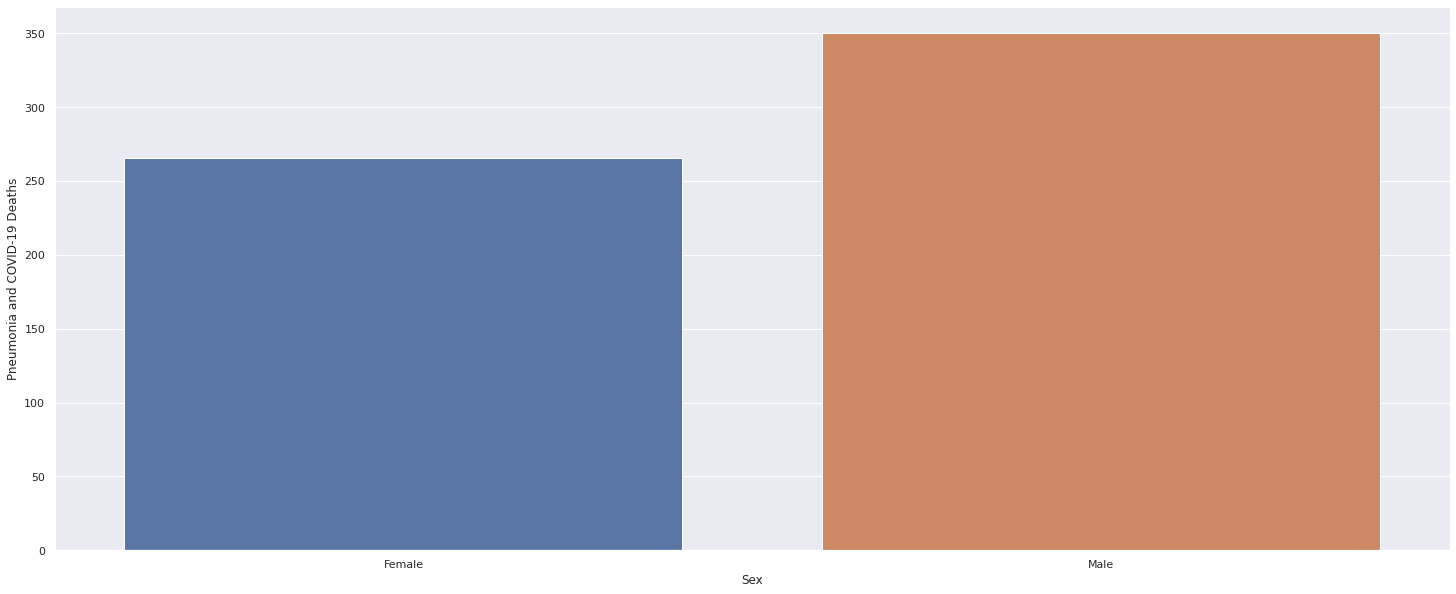

In [ ]:
ax = sns.barplot(x = 'Sex', y = 'Pneumonia and COVID-19 Deaths', data = all_gender)

### Observation:
From the barplot, males have a higher risk of dying from pneumonia and/or covid-19. Compared to 10 males, there may be 7 females that die from these diseases.

In [ ]:
#Group by Sex and Age Group
age_gender = all_gender1.groupby(['Sex', 'Age group']).mean('Pneumonia and COVID-19 Deaths')
age_gender = age_gender.reset_index()

#Remove All Ages as Rows
age_gender = age_gender[age_gender['Age group'] != 'All Ages']
age_gender

Sex  ... Pneumonia, Influenza, or COVID-19 Deaths
0   Female  ...                                26.615385
1   Female  ...                                 2.863636
2   Female  ...                                26.368421
3   Female  ...                                50.375000
4   Female  ...                                56.305556
5   Female  ...                               223.851064
6   Female  ...                               120.102564
7   Female  ...                               257.276596
8   Female  ...                                 5.833333
9   Female  ...                               755.075472
10  Female  ...                               610.830189
11  Female  ...                              1060.851852
12  Female  ...                              1480.018519
13  Female  ...                              2190.259259
15  Female  ...                                 2.560000
16    Male  ...                                35.076923
17    Male  ...                                 2.555556
18    Male  ...                                35.217391
19    Male  ...                                65.333333
20    Male  ...                                85.609756
21    Male  ...                               365.538462
22    Male  ...                               187.933333
23    Male  ...                               425.333333
24    Male  ...                                 5.750000
25    Male  ...                              1230.796296
26    Male  ...                              1001.226415
27    Male  ...                              1609.518519
28    Male  ...                              1823.055556
29    Male  ...                              1587.370370
31    Male  ...                                 5.833333

[30 rows x 8 columns]

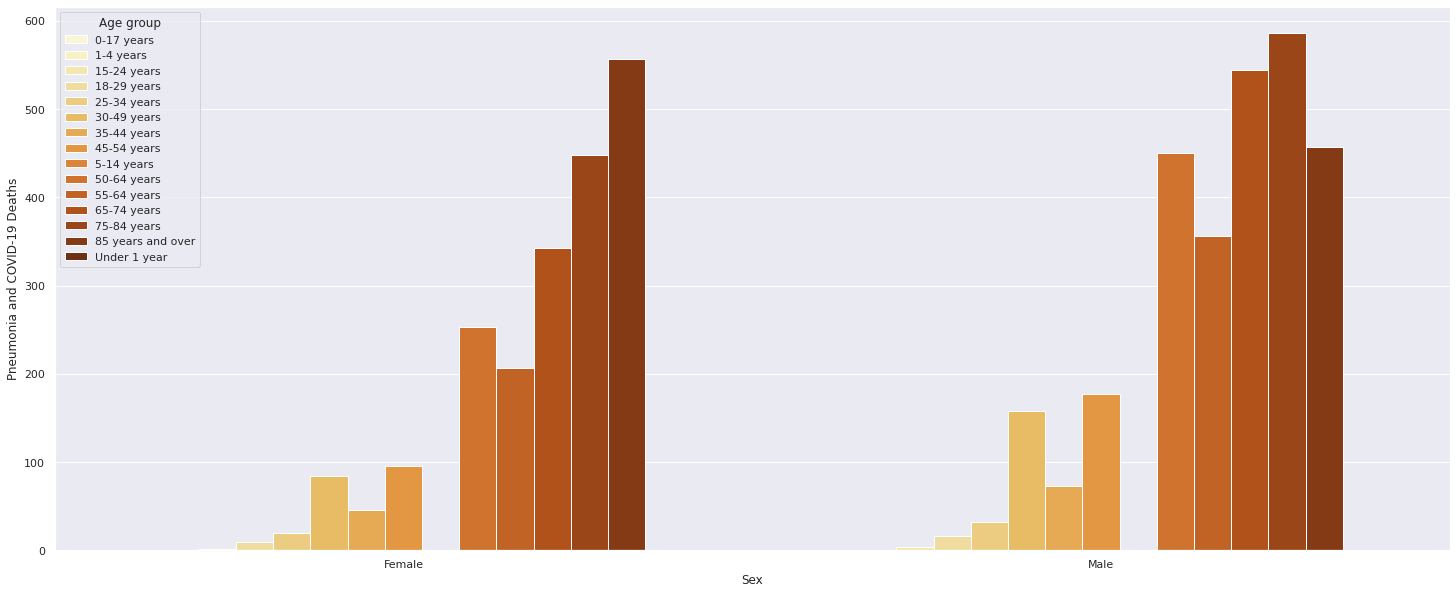

In [ ]:
sns.set_palette('YlOrBr',15)
ax = sns.barplot(x = 'Sex', y = 'Pneumonia and COVID-19 Deaths', hue = 'Age group', data = age_gender)

### Observation:
Interestingly, females that are 85 years and older have more deaths than males that are 85 years and older. Males that are 75-84 years are more than females 75-84 years old. One hypothesis that may explain why is that females tend to live longer than males. If there are more females that are 85 and older living than males then it could explain why the numbers of death are higher than males 85 years and over. 

## **Feature engineering and analysis**

In [ ]:
new.corr(method = 'spearman')

total_cases  new_cases  ...  mortality  fatality_cases
total_cases                    1.000000   0.864529  ...   0.840072        0.548282
new_cases                      0.864529   1.000000  ...   0.683329        0.403934
total_deaths                   0.957614   0.824542  ...   0.879106        0.752531
new_deaths                     0.762703   0.849216  ...   0.620440        0.526910
total_cases_per_million        0.818888   0.671837  ...   0.926751        0.363518
new_cases_per_million          0.736105   0.873462  ...   0.729868        0.223549
total_deaths_per_million       0.840021   0.683278  ...   0.999941        0.682527
new_deaths_per_million         0.709663   0.794053  ...   0.668072        0.455082
new_tests                      0.536394   0.478247  ...   0.476929        0.166258
total_tests                    0.655908   0.550923  ...   0.563922        0.224872
total_tests_per_thousand       0.559942   0.446665  ...   0.573179        0.131337
new_tests_per_thousand         0.455783   0.386833  ...   0.500847        0.074724
tests_per_case                 0.375327   0.220511  ...   0.368724        0.078140
positive_rate                  0.576411   0.594774  ...   0.481344        0.129259
population                     0.307533   0.313816  ...  -0.041037        0.247030
population_density            -0.010165  -0.012350  ...  -0.036575       -0.077555
median_age                     0.010414  -0.051930  ...   0.166518        0.165249
aged_65_older                  0.017094  -0.032278  ...   0.202956        0.286249
aged_70_older                  0.018163  -0.030972  ...   0.206768        0.284870
gdp_per_capita                 0.053010   0.011852  ...   0.238152        0.040666
extreme_poverty                0.071478   0.158086  ...  -0.056691        0.081768
cardiovasc_death_rate         -0.057961   0.008713  ...  -0.144445       -0.104938
diabetes_prevalence            0.111963   0.149956  ...  -0.085951       -0.181028
female_smokers                 0.035046   0.029688  ...   0.244181        0.277302
male_smokers                  -0.068595  -0.064313  ...  -0.161250       -0.134210
handwashing_facilities        -0.057812  -0.084709  ...   0.078991        0.028986
hospital_beds_per_thousand    -0.049599  -0.094372  ...   0.106871        0.069196
life_expectancy               -0.022537  -0.100258  ...   0.192524        0.115150
human_development_index        0.055151   0.007425  ...   0.234580        0.105861
mortality                      0.840072   0.683329  ...   1.000000        0.682720
fatality_cases                 0.548282   0.403934  ...   0.682720        1.000000

[31 rows x 31 columns]

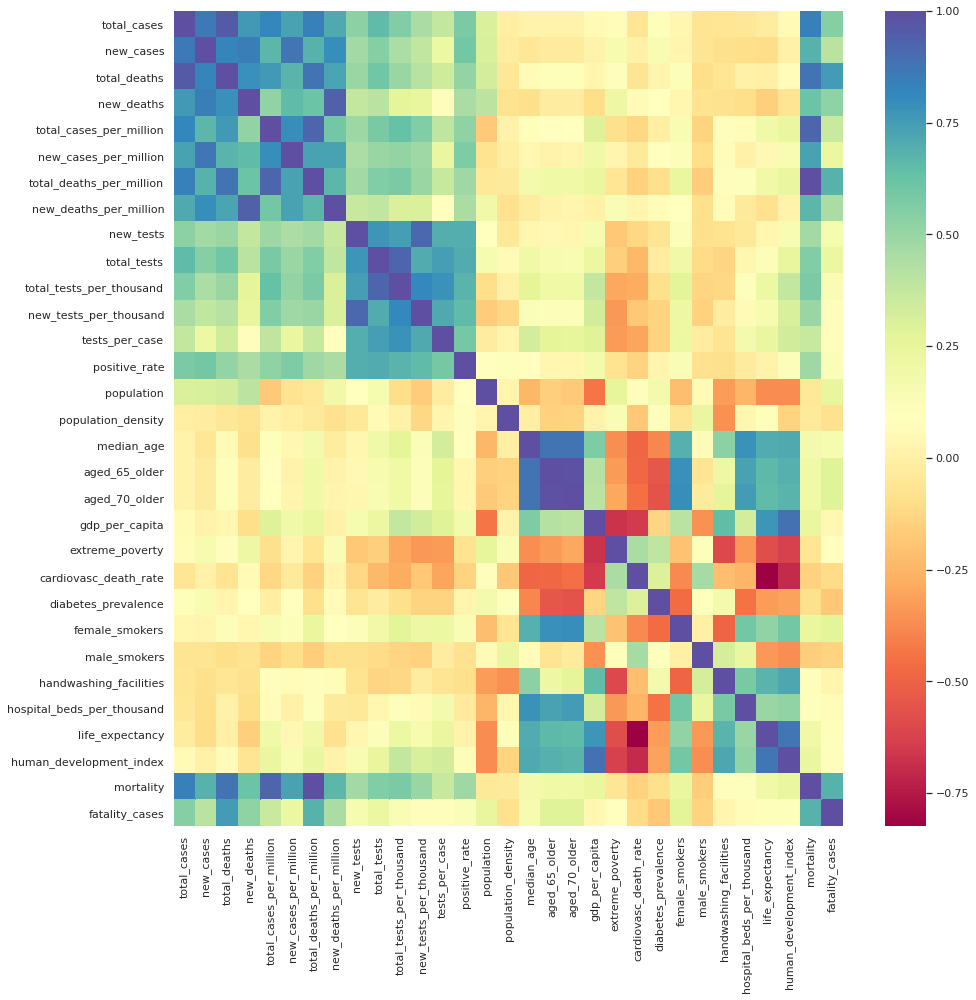

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(new.corr(method = 'spearman'), cmap = "Spectral")

In [ ]:
new.corr(method = 'kendall')

total_cases  new_cases  ...  mortality  fatality_cases
total_cases                    1.000000   0.707412  ...   0.668789        0.388497
new_cases                      0.707412   1.000000  ...   0.520180        0.278173
total_deaths                   0.842070   0.660671  ...   0.728202        0.572485
new_deaths                     0.609730   0.713373  ...   0.482751        0.392073
total_cases_per_million        0.659840   0.510489  ...   0.785811        0.252116
new_cases_per_million          0.556514   0.713145  ...   0.567803        0.148408
total_deaths_per_million       0.668660   0.520141  ...   0.999838        0.509520
new_deaths_per_million         0.536163   0.623679  ...   0.536550        0.332204
new_tests                      0.443669   0.386826  ...   0.374779        0.124145
total_tests                    0.547479   0.432746  ...   0.447181        0.163596
total_tests_per_thousand       0.427582   0.327866  ...   0.453126        0.090876
new_tests_per_thousand         0.346357   0.290339  ...   0.395416        0.050332
tests_per_case                 0.242473   0.117526  ...   0.261700        0.055496
positive_rate                  0.440252   0.481050  ...   0.360999        0.090276
population                     0.220577   0.230269  ...  -0.025123        0.163472
population_density            -0.005874  -0.006933  ...  -0.023320       -0.051082
median_age                     0.008338  -0.032496  ...   0.113836        0.113125
aged_65_older                  0.012353  -0.018457  ...   0.141295        0.196921
aged_70_older                  0.014324  -0.016917  ...   0.144042        0.197558
gdp_per_capita                 0.035573   0.007364  ...   0.167323        0.023255
extreme_poverty                0.051771   0.114534  ...  -0.042121        0.053770
cardiovasc_death_rate         -0.039339   0.006543  ...  -0.103425       -0.074093
diabetes_prevalence            0.073644   0.100989  ...  -0.061926       -0.124588
female_smokers                 0.022470   0.019486  ...   0.170933        0.192054
male_smokers                  -0.047716  -0.045521  ...  -0.110988       -0.084509
handwashing_facilities        -0.037867  -0.056953  ...   0.054104        0.029554
hospital_beds_per_thousand    -0.031457  -0.063294  ...   0.072148        0.042595
life_expectancy               -0.013610  -0.070205  ...   0.136331        0.078189
human_development_index        0.037123   0.003682  ...   0.162512        0.065960
mortality                      0.668789   0.520180  ...   1.000000        0.509639
fatality_cases                 0.388497   0.278173  ...   0.509639        1.000000

[31 rows x 31 columns]

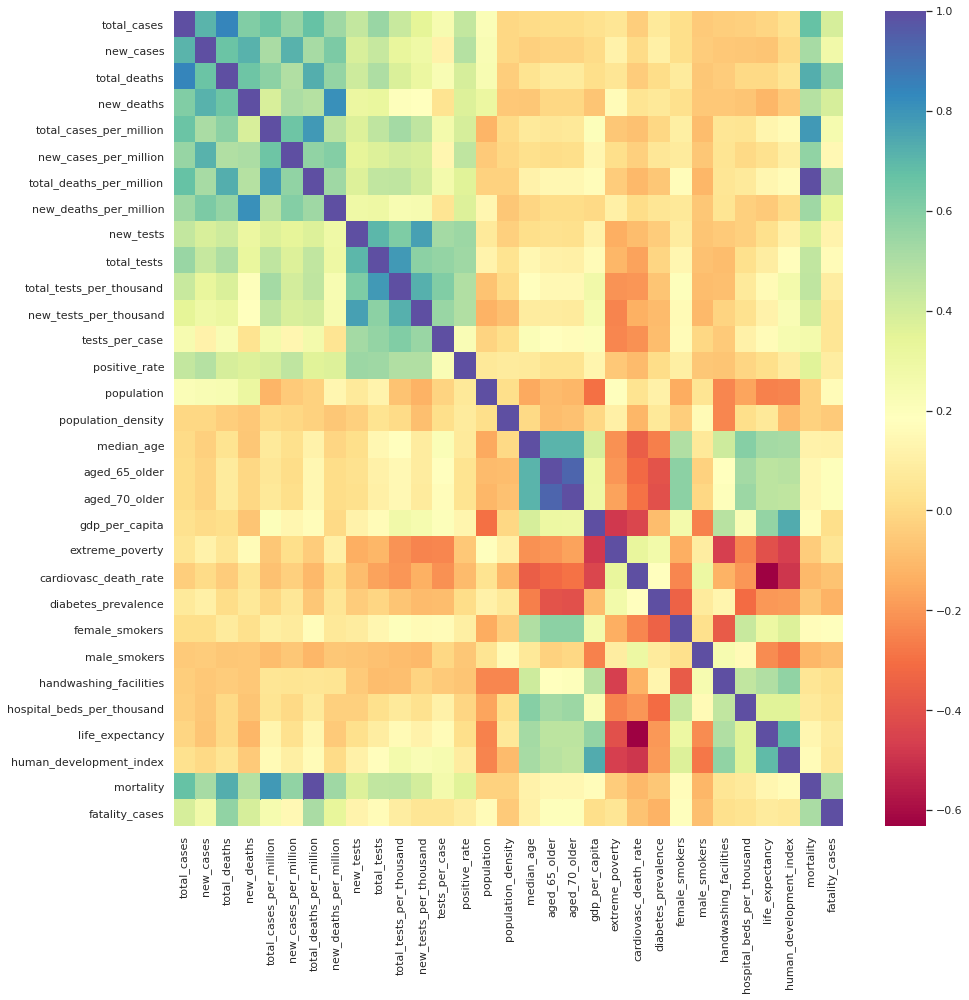

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(new.corr(method = 'kendall'), cmap = "Spectral")
plt.show()

### **Feature Importance with Random Forest and Premutation Importance**

In [ ]:
X = new[new['date'] == '2020-10-13'].copy()
X.reset_index(inplace = True, drop = True)
X.drop([64], inplace = True)
display(X)

iso_code      continent  ...     mortality fatality_cases
0       AFG           Asia  ...  3.801857e-05       0.037067
1       ARE           Asia  ...  4.509423e-05       0.004157
2       ARM           Asia  ...  3.482681e-04       0.017927
3       AUS        Oceania  ...  3.521585e-05       0.032911
4       AUT         Europe  ...  9.648694e-05       0.015356
..      ...            ...  ...           ...            ...
59      SMR         Europe  ...  1.237551e-03       0.055851
60      THA           Asia  ...  8.452725e-07       0.016195
61      TWN           Asia  ...  2.939105e-07       0.013208
62      USA  North America  ...  6.497984e-04       0.027560
63      VNM           Asia  ...  3.595696e-07       0.031532

[64 rows x 35 columns]

In [ ]:
y_cases = X['total_cases']
y_deaths = X['total_deaths']
y_new_cases = X['new_cases']
y_new_deaths = X['new_deaths']
X.drop(['handwashing_facilities'], axis = 1, inplace = True)

In [ ]:
X.isnull().sum()

iso_code                       0
continent                      0
location                       0
date                           0
total_cases                    0
new_cases                      0
total_deaths                   0
new_deaths                     0
total_cases_per_million        0
new_cases_per_million          0
total_deaths_per_million       0
new_deaths_per_million         0
new_tests                      0
total_tests                    0
total_tests_per_thousand       0
new_tests_per_thousand         0
tests_per_case                 0
positive_rate                  0
population                     0
population_density             1
median_age                     2
aged_65_older                  3
aged_70_older                  2
gdp_per_capita                 2
extreme_poverty               24
cardiovasc_death_rate          2
diabetes_prevalence            1
female_smokers                 6
male_smokers                   6
hospital_beds_per_thousand     2
life_expec

In [ ]:
X.replace(to_replace = 'NaN', value = np.nan, inplace = True)

In [ ]:
cols = X[['iso_code','continent','location','date']].copy()

#### Impute missing values with random forest imputer

In [ ]:
imputer = MissForest(max_iter = 10, n_estimators = 2000, random_state = 42, n_jobs = -1)
X_impute = X.drop(['iso_code','continent','location','date'], axis = 1).copy()
X_imputed = imputer.fit_transform(X_impute)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6


In [ ]:
X_imputed = pd.DataFrame(X_imputed, columns = X_impute.columns)

In [ ]:
X_new = pd.concat([cols, X_imputed], axis = 1, sort = False)

In [ ]:
X_new.isnull().sum()

iso_code                      0
continent                     0
location                      0
date                          0
total_cases                   0
new_cases                     0
total_deaths                  0
new_deaths                    0
total_cases_per_million       0
new_cases_per_million         0
total_deaths_per_million      0
new_deaths_per_million        0
new_tests                     0
total_tests                   0
total_tests_per_thousand      0
new_tests_per_thousand        0
tests_per_case                0
positive_rate                 0
population                    0
population_density            0
median_age                    0
aged_65_older                 0
aged_70_older                 0
gdp_per_capita                0
extreme_poverty               0
cardiovasc_death_rate         0
diabetes_prevalence           0
female_smokers                0
male_smokers                  0
hospital_beds_per_thousand    0
life_expectancy               0
human_de

In [ ]:
X_cases = X_new.drop(['location','mortality', 'fatality_cases', 'continent', 'iso_code', 'date', 'total_cases', 'total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 
            'total_tests_per_thousand', 'new_tests_per_thousand'], axis = 1)

X_deaths = X_new.drop(['location','mortality', 'fatality_cases', 'continent', 'iso_code', 'new_deaths', 'date', 'total_deaths', 'total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 
            'total_tests_per_thousand', 'new_tests_per_thousand'], axis = 1)

X_new_cases = X_new.drop(['location','mortality', 'fatality_cases', 'continent', 'iso_code', 'date', 'new_cases', 'total_deaths', 'total_cases', 'total_cases_per_million', 'new_cases_per_million', 
                          'total_deaths_per_million', 'new_deaths_per_million', 'total_tests_per_thousand', 'new_tests_per_thousand'], axis = 1)

X_new_deaths = X_new.drop(['location','mortality', 'fatality_cases', 'continent', 'iso_code', 'date', 'new_deaths', 'total_cases', 'total_deaths', 'total_cases_per_million', 'new_cases_per_million', 
                           'total_deaths_per_million', 'new_deaths_per_million', 'total_tests_per_thousand', 'new_tests_per_thousand'], axis = 1)

In [ ]:
display(X_cases.columns, X_deaths.columns, X_new_cases.columns, X_new_deaths.columns)

Index(['new_cases', 'total_deaths', 'new_deaths', 'new_tests', 'total_tests',
       'tests_per_case', 'positive_rate', 'population', 'population_density',
       'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence',
       'female_smokers', 'male_smokers', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

Index(['total_cases', 'new_cases', 'new_tests', 'total_tests',
       'tests_per_case', 'positive_rate', 'population', 'population_density',
       'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence',
       'female_smokers', 'male_smokers', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

Index(['new_deaths', 'new_tests', 'total_tests', 'tests_per_case',
       'positive_rate', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index'],
      dtype='object')

Index(['new_cases', 'new_tests', 'total_tests', 'tests_per_case',
       'positive_rate', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index'],
      dtype='object')

In [ ]:
rf_cases = RandomForestRegressor(n_estimators = 2000, random_state = 42, n_jobs = -1, criterion='mae')
rf_new_cases = RandomForestRegressor(n_estimators = 2000, random_state = 42, n_jobs = -1, criterion = 'mae')

rf_deaths = RandomForestRegressor(n_estimators = 2000, random_state = 42, n_jobs = -1, criterion = 'mae')
rf_new_deaths = RandomForestRegressor(n_estimators = 2000, random_state = 42, n_jobs = -1, criterion = 'mae')

rf_cases.fit(X_cases, y_cases)
rf_new_cases.fit(X_new_cases, y_new_cases)
rf_deaths.fit(X_deaths, y_deaths)
rf_new_deaths.fit(X_new_deaths, y_new_deaths)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

#### Total Cases

Random Forest Feature Importance for Total Cases

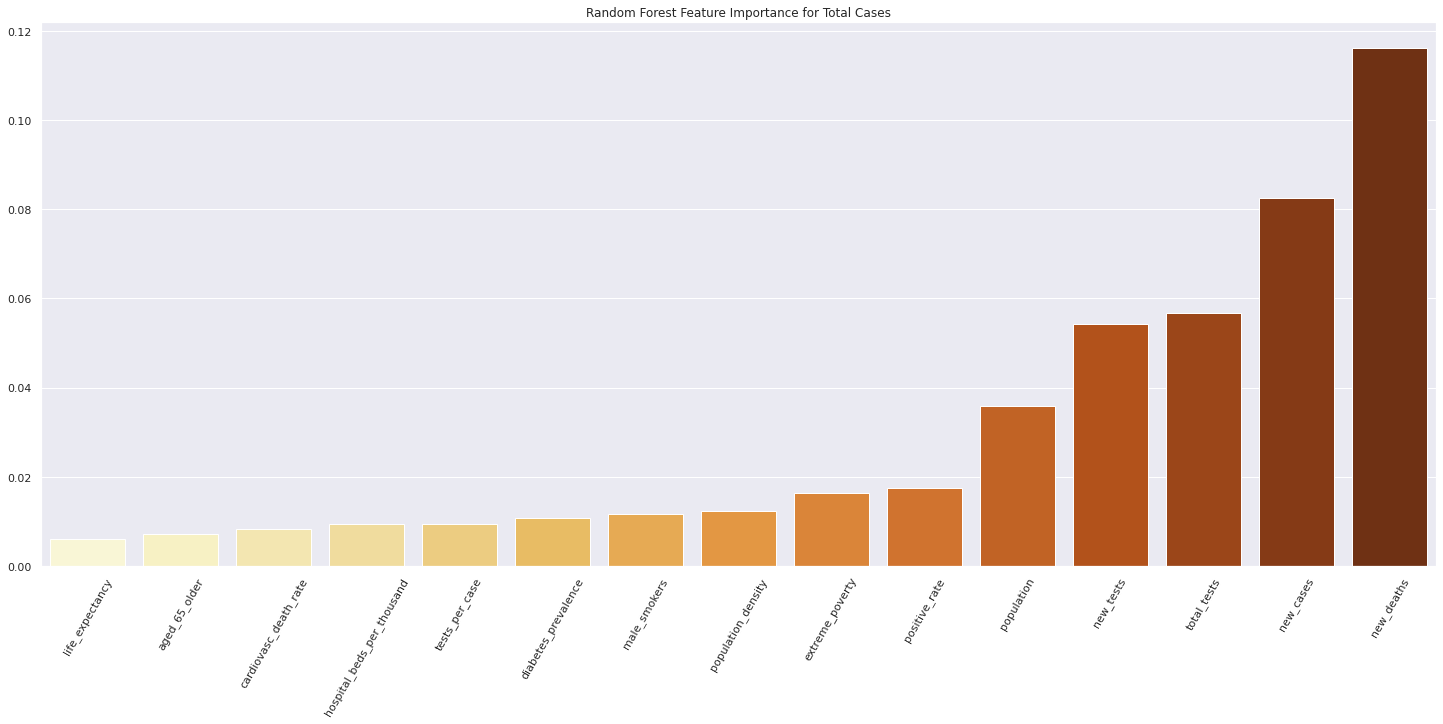

In [ ]:
sorted_idx = rf_cases.feature_importances_.argsort()
feats = rf_cases.feature_importances_[sorted_idx][-16:-1]

sns.barplot(x = X_cases.columns[sorted_idx][-16:-1], y = feats).set(title = 'Random Forest Feature Importance for Total Cases')
plt.xticks(rotation = 60)
plt.show()

XGBoost Regressor Feature Importance for Total Cases

In [ ]:
xgb = XGBRegressor(n_estimators=2500, objective='reg:squarederror', random_state=42)
xgb.fit(X_cases, y_cases)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=2500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

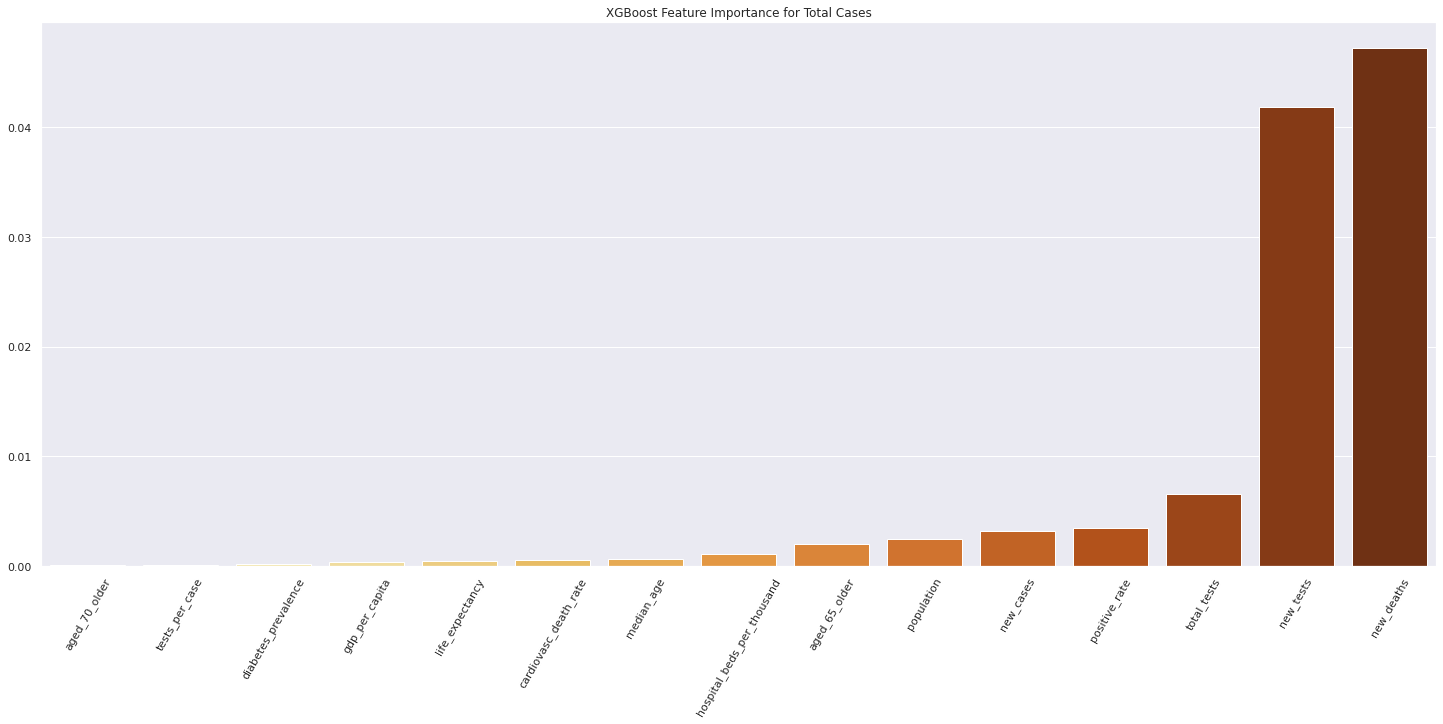

In [ ]:
xgb = XGBRegressor(n_estimators=2500, objective='reg:squarederror', random_state=42)
xgb.fit(X_cases, y_cases)
sorted_idx = xgb.feature_importances_.argsort()
feats = xgb.feature_importances_[sorted_idx][-16:-1]
sns.barplot(x = X_cases.columns[sorted_idx][-16:-1], y = feats).set(title = 'XGBoost Feature Importance for Total Cases')
plt.xticks(rotation = 60)
plt.show()

Permutation Importance for Total Cases

In [ ]:
perm_result = permutation_importance(rf_cases, X_cases, y_cases, n_repeats = 20, random_state = 42, n_jobs = -1)

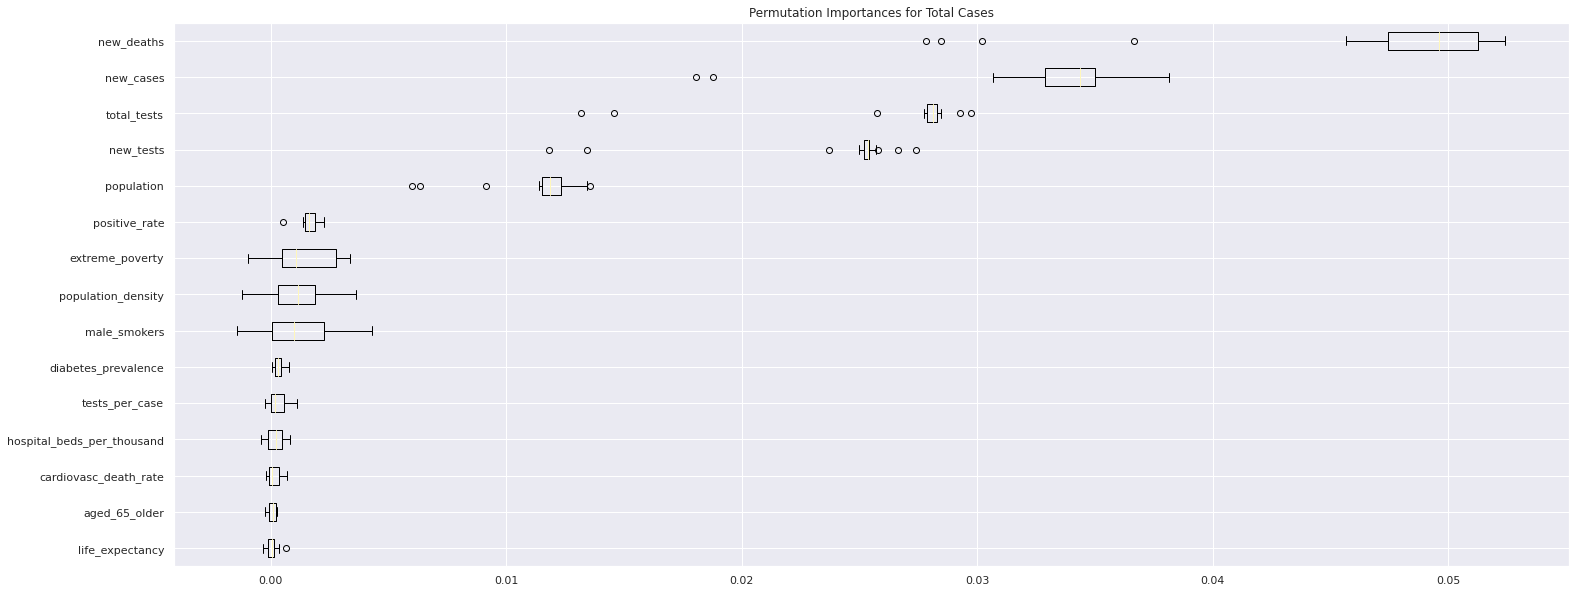

In [ ]:
perm_sorted_idx = perm_result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(perm_result.importances[perm_sorted_idx][-16:-1].T, vert=False, labels=X_cases.columns[sorted_idx][-16:-1])
ax.set_title("Permutation Importances for Total Cases")
plt.show()

### Observations:

The most important feature for total cases is new_deaths and unsurprisingly new_cases is the second most important feature for predicting total cases. Also, not surprising is that total_tests and new_tests are the third and fourth most important feautres since if many people are feeling like they need to be tested then there are probably a high number of cases.

### New Cases

Random Forest Feature Importance for New Cases

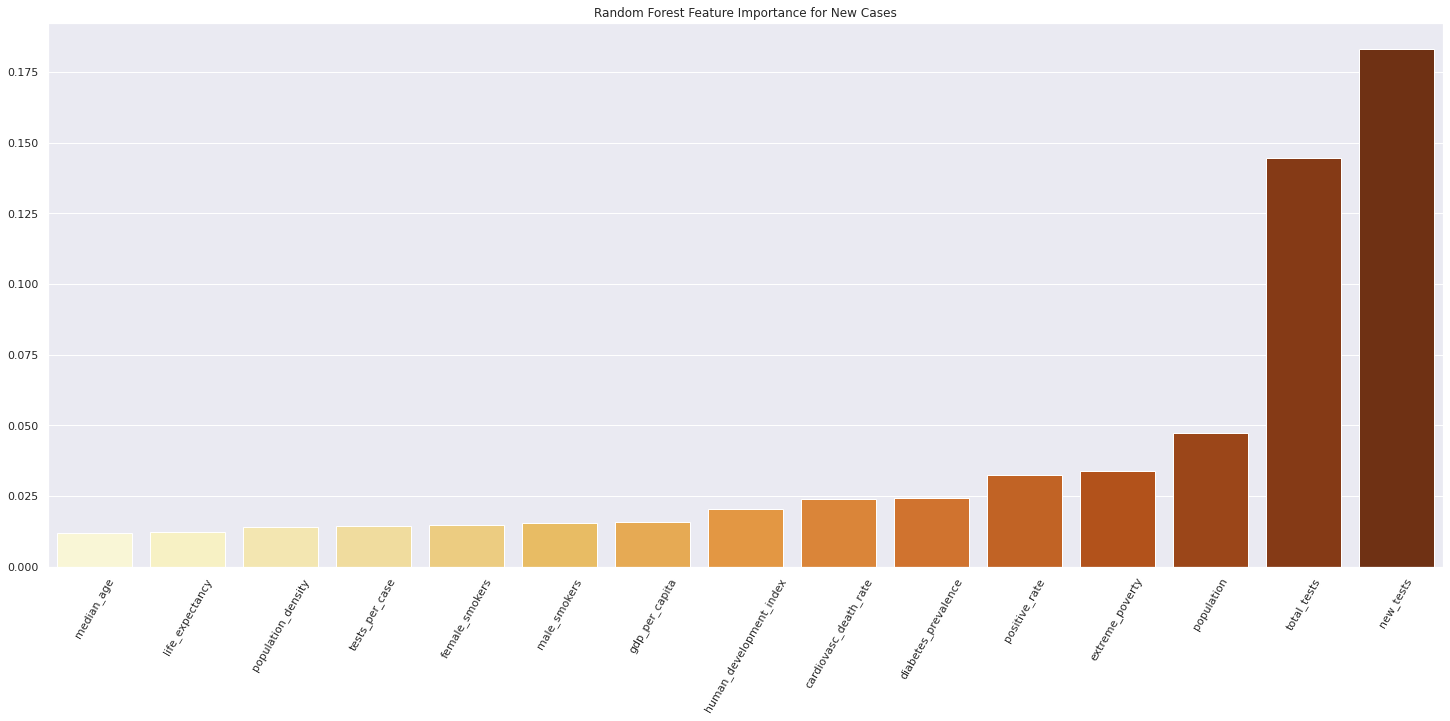

In [ ]:
sorted_idx = rf_new_cases.feature_importances_.argsort()
feats = rf_new_cases.feature_importances_[sorted_idx][-16:-1]

sns.barplot(x = X_new_cases.columns[sorted_idx][-16:-1], y = feats).set(title = 'Random Forest Feature Importance for New Cases')
plt.xticks(rotation = 60)
plt.show()

XGBoost Feature Importance for New Cases

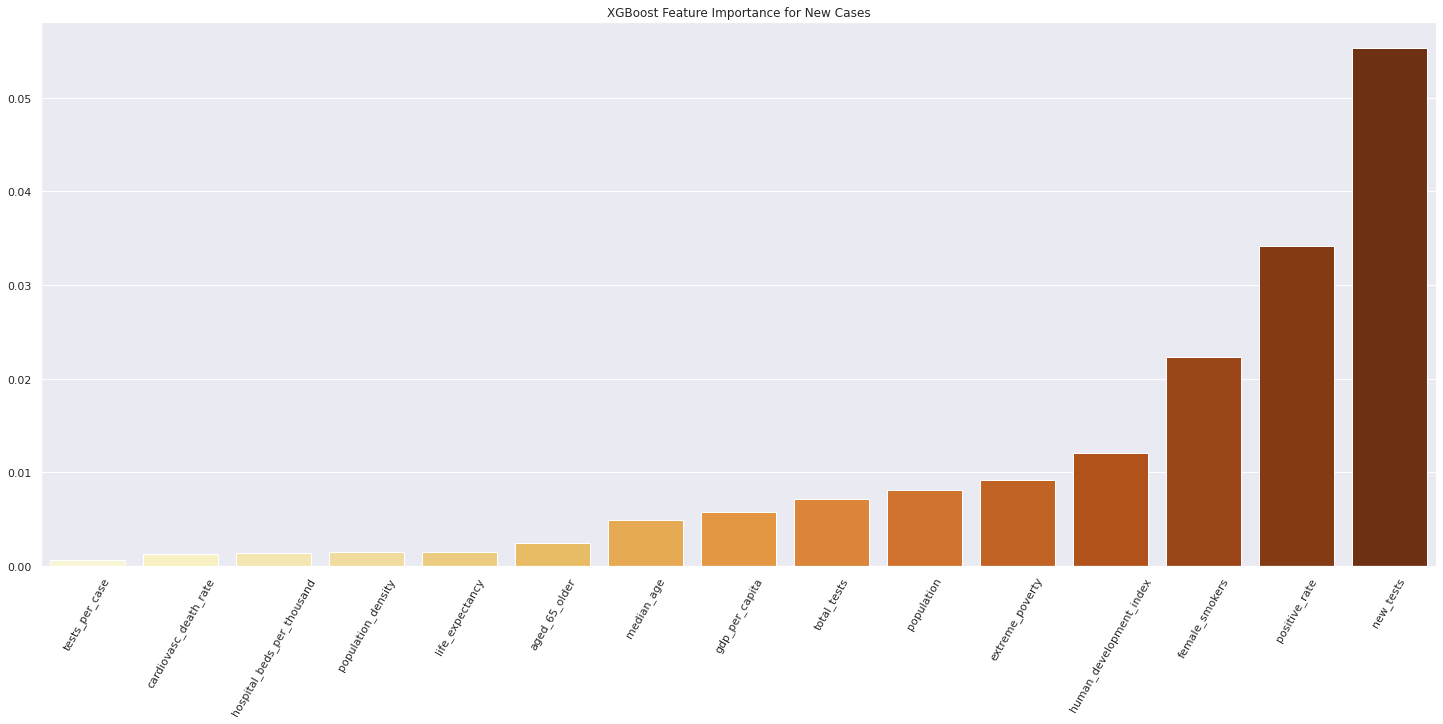

In [ ]:
xgb = XGBRegressor(n_estimators=2500, objective='reg:squarederror', random_state=42)
xgb.fit(X_new_cases, y_new_cases)

sorted_idx = xgb.feature_importances_.argsort()
feats = xgb.feature_importances_[sorted_idx][-16:-1]

sns.barplot(x = X_new_cases.columns[sorted_idx][-16:-1], y = feats).set(title = 'XGBoost Feature Importance for New Cases')
plt.xticks(rotation = 60)
plt.show()

Permutation Feature Importance for New Cases

In [ ]:
perm_result = permutation_importance(rf_new_cases, X_new_cases, y_new_cases, n_repeats = 20, random_state = 42, n_jobs = -1)

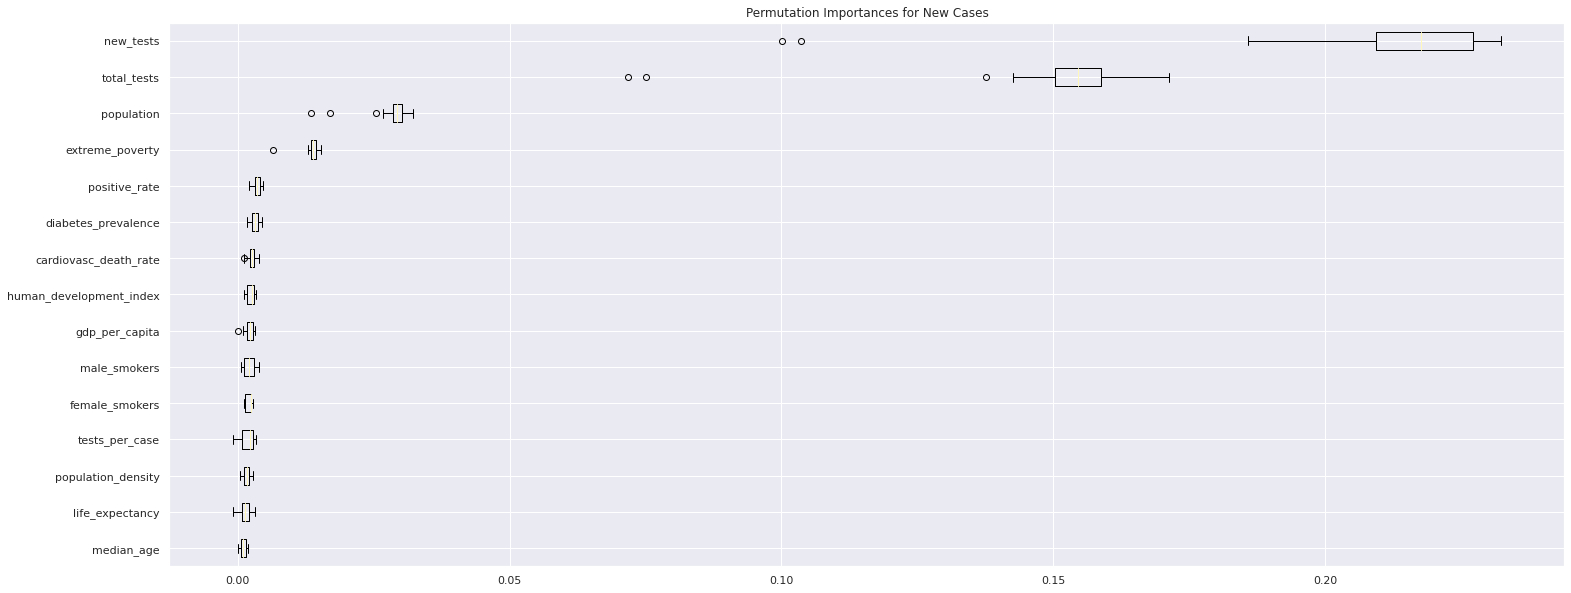

In [ ]:
perm_sorted_idx = perm_result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(perm_result.importances[perm_sorted_idx][-16:-1].T, vert=False, labels=X_new_cases.columns[sorted_idx][-16:-1])
ax.set_title("Permutation Importances for New Cases")
plt.show()

### Observations:

The overwhelmingly top two most important features for new cases are new_tests and total_tests. The third which is not surprising is population. Extreme_povery is the fourth most important feature for new cases.


#### Total Deaths

Random Forest Feature Importance for Total Deaths

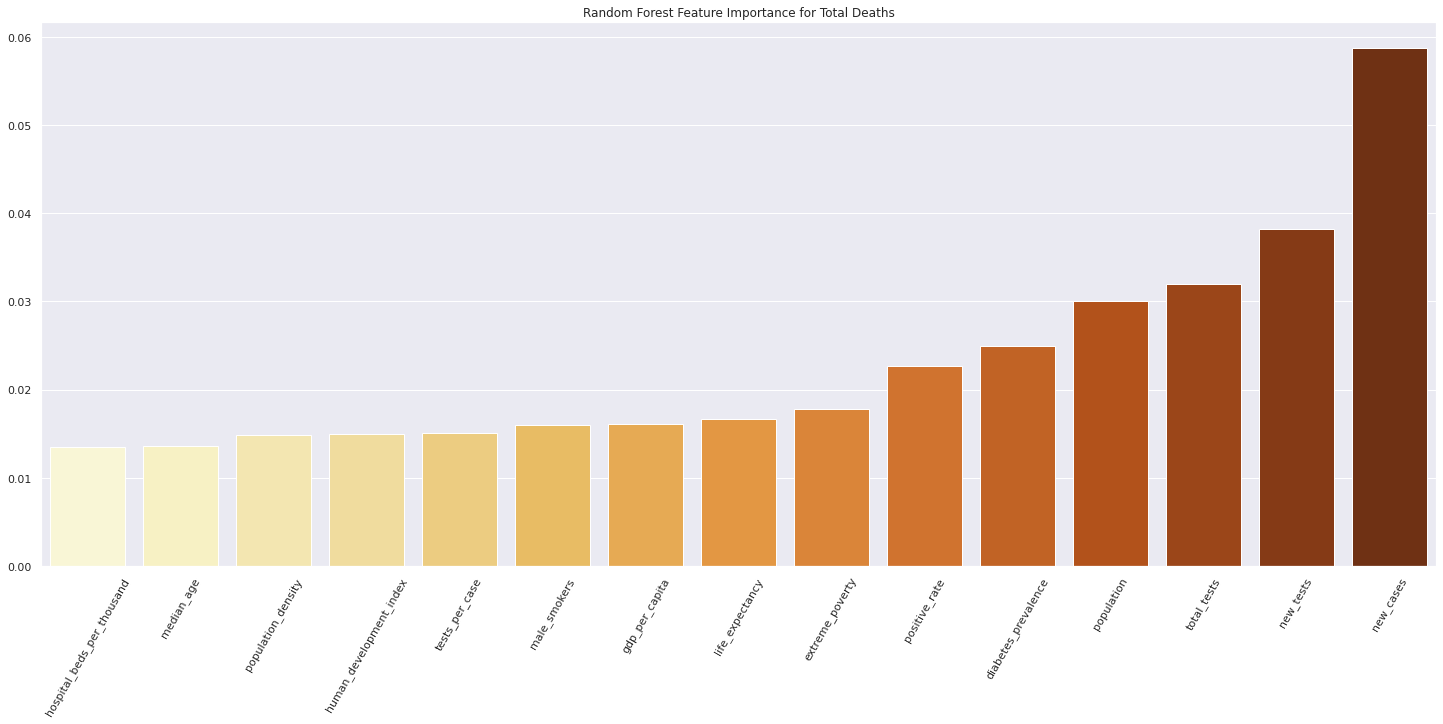

In [ ]:
sorted_idx = rf_deaths.feature_importances_.argsort()
feats = rf_deaths.feature_importances_[sorted_idx][-16:-1]

sns.barplot(x = X_deaths.columns[sorted_idx][-16:-1], y = feats).set(title = 'Random Forest Feature Importance for Total Deaths')
plt.xticks(rotation = 60)
plt.show()

XGBoost Feature Importance for Total Deaths

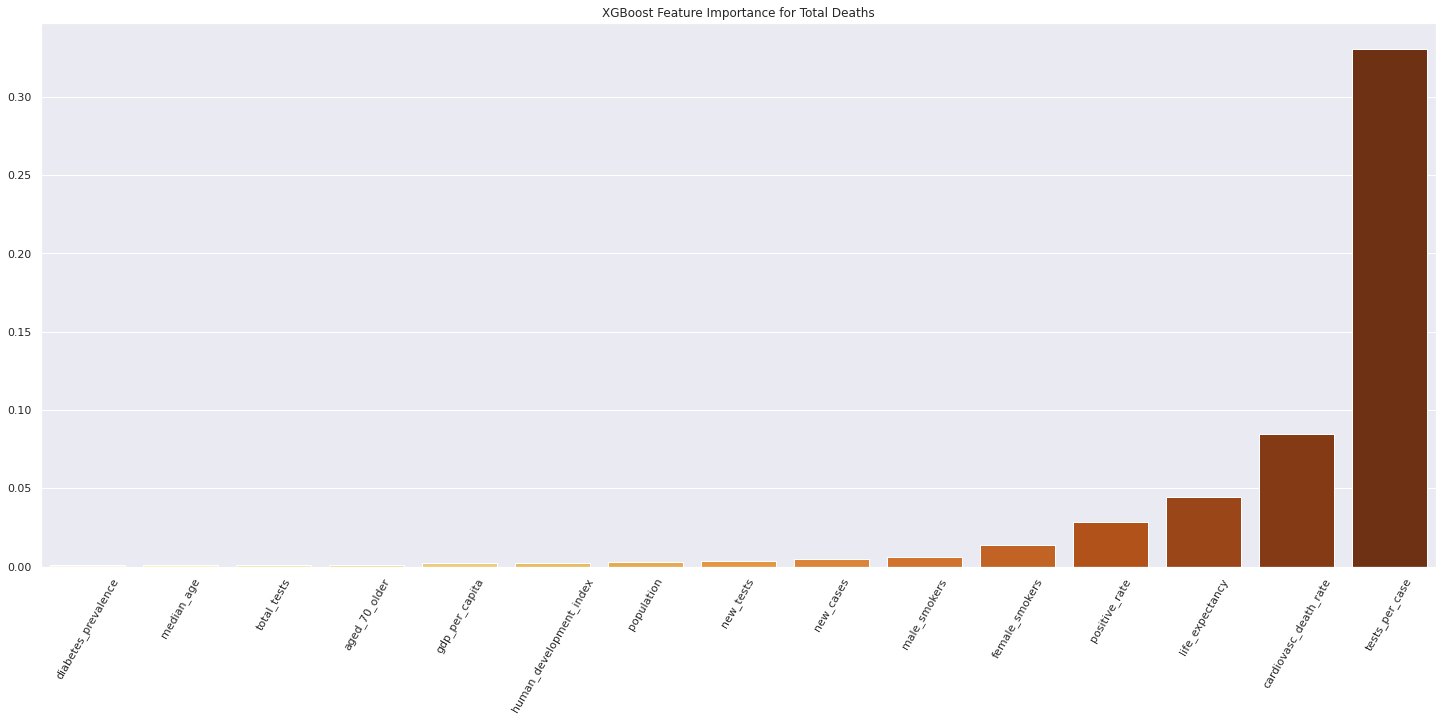

In [ ]:
xgb = XGBRegressor(n_estimators=2500, objective='reg:squarederror', random_state=42)
xgb.fit(X_deaths, y_deaths)

sorted_idx = xgb.feature_importances_.argsort()
feats = xgb.feature_importances_[sorted_idx][-16:-1]

sns.barplot(x = X_deaths.columns[sorted_idx][-16:-1], y = feats).set(title = 'XGBoost Feature Importance for Total Deaths')
plt.xticks(rotation = 60)
plt.show()

Permutation Feature Importance for Total Deaths

In [ ]:
perm_result = permutation_importance(rf_deaths, X_deaths, y_deaths, n_repeats = 20, random_state = 42, n_jobs = -1)

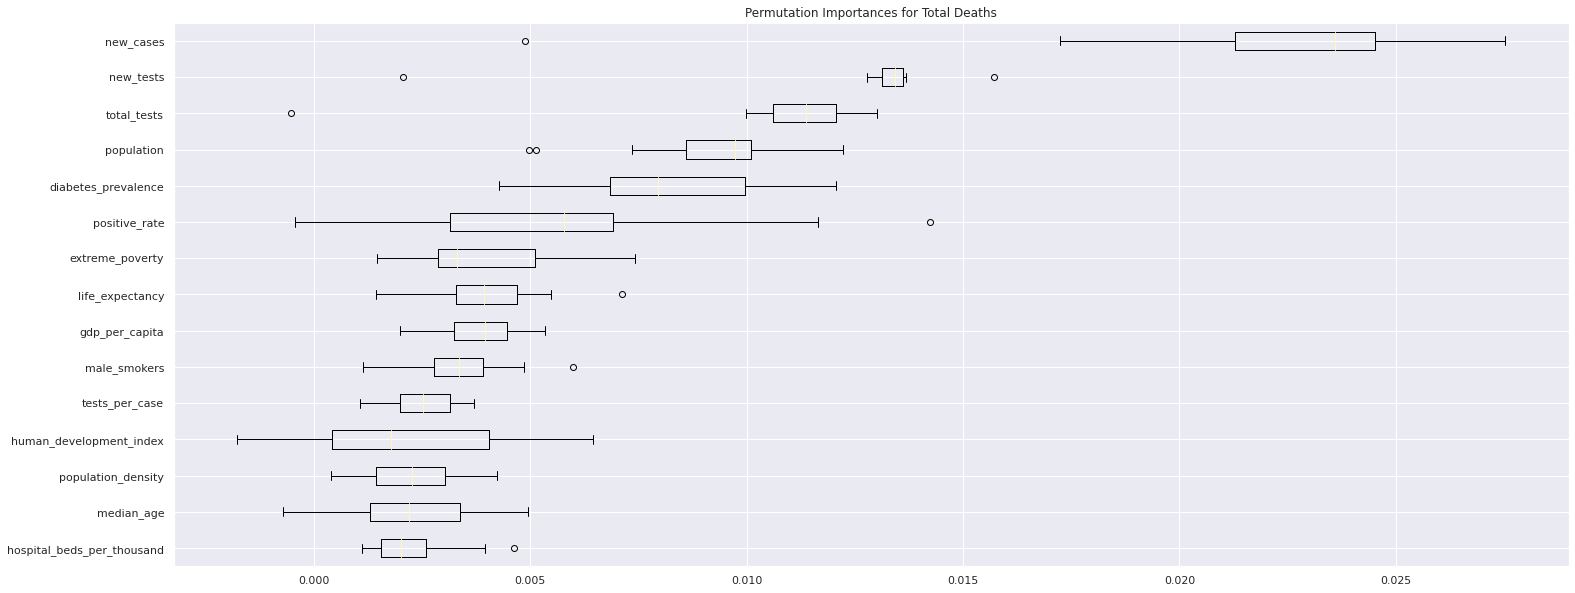

In [ ]:
perm_sorted_idx = perm_result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(perm_result.importances[perm_sorted_idx][-16:-1].T, vert=False, labels=X_deaths.columns[sorted_idx][-16:-1])
ax.set_title("Permutation Importances for Total Deaths")
plt.show()

### Observations:

It's interesting to see the wide variance in the permutation test for total deaths. After cases and tests features it shows that the population, diabetes_prevalance, and positive rate are all some of the most important features. Diabetes_prevelance seems like it is a large factor wether someone will survive the virus.

### New Deaths

Random Forest Feature Importance for New Deaths

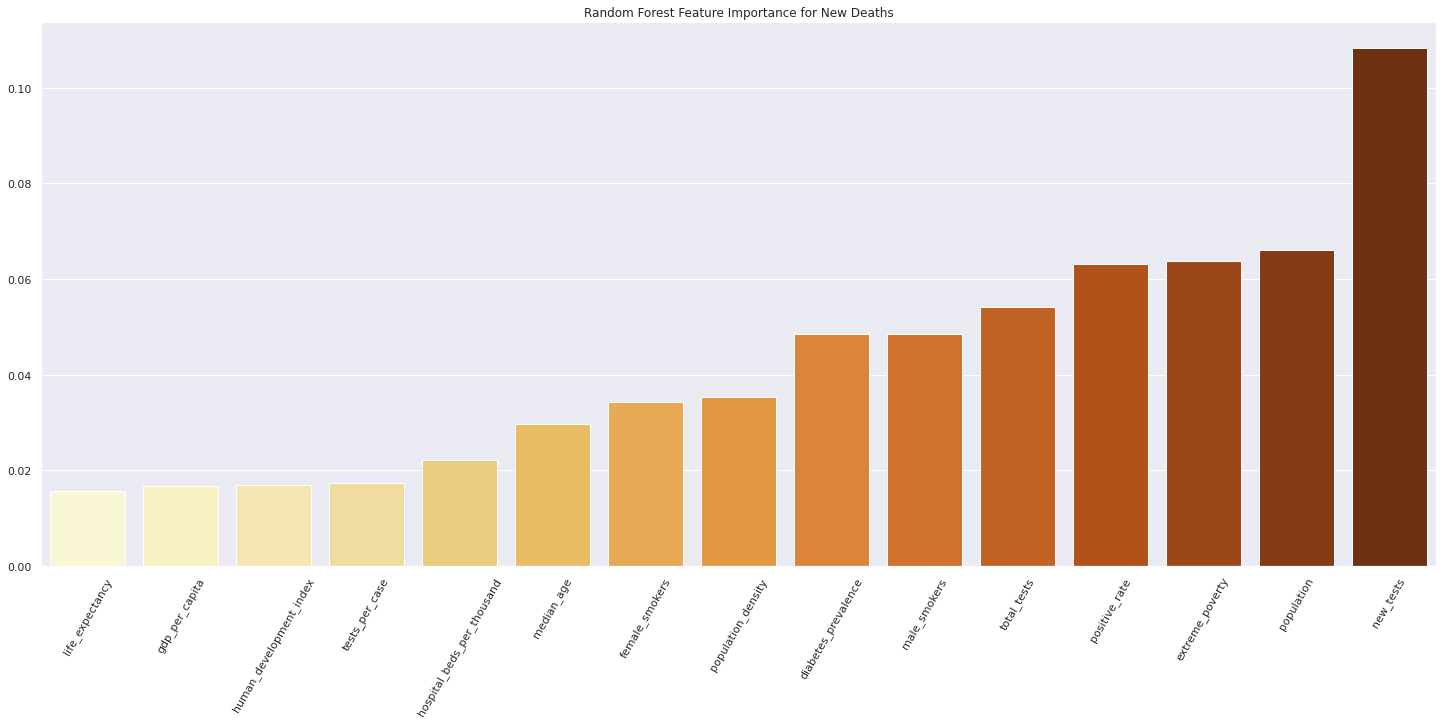

In [ ]:
sorted_idx = rf_new_deaths.feature_importances_.argsort()
feats = rf_new_deaths.feature_importances_[sorted_idx][-16:-1]

sns.barplot(x = X_new_deaths.columns[sorted_idx][-16:-1], y = feats).set(title = 'Random Forest Feature Importance for New Deaths')
plt.xticks(rotation = 60)
plt.show()

XGBoost Feature Importance for New Deaths

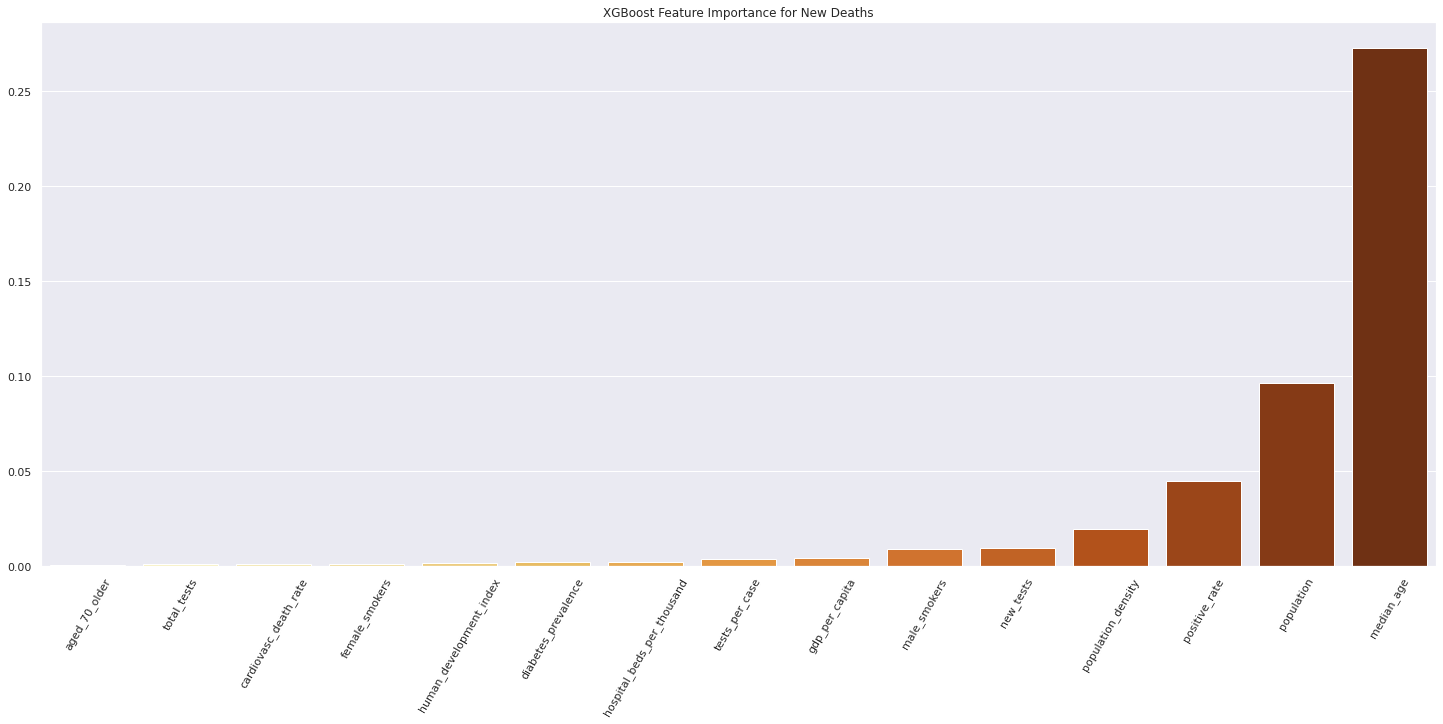

In [ ]:
xgb = XGBRegressor(n_estimators=2500, objective='reg:squarederror', random_state=42)
xgb.fit(X_new_deaths, y_new_deaths)

sorted_idx = xgb.feature_importances_.argsort()
feats = xgb.feature_importances_[sorted_idx][-16:-1]

sns.barplot(x = X_new_deaths.columns[sorted_idx][-16:-1], y = feats).set(title = 'XGBoost Feature Importance for New Deaths')
plt.xticks(rotation = 60)
plt.show()

Permutation Feature Importance for New Deaths

In [ ]:
perm_result = permutation_importance(rf_new_deaths, X_new_deaths, y_new_deaths, n_repeats = 20, random_state = 42, n_jobs = -1)

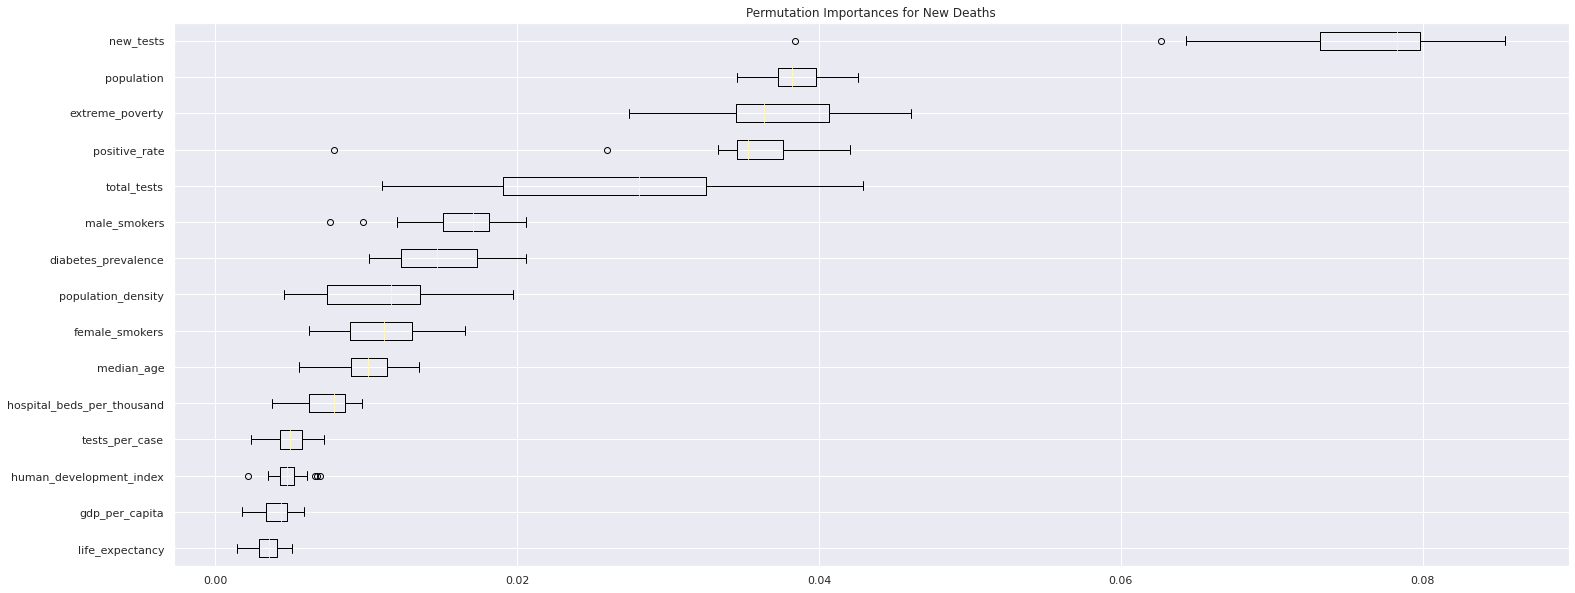

In [ ]:
perm_sorted_idx = perm_result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(perm_result.importances[perm_sorted_idx][-16:-1].T, vert=False, labels=X_new_deaths.columns[sorted_idx][-16:-1])
ax.set_title("Permutation Importances for New Deaths")
plt.show()

### Observations:

Extreme_poverty is the third most important feature for new deaths. Unfortunately this is not surprising since people would not get access to treatment if they can not afford it. Both male and female smokers and diabetes prevalence are all important features for new deaths.

## **Overall Findings**

- The United States, Brazil, India has the most deaths per day
<ul>
    <li>US: 700 deaths per day</li>
    <li>Brazil: 500 deaths per day</li>
    <li>India: 360 deaths per day</li>
</ul>
- The United States and Brazilhas mortality rates that increase the most rapidly
- North and South America has the highest increase in covid cases and deaths
- Oceania has the least covid cases and deaths specifically in New Zealand
- Males have a higher risk of death than females (10 males: 7 females)
- Those that are above 65 years old have the highest risk of death
- France, Italy, and Belgium have the highest case fatality rate


## **Appendix**

**Analyze Basic Metric of Variables**
<li>Import libraries</li>
<li>Import covid 19 dataset</li>
<li>Import US age/sex dataset</li>

**Non-graphical and Graphical Univariate Analysis**
<li>World Data</li>
<li>US Data</li>

**Missing Value Analysis and Outlier Analysis**
<li>Ambiguous Variables</li>
<li>Missing Dates</li>
<li>Missing Values</li>
<li>US Dataset</li>

**Exploratory Data Analysis**
<li>Continent Analysis</li>
<li>Mortality Rates</li>
<li>Case Fatality Rates</li>
<li>Age Analysis</li>
<li>Gender Analysis</li>

**Feature Engineering and Analysis**
<li>Spearman Correlation</li>
<li>Kendall Correlation</li>
<li>Feature Analysis with Random Forest</li>
<li>Feature Analysis with XGBoost</li>
<li>Permutation Analysis</li>

**Link for tableau Visualizations for Covid 19** <br>
https://public.tableau.com/profile/avani.jain5127#!/vizhome/Covid_19_1_16041732053770/Sheet5?publish=yes

**Link for tableau Visualizations for Covid 19 according to Gender**
https://public.tableau.com/profile/avani.jain5127#!/vizhome/Covid_19_gender/Sheet1



## **Table of Contributions**


**Analysis the basic metrics of variables**	(Avani)	
**Non-graphical and graphical univariate analysis** (Avani)		
**Missing Value Analysis and Outlier Analysis** 
<ul>
<li> Owid Covid Dataset (Toby) </li>
<li> US_Data (Michael)</li>
<li> Dataset_gender (Avani) </li>          
</ul> <br>

**Exploratory Data Analysis**
<ul>
<li>Continent Analysis and Mortality Rate Barplot and Lineplot (Toby)</li>
<li>Boxplots (Michael)</li>  
<li>Case Fatality Analysis with Barplot and Lineplot (Michael)</li>  
<li>Age Analysis (Toby)</li>
<li>Gender Analysis (Toby)</li>       
</ul>

**Feature engineering and analysis** (Michael)            <br>
**Tableau Visualizations** (Avani)		<br>
**Interactive Graph in Python** (Avani) <br>
**Appendix** (Toby)		